In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

datos_graficar = ['PTS', 'FGA', 'FGM', 'MIN','FP','TOV', 'RANK', 'AGE', '3P%']



años = [2024,2023,2022,2021,2020,2019,2018,2017,2016]

def filtrar_datos(df_data,año_contrato,año_estadisticas):   #retorna df_correlacion
    df_nuevo = df_data.copy()
    df_correlacion = df_nuevo.loc[:,'Contrato {}'.format(año_contrato)]
    df_año_estadisticas = df_nuevo.filter(like= str(año_estadisticas))
    df_año_estadisticas.drop(columns = 'Contrato {}'.format(año_estadisticas), inplace = True)
    df_año_estadisticas.drop(columns = 'Equipo {}'.format(año_estadisticas), inplace = True)
    df_correlacion = pd.concat([df_correlacion, df_año_estadisticas],axis = 1)
    return df_correlacion

def graficar_todos_dispersion(dato_interes, df):
  contrato = df.filter(like= 'Contrato').drop(columns='Contrato 2016')
  contrato = contrato.stack(dropna=False).reset_index(drop=True)

  estadistica = df.filter(like= dato_interes).drop(columns='{} 2024'.format(dato_interes))
  estadistica = estadistica.stack(dropna=False).reset_index(drop=True)

  # Gráfico de dispersión entre estadísticas y contrato
  plt.scatter(estadistica, contrato, s = 20, c = 'red')
  plt.title('{} vs. contrato'.format(dato_interes))
  plt.xlabel("{}".format(dato_interes))
  plt.ylabel("Valor contrato")

  # Agregar una cuadrícula
  plt.grid(True)

  # Mostrar la gráfica
  plt.show()

def seleccionar_todos_dispersion(dato_interes, df):   #retorna estadistica y contrato
  contrato = df.filter(like= 'Contrato').drop(columns='Contrato 2016')
  contrato = contrato.stack(dropna=False).reset_index(drop=True)

  estadistica = df.filter(like= dato_interes).drop(columns='{} 2024'.format(dato_interes))

  estadistica = estadistica.stack(dropna=False).reset_index(drop=True)

  return estadistica, contrato

def graficar_individual_linea(datos_interes, df, player):
  fig, axes = plt.subplots(3, 3, figsize=(12, 8))
  df_player = df.loc[df['Nombre'] == player]
  y = df_player.filter(like= 'Contrato').drop(columns = 'Contrato 2016').stack().reset_index(drop=True)
  for i in range(len(datos_interes)):
    #x, y = seleccionar_todos_dispersion(datos_graficar[i], df_contratos_diferentes)
    x = df_player.filter(like= datos_interes[i]).drop(columns = '{} 2024'.format(datos_interes[i])).stack().reset_index(drop=True)
    print(x)
    print(y)
    if i < 3:
      axes[0,i].plot(x, y)
      axes[0,i].set_title('{} vs. contrato'.format(datos_graficar[i]))
    elif i >= 3 and i < 6:
      axes[1,i - 3].plot(x, y)
      axes[1,i - 3].set_title('{} vs. contrato'.format(datos_graficar[i]))
    else:
      axes[2,i - 6].plot(x, y)
      axes[2,i - 6].set_title('{} vs. contrato'.format(datos_graficar[i]))
  plt.tight_layout()
  plt.show()

def graficar_individual_scatter(datos_interes, df, player):
  fig, axes = plt.subplots(3, 3, figsize=(12, 8))
  df_player = df.loc[df['Nombre'] == player]
  y = df_player.filter(like= 'Contrato').drop(columns = 'Contrato 2016').stack().reset_index(drop=True)
  for i in range(len(datos_interes)):
    #x, y = seleccionar_todos_dispersion(datos_graficar[i], df_contratos_diferentes)
    x = df_player.filter(like= datos_interes[i]).drop(columns = '{} 2024'.format(datos_interes[i])).stack().reset_index(drop=True)
    print(x)
    print(y)
    if i < 3:
      axes[0,i].scatter(x, y)
      axes[0,i].set_title('{} vs. contrato'.format(datos_graficar[i]))
    elif i >= 3 and i < 6:
      axes[1,i - 3].scatter(x, y)
      axes[1,i - 3].set_title('{} vs. contrato'.format(datos_graficar[i]))
    else:
      axes[2,i - 6].scatter(x, y)
      axes[2,i - 6].set_title('{} vs. contrato'.format(datos_graficar[i]))
  # Especificar la ruta donde quieres guardar la gráfica 
  ruta_guardado = f"C:/Users/gabog/OneDrive/Documentos/Curso de samsumg/ProyectoPowerRangers/Analisis_Datos/GraficasIndividuales/{player.replace(' ', '_')}.png" 
  plt.savefig(ruta_guardado) # Guardar la gráfica en la ruta especificada
  plt.tight_layout()
  plt.show()



ruta_de_acceso = r"C:\Users\gabog\OneDrive\Documentos\Curso de samsumg\ProyectoPowerRangers\Datos\datos_todas_las_jugadoras_posibles.csv"
df = pd.read_csv(ruta_de_acceso) #Archivo 'datos_todas_las_jugadoras_posibles.csv'
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace('\t', ' ')


Se observa como ha variado el promedio de PTS a traves de los años

<Axes: >

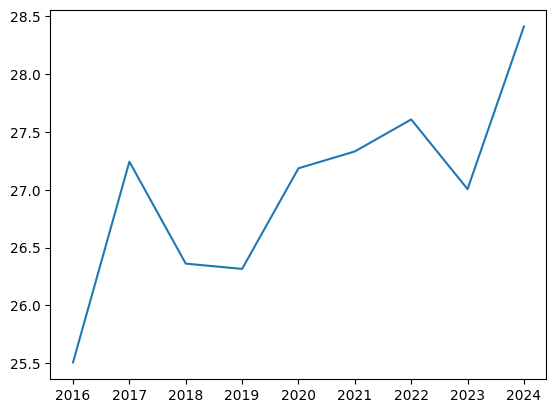

In [5]:
df_3PP = df.filter(like = '3P%')
df_3PP_per_year = df_3PP.describe().loc['mean']
df_3PP_per_year.index = pd.RangeIndex(start=2024, stop=2015, step=-1)
df_3PP_per_year.plot(kind = 'line')

Se observa la jugadora Sue Bird

In [26]:
x = df.loc[df['Nombre'] == 'EMMA CANNON']

# Filtrar las columnas
columnas_filtradas = ['Nombre', 'Contrato 2024', 'Contrato 2023', 'Contrato 2022', 'Contrato 2021', 'Contrato 2020','Contrato 2019','Contrato 2018','Contrato 2017','Contrato 2016', 'PTS 2023', 'PTS 2022', 'PTS 2021', 'PTS 2020','PTS 2019','PTS 2018','PTS 2017','PTS 2016']
df_filtrado2 = x[columnas_filtradas]
print(df_filtrado2)

          Nombre  Contrato 2024  Contrato 2023  Contrato 2022  Contrato 2021  \
163  EMMA CANNON            NaN        80000.0       162400.0         9270.0   

     Contrato 2020  Contrato 2019  Contrato 2018  Contrato 2017  \
163         4560.0            NaN            NaN            NaN   

     Contrato 2016  PTS 2023  PTS 2022  PTS 2021  PTS 2020  PTS 2019  \
163            NaN       5.8       6.8       5.5       0.0       NaN   

     PTS 2018  PTS 2017  PTS 2016  
163       NaN       4.4       NaN  


In [47]:
df_jugadora_a_graficar = df.loc[df['Nombre'] == 'NATASHA HOWARD']
df_jugadora_contratos = df_jugadora_a_graficar.filter(like= 'Contrato').drop(columns = 'Contrato 2016').stack().reset_index(drop=True)
df_jugadora_pts = df_jugadora_a_graficar.filter(like= 'PTS').drop(columns = 'PTS 2024').stack().reset_index(drop=True)
print(df_jugadora_contratos,df_jugadora_pts,df_jugadora_a_graficar)

0    898700.0
1    898700.0
2    898700.0
3    898700.0
4    345000.0
5    345000.0
6    345000.0
dtype: float64 0    16.5
1    15.1
2    16.2
3     9.5
4    18.1
5    13.2
6     4.3
7     6.7
dtype: float64            Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0  NATASHA HOWARD       898700.0         DAL       898700.0         DAL   

   Contrato 2022 Equipo 2022  Contrato 2021 Equipo 2021  Contrato 2020  ...  \
0       898700.0          NY       898700.0          NY       345000.0  ...   

  REB 2016  AST 2016 TOV 2016  STL 2016 BLK 2016  PF 2016 FP 2016  DD2 2016  \
0      3.6       0.8      1.1       0.7      0.8      2.9    14.1       0.0   

  TD3 2016  +/- 2016  
0      0.0       3.7  

[1 rows x 271 columns]


jugadora: NATASHA HOWARD
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN      

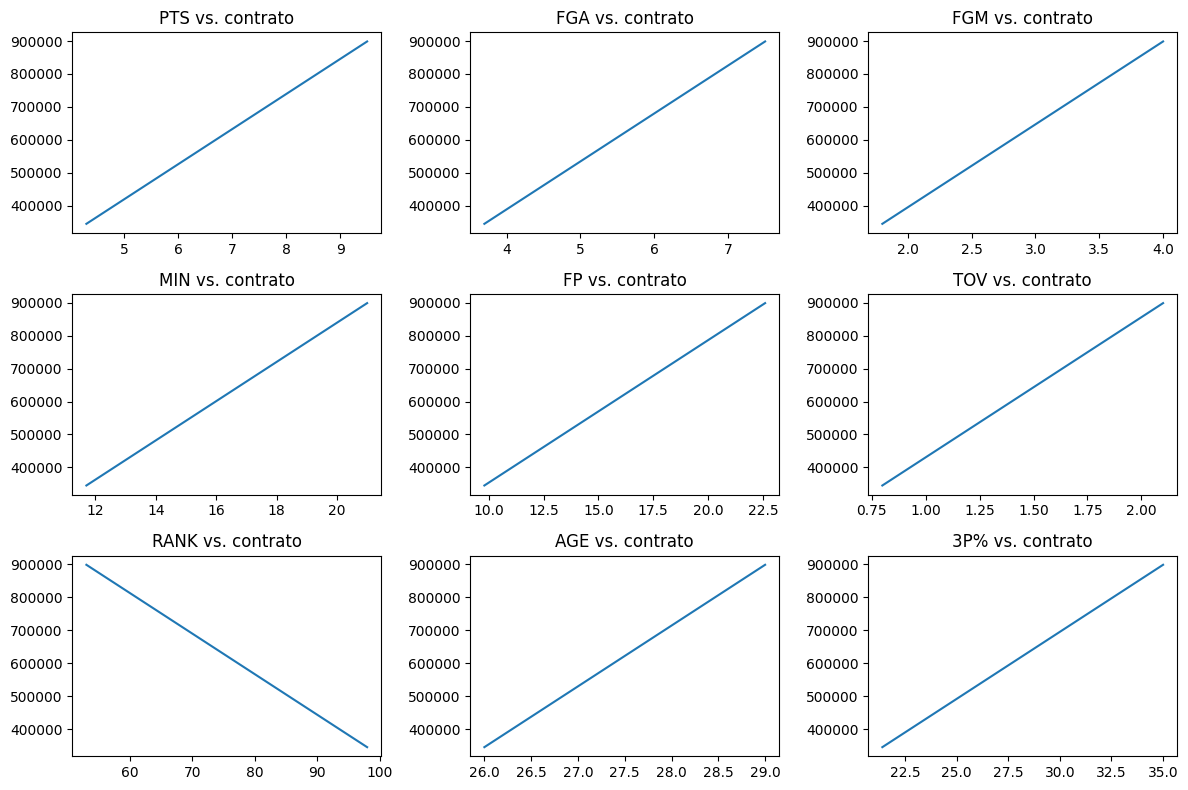

jugadora: ALYSSA THOMAS
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN       

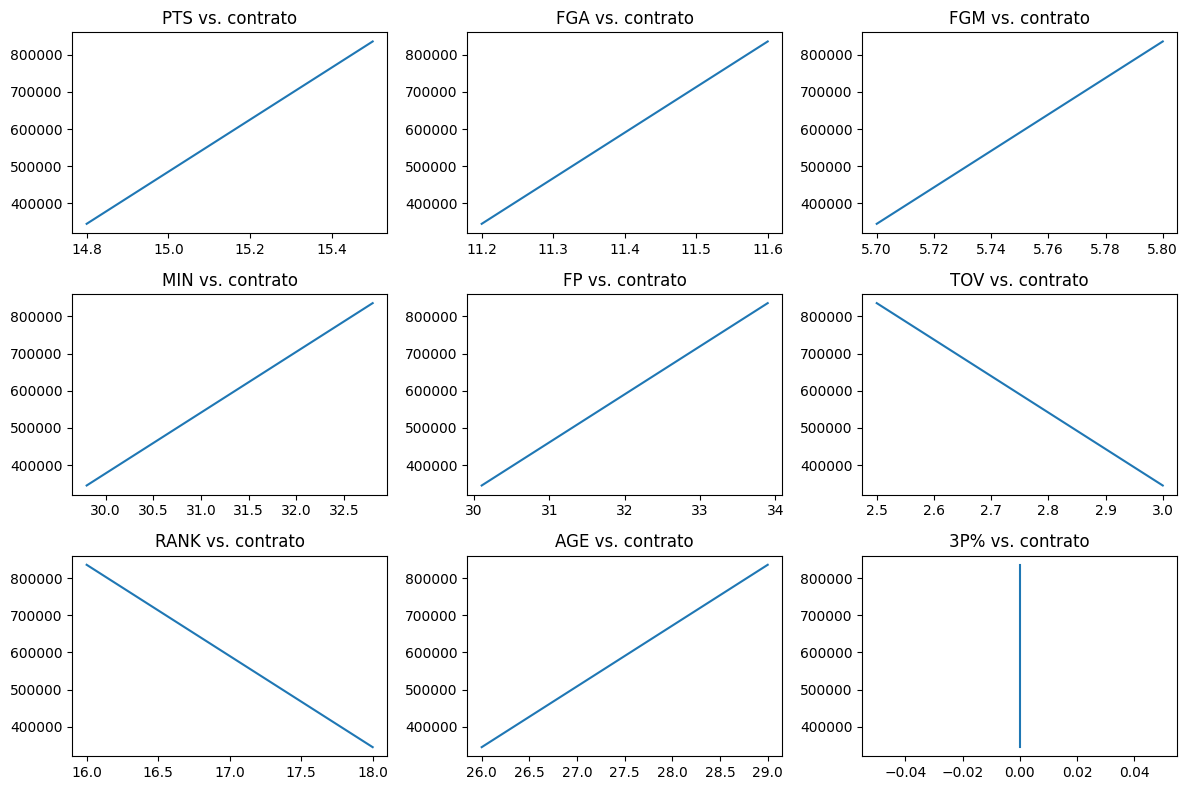

jugadora: ARIKE OGUNBOWALE
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN    

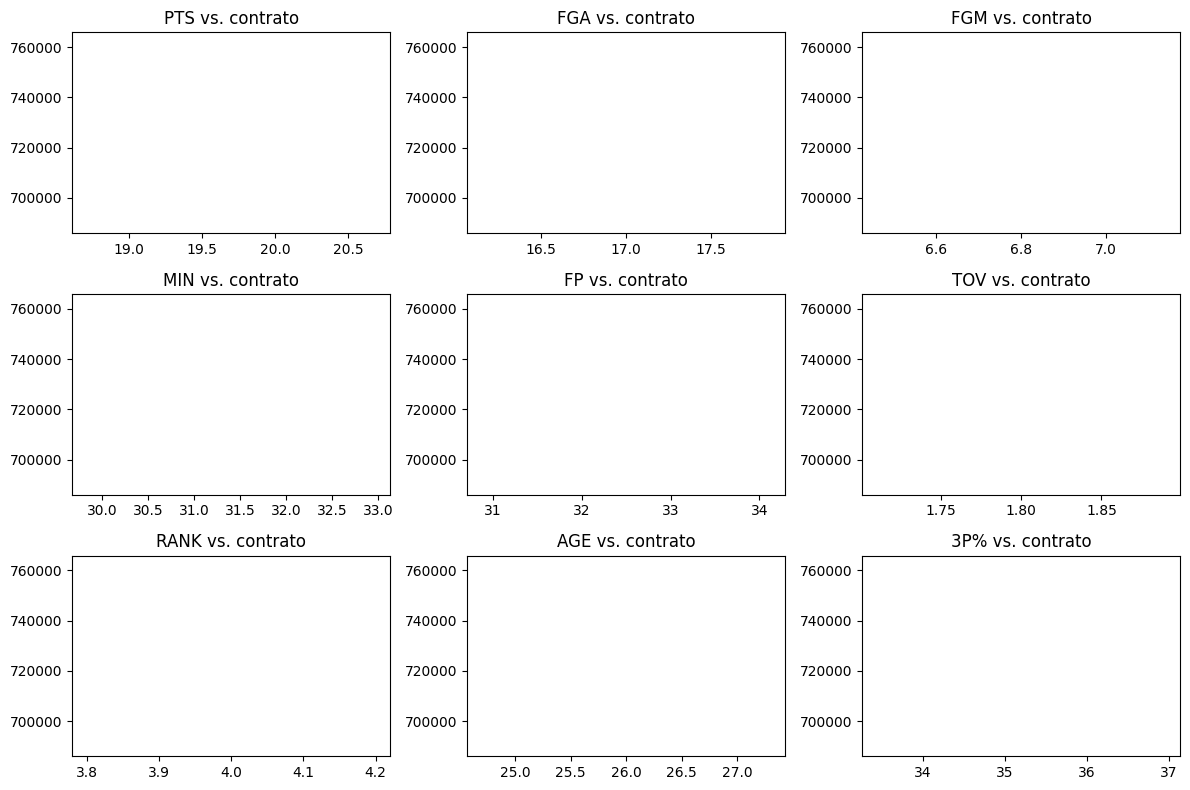

jugadora: MARINA MABREY
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN       

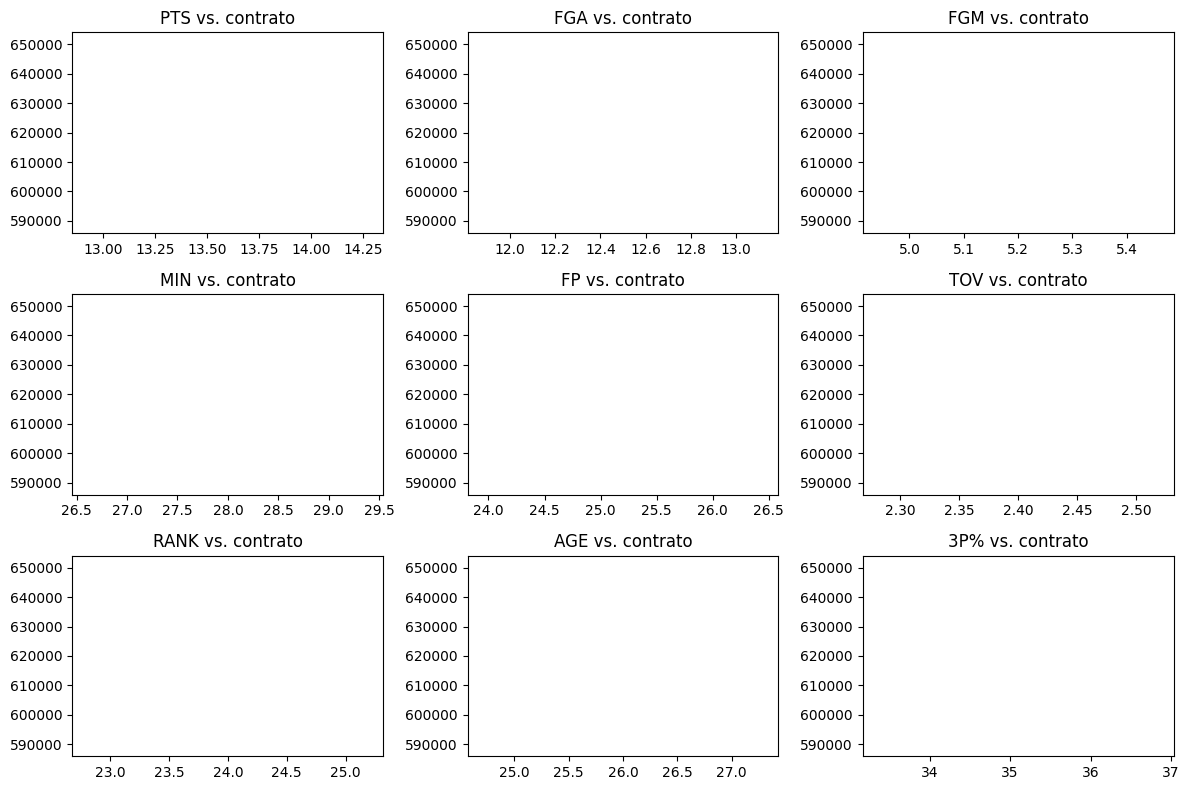

jugadora: KELSEY MITCHELL
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN     

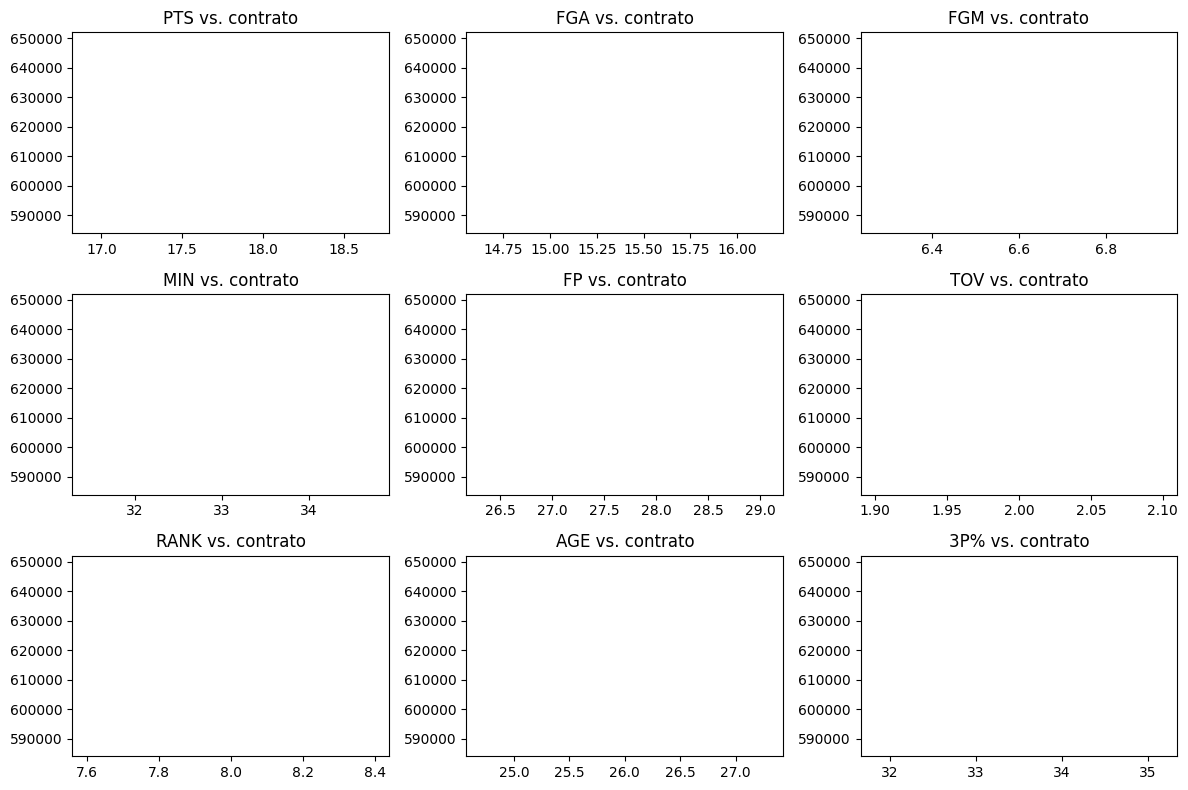

jugadora: TEAIRA MCCOWAN
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN      

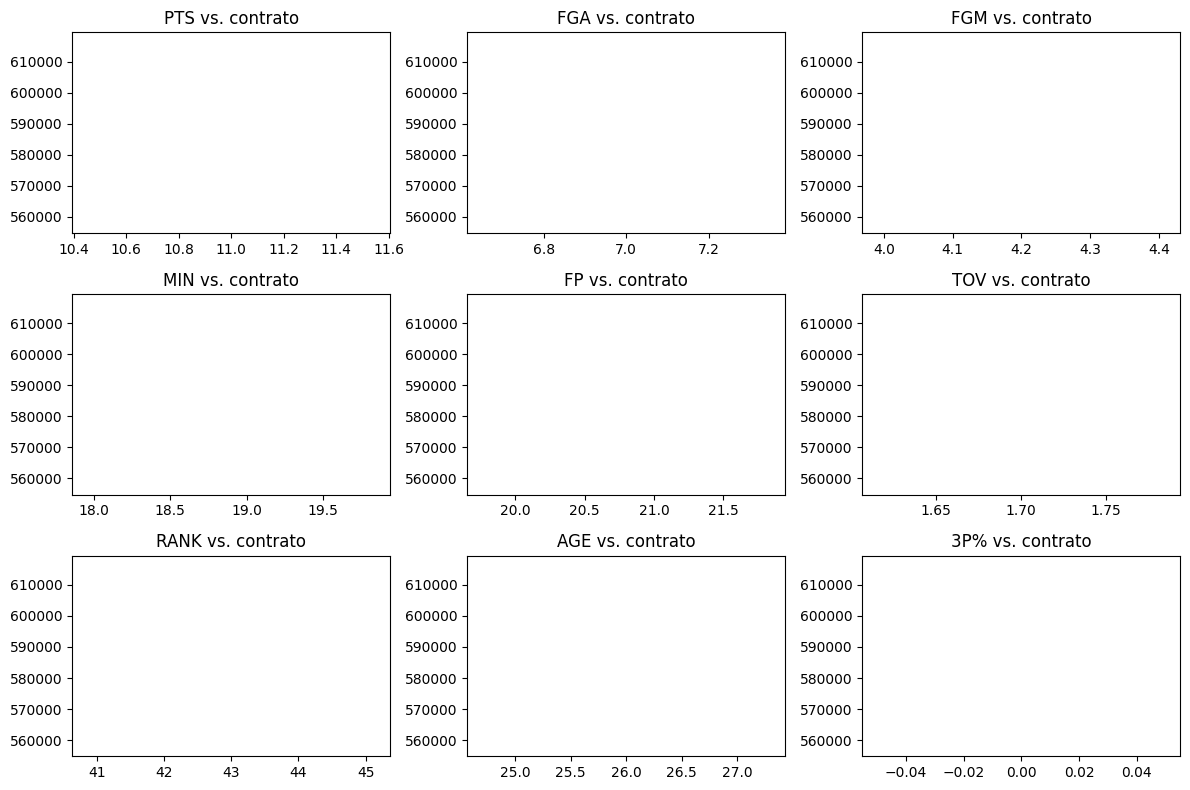

jugadora: BRITTNEY SYKES
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN      

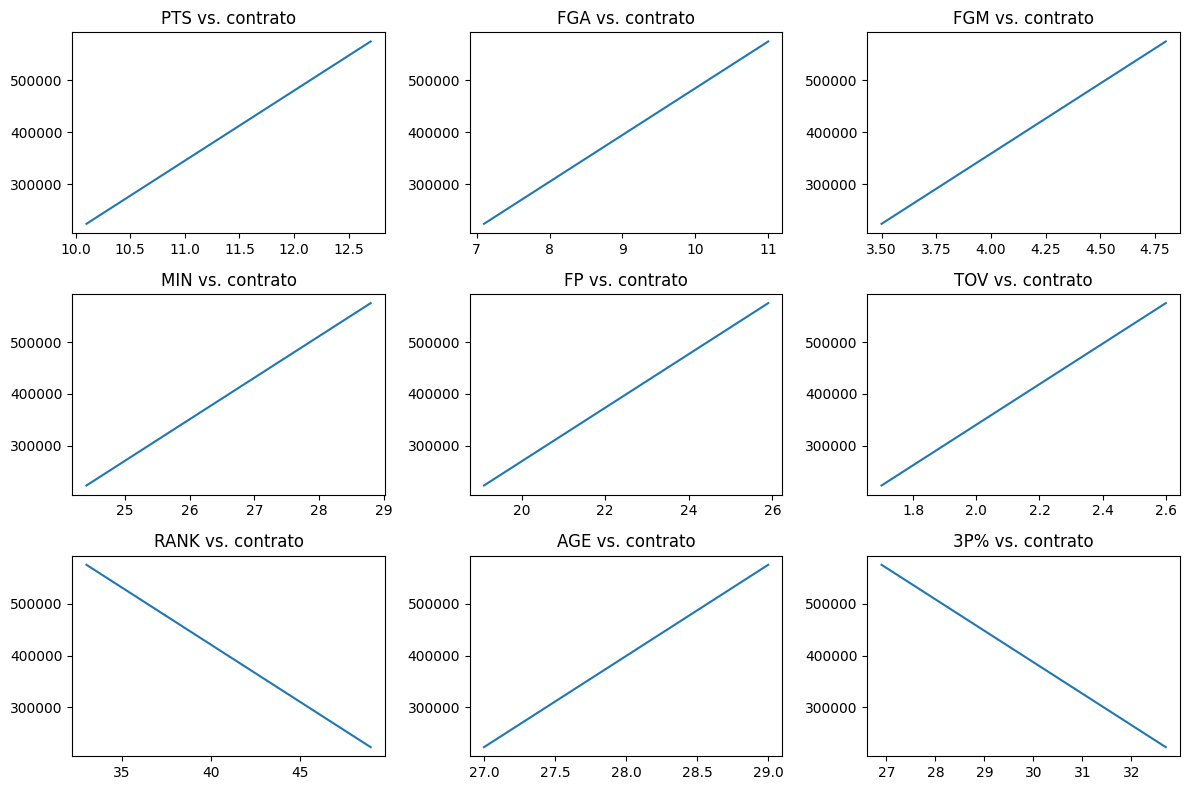

jugadora: CHEYENNE PARKER
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN     

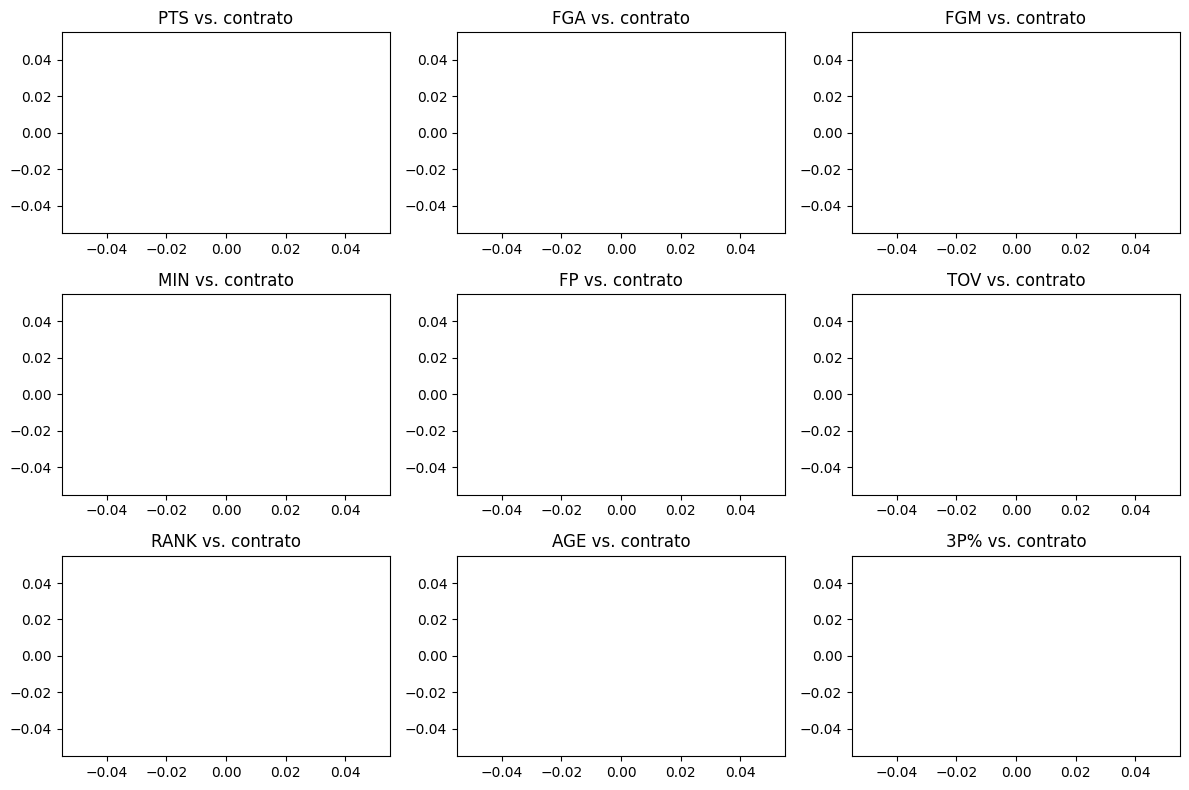

jugadora: NAPHEESA COLLIER
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN    

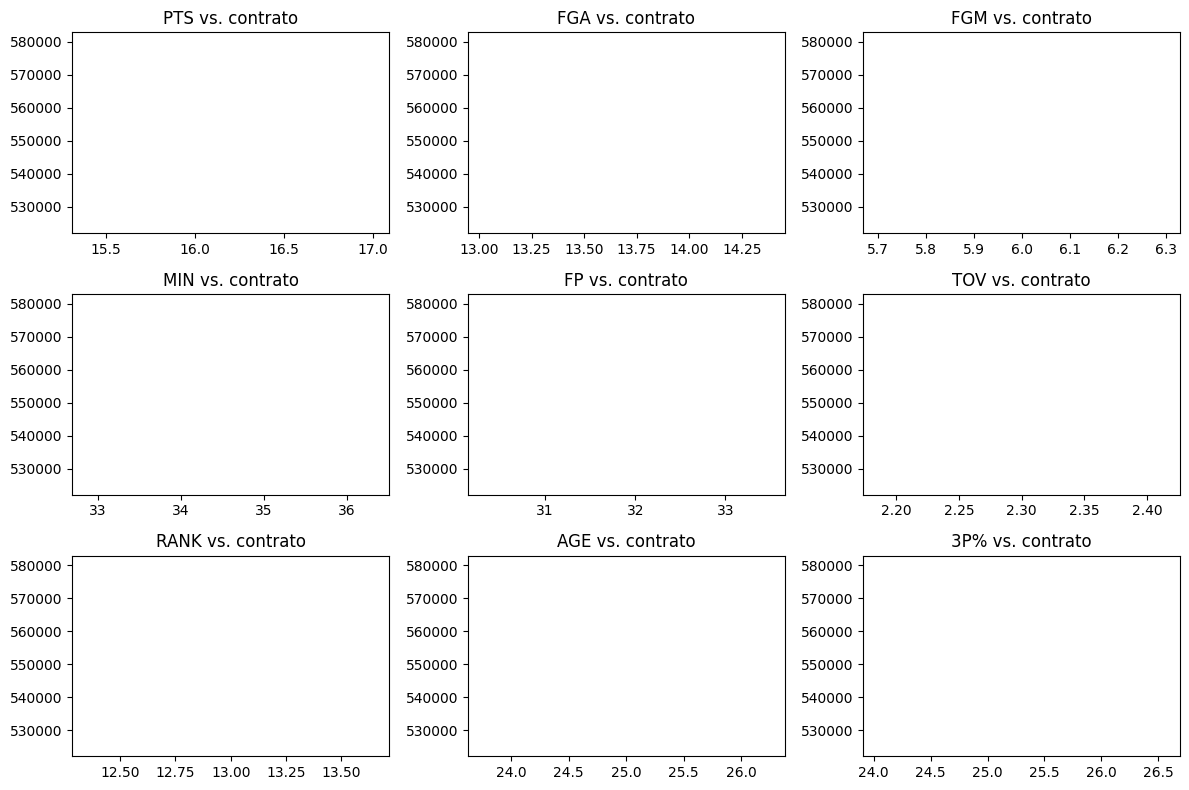

jugadora: MYISHA HINES-ALLEN
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN  

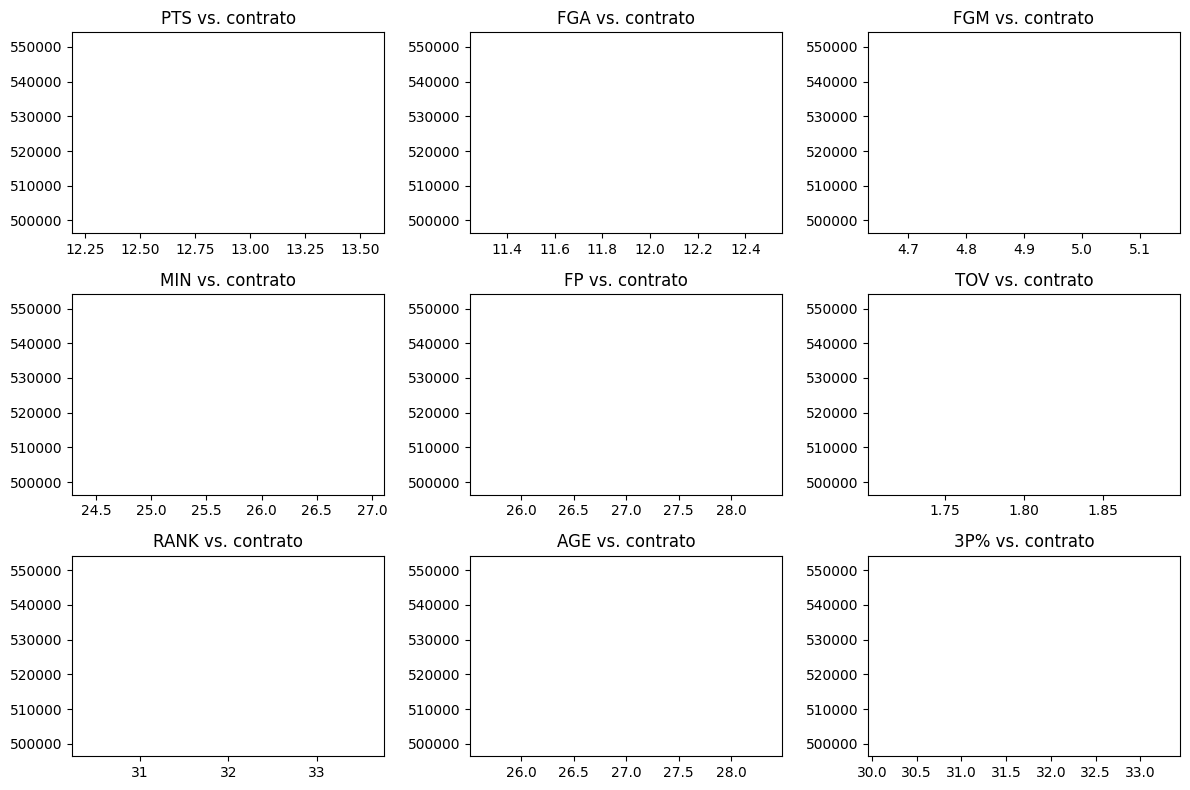

jugadora: JACKIE YOUNG
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN        

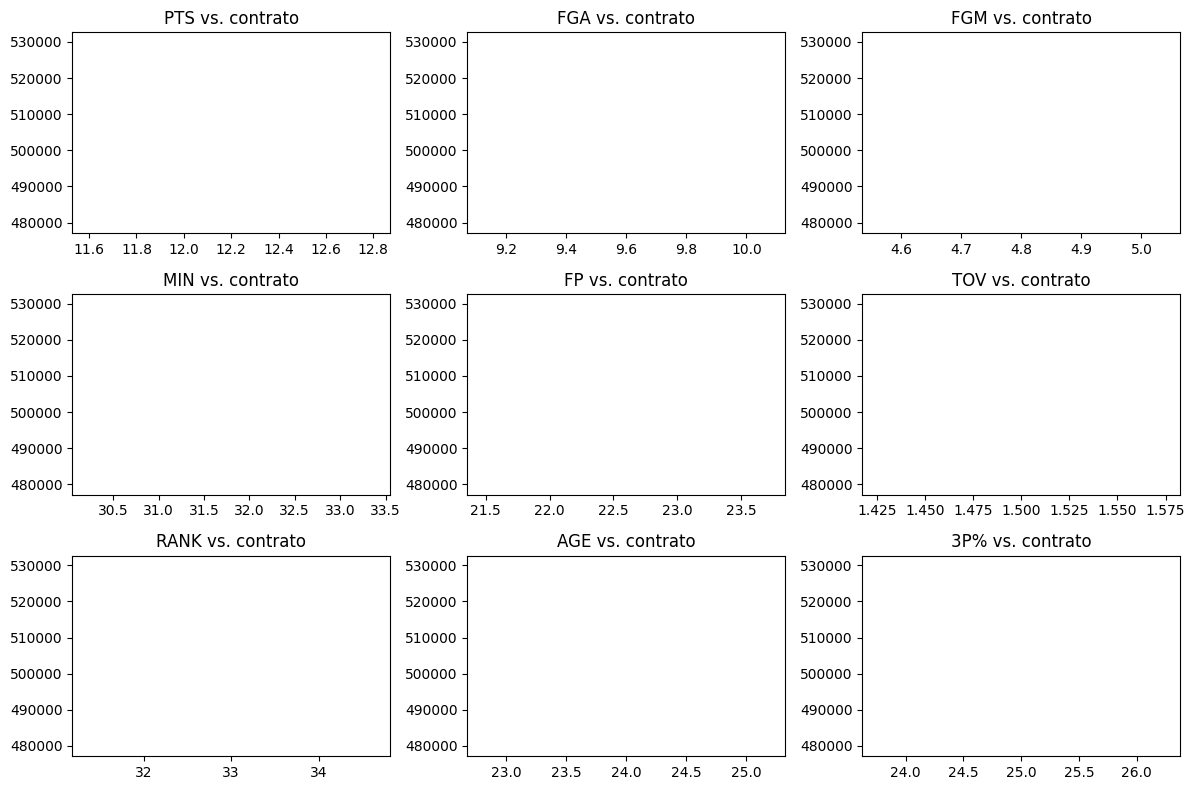

jugadora: ALLISHA GRAY
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN        

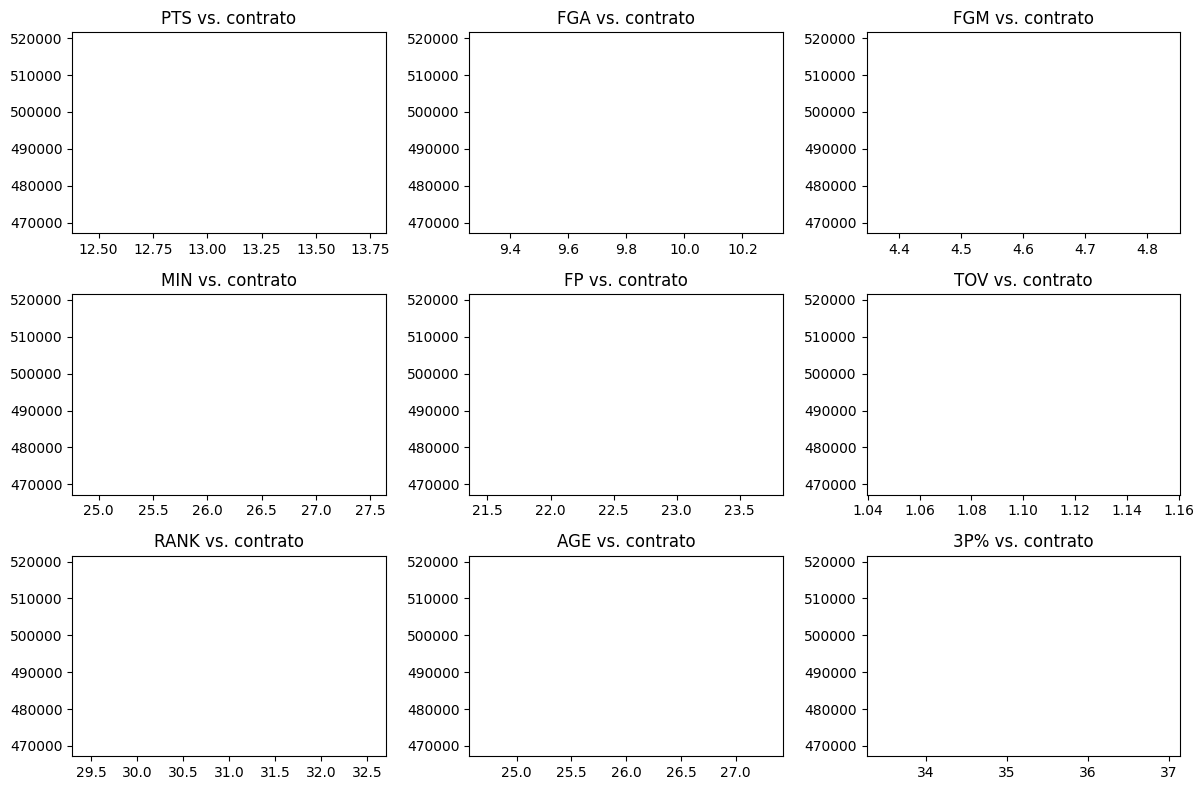

jugadora: JEWELL LOYD
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN         

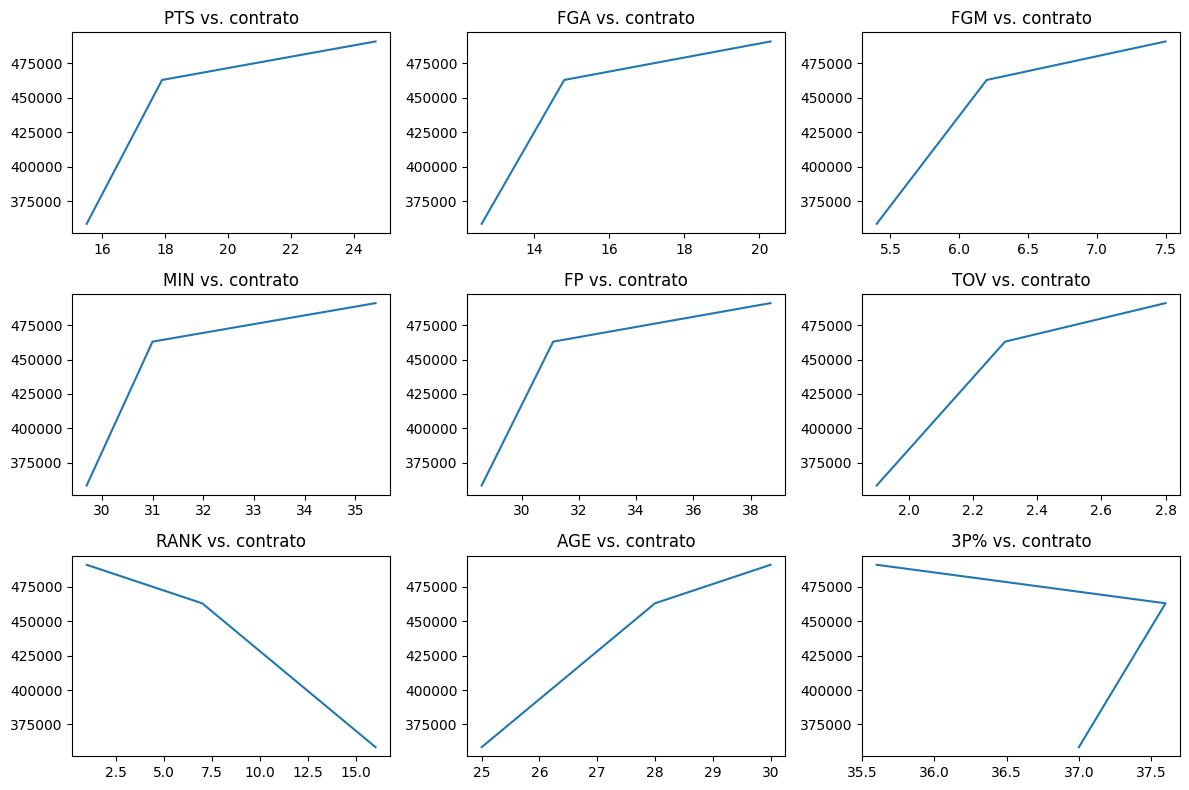

jugadora: KAHLEAH COPPER
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN      

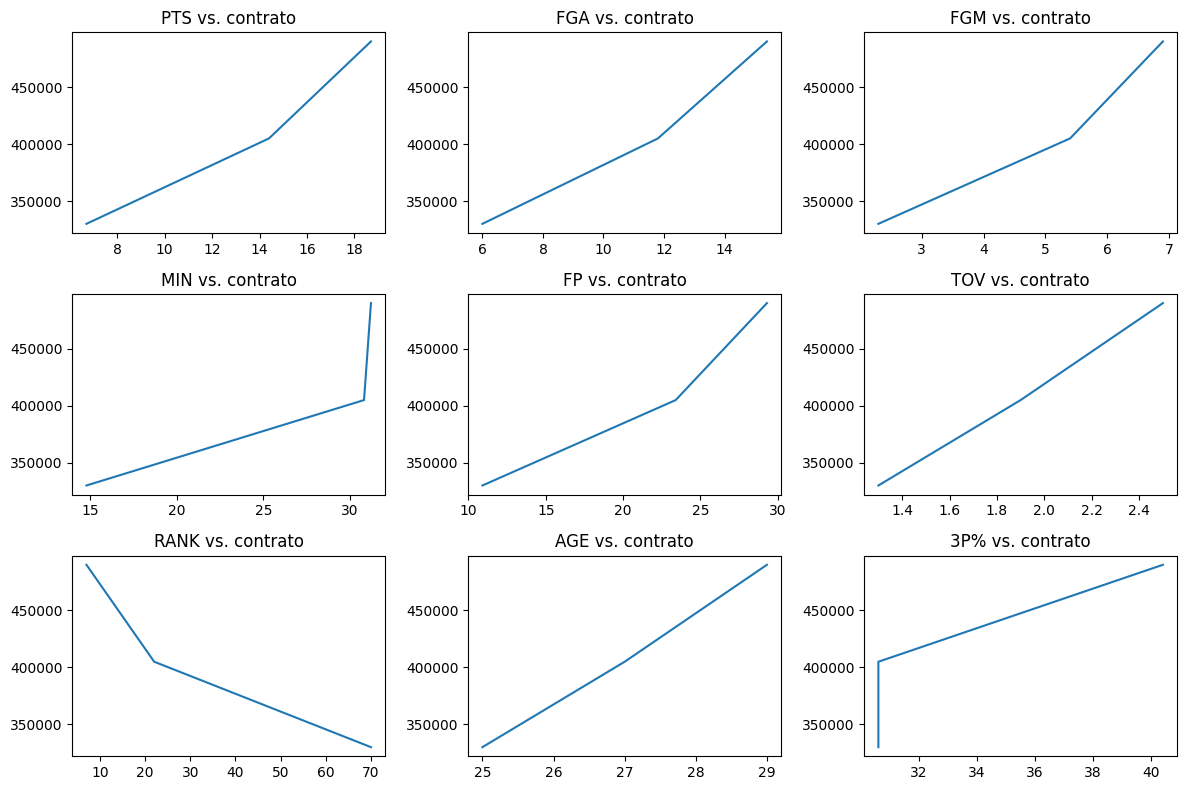

jugadora: MERCEDES RUSSELL
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN    

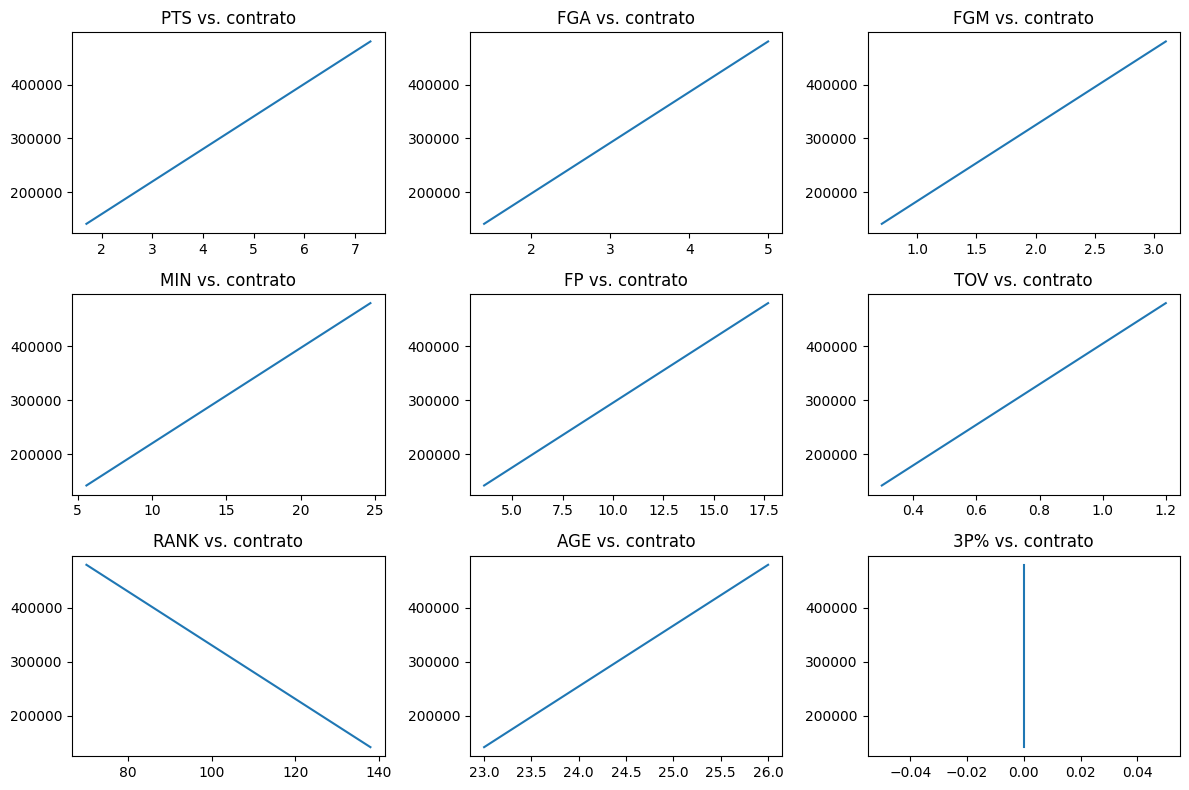

jugadora: DIANA TAURASI
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN       

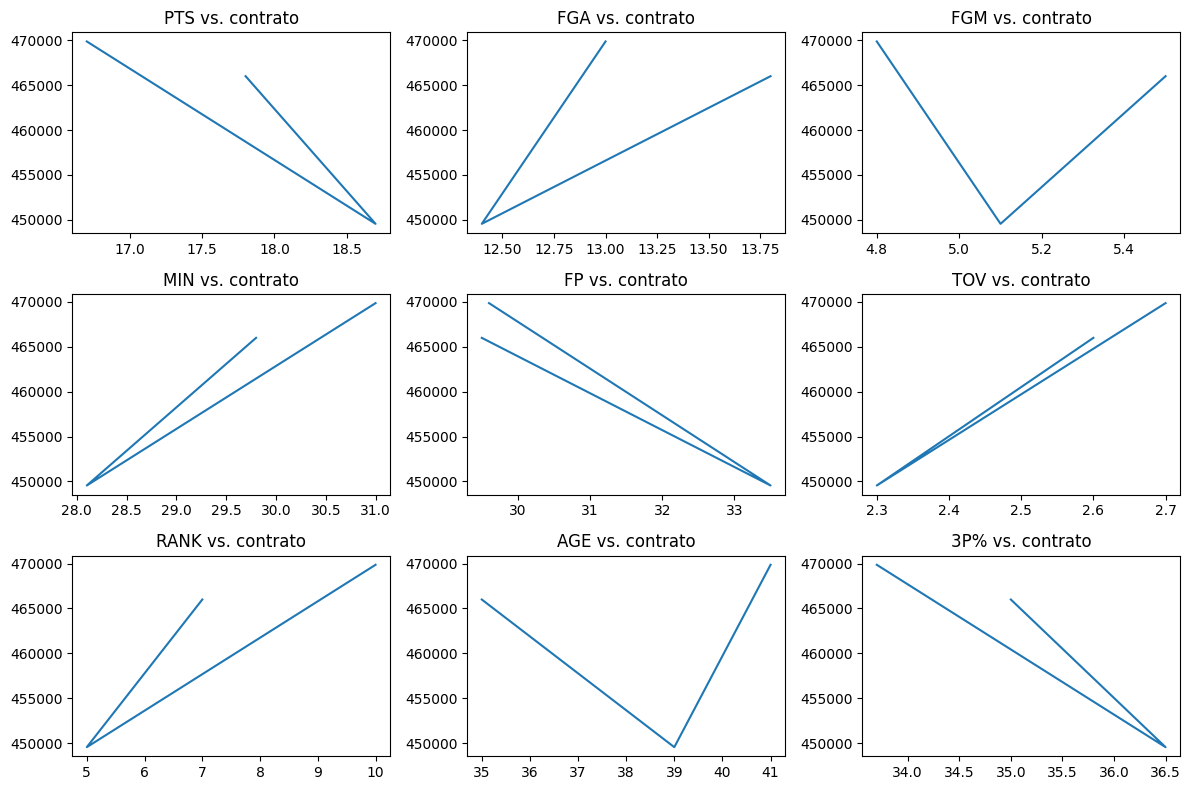

jugadora: ERICA WHEELER
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN       

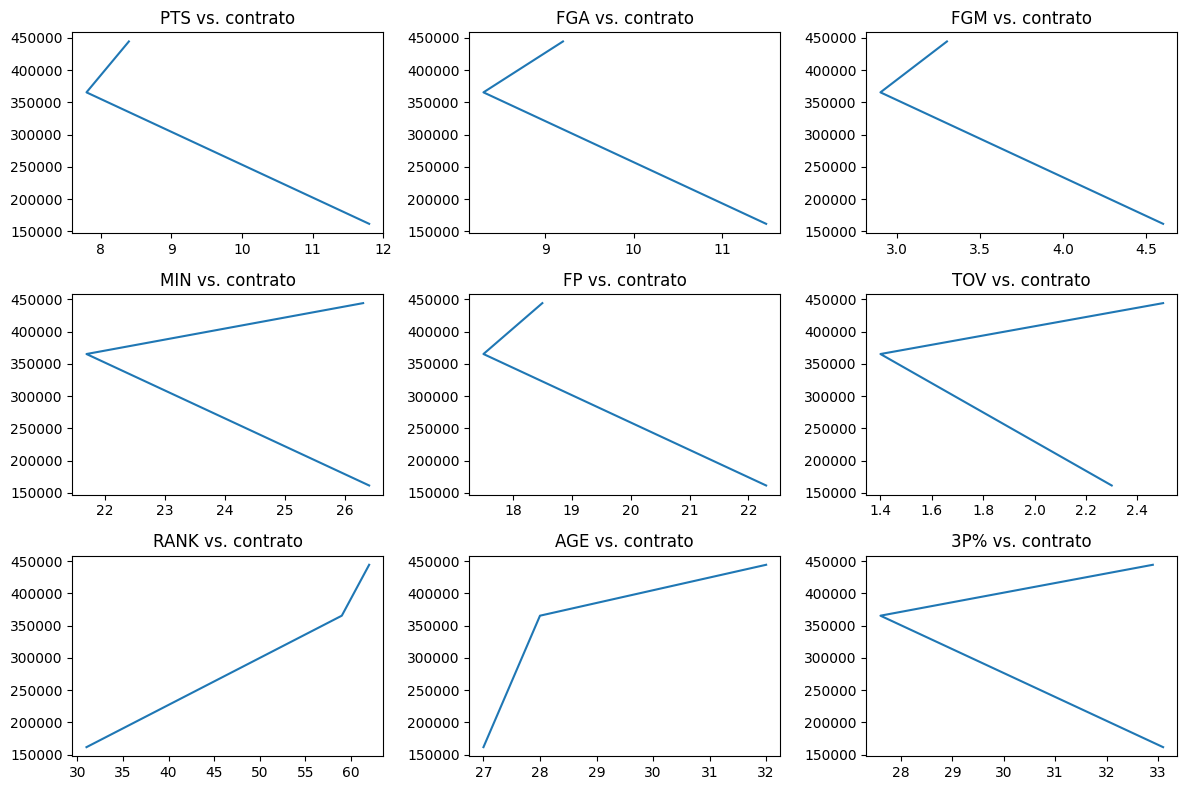

jugadora: MORIAH JEFFERSON
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN    

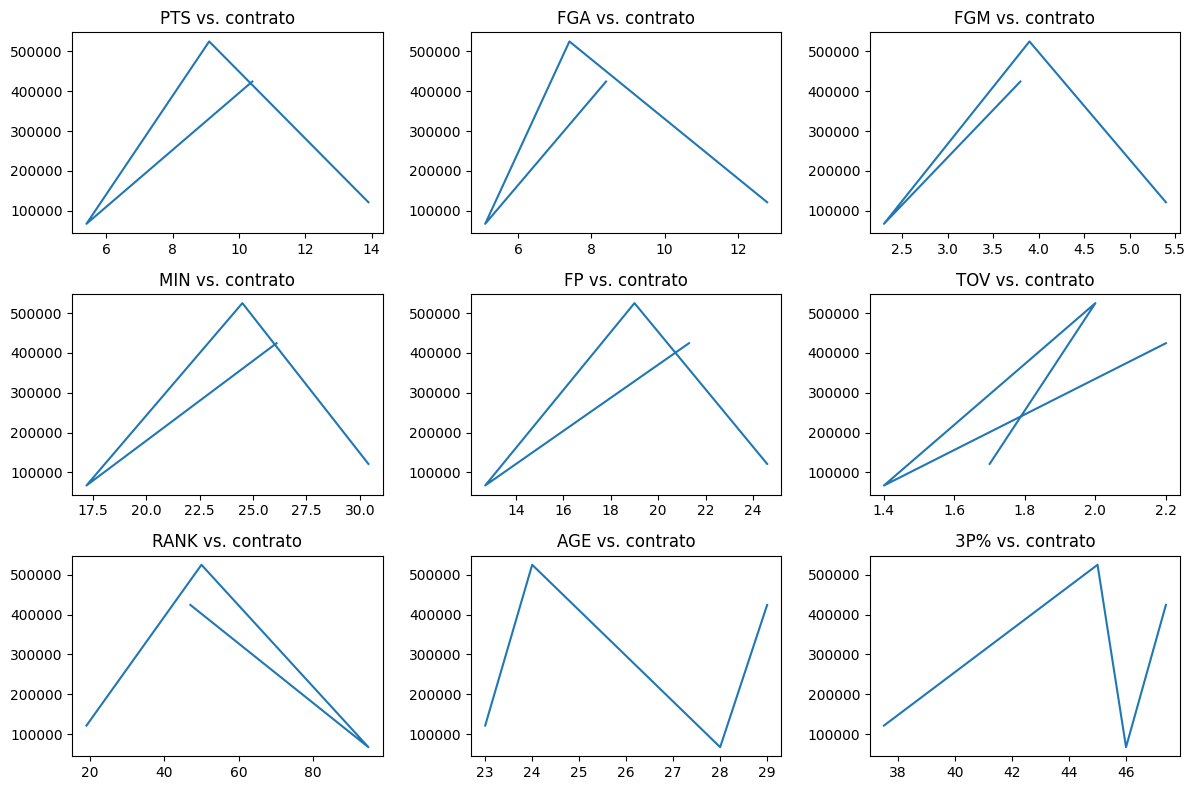

jugadora: SKYLAR DIGGINS-SMITH
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN

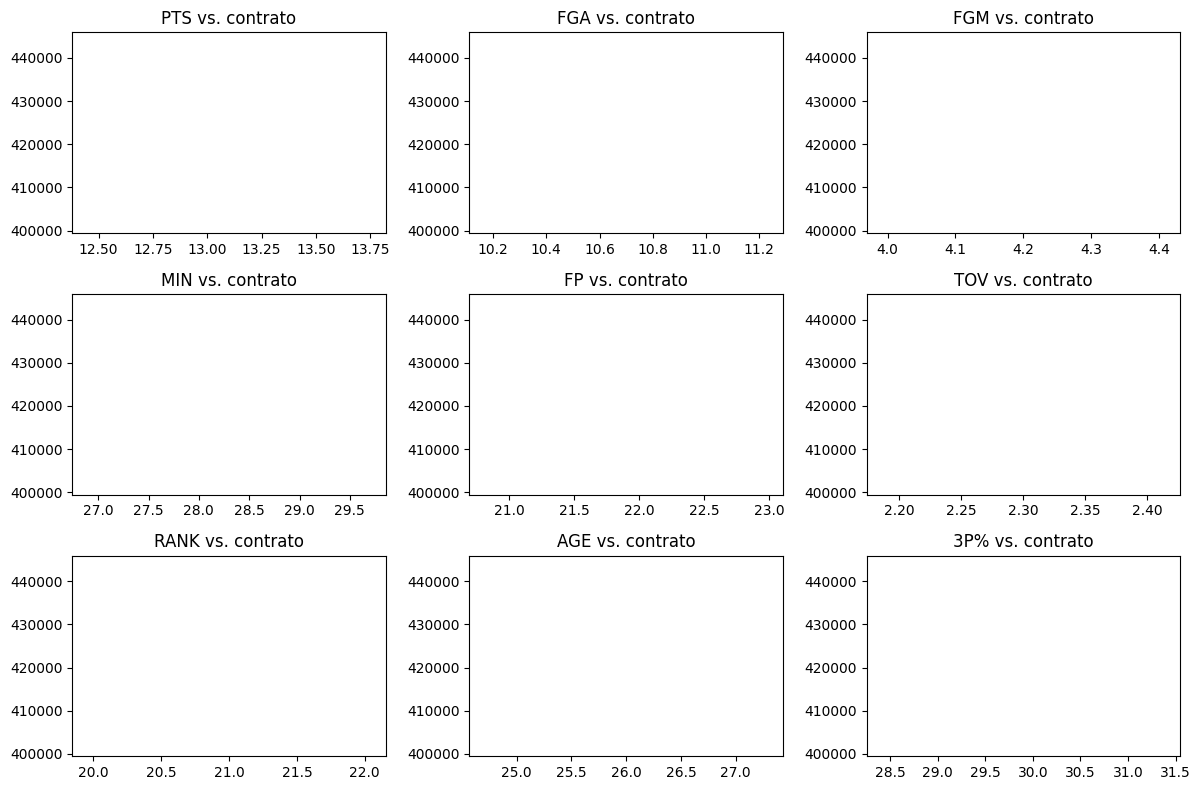

jugadora: KAYLA MCBRIDE
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN       

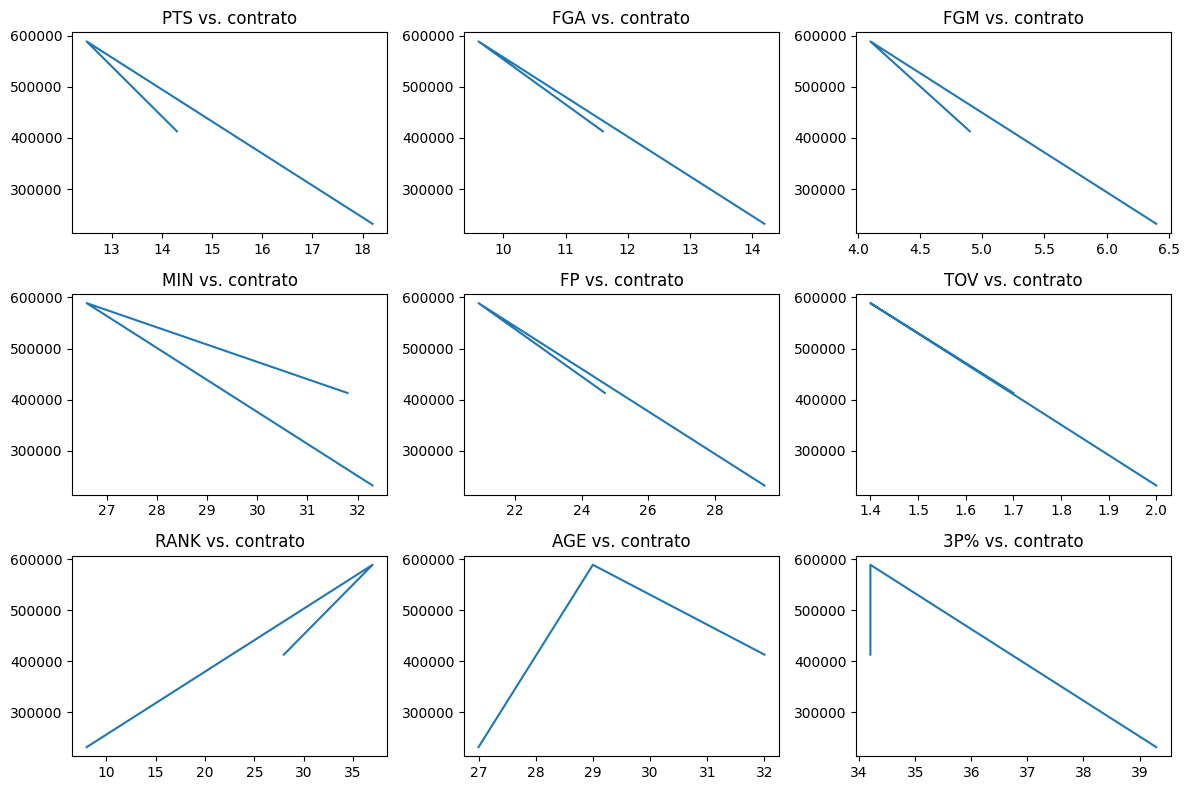

jugadora: SABRINA IONESCU
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN     

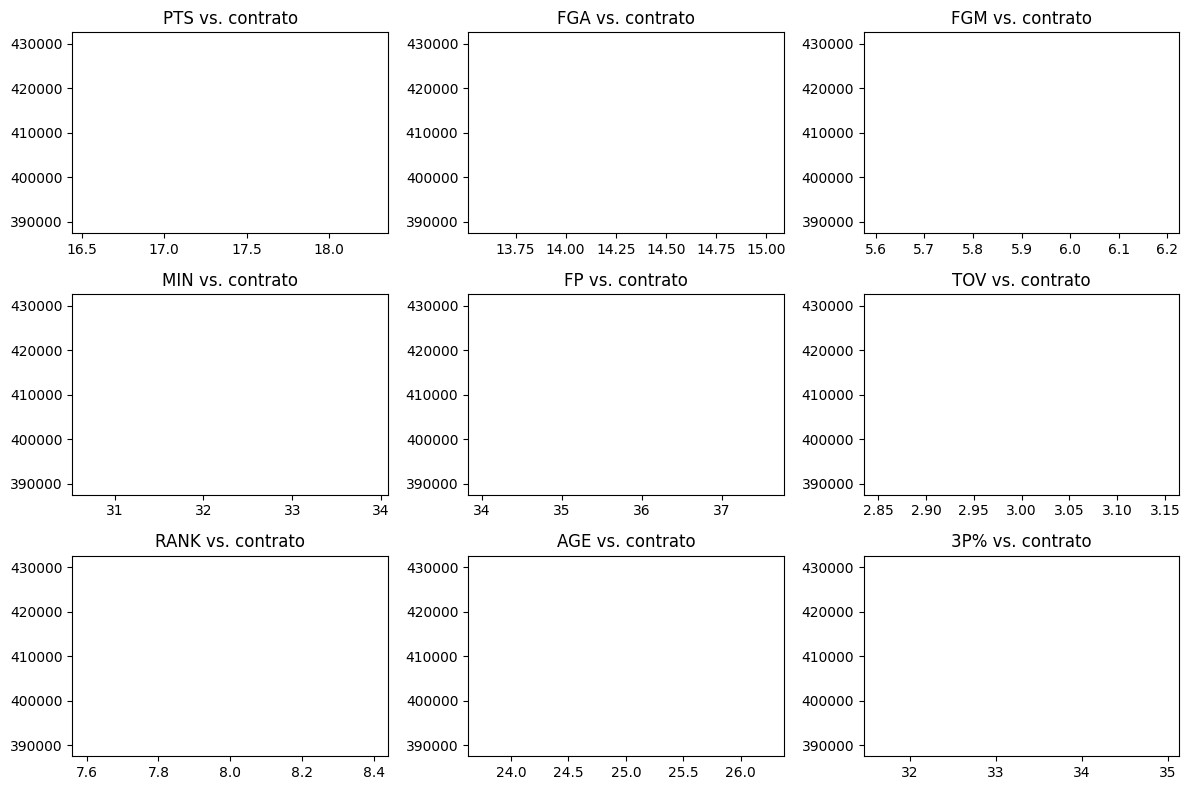

jugadora: A'JA WILSON
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN         

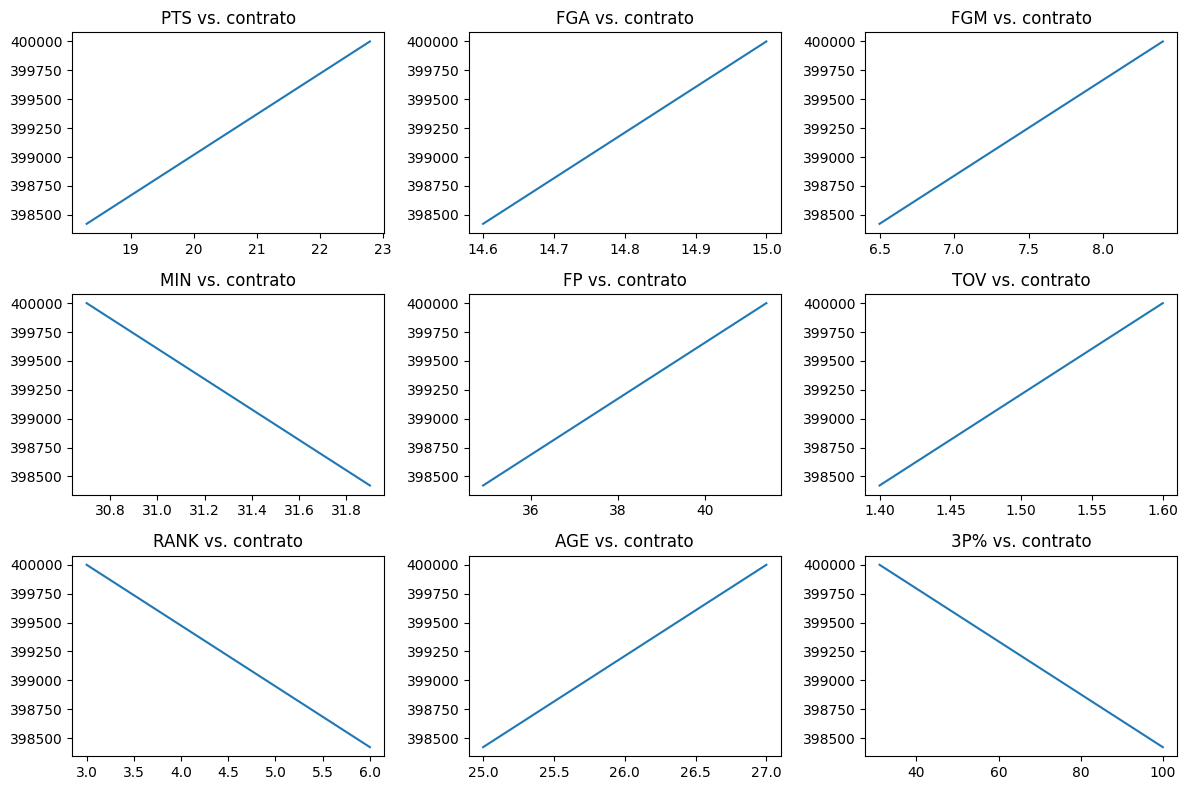

jugadora: ARIEL ATKINS
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN        

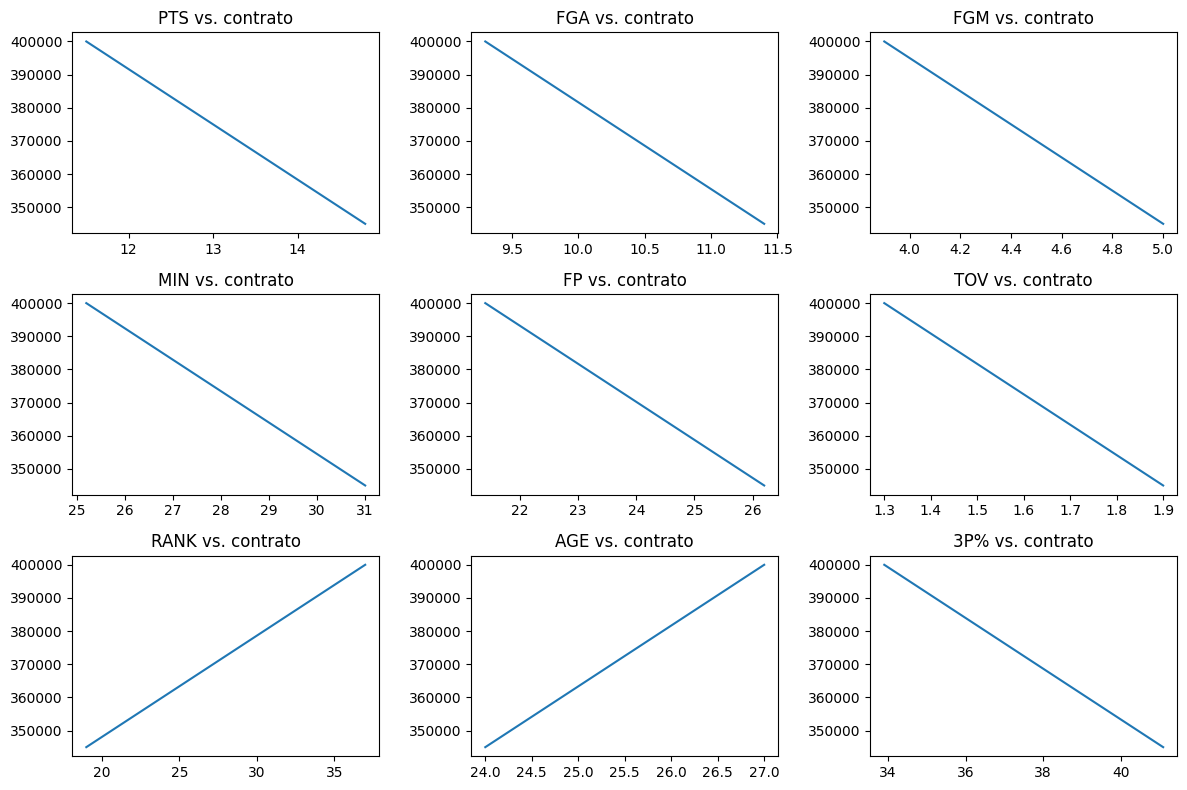

jugadora: KELSEY PLUM
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN         

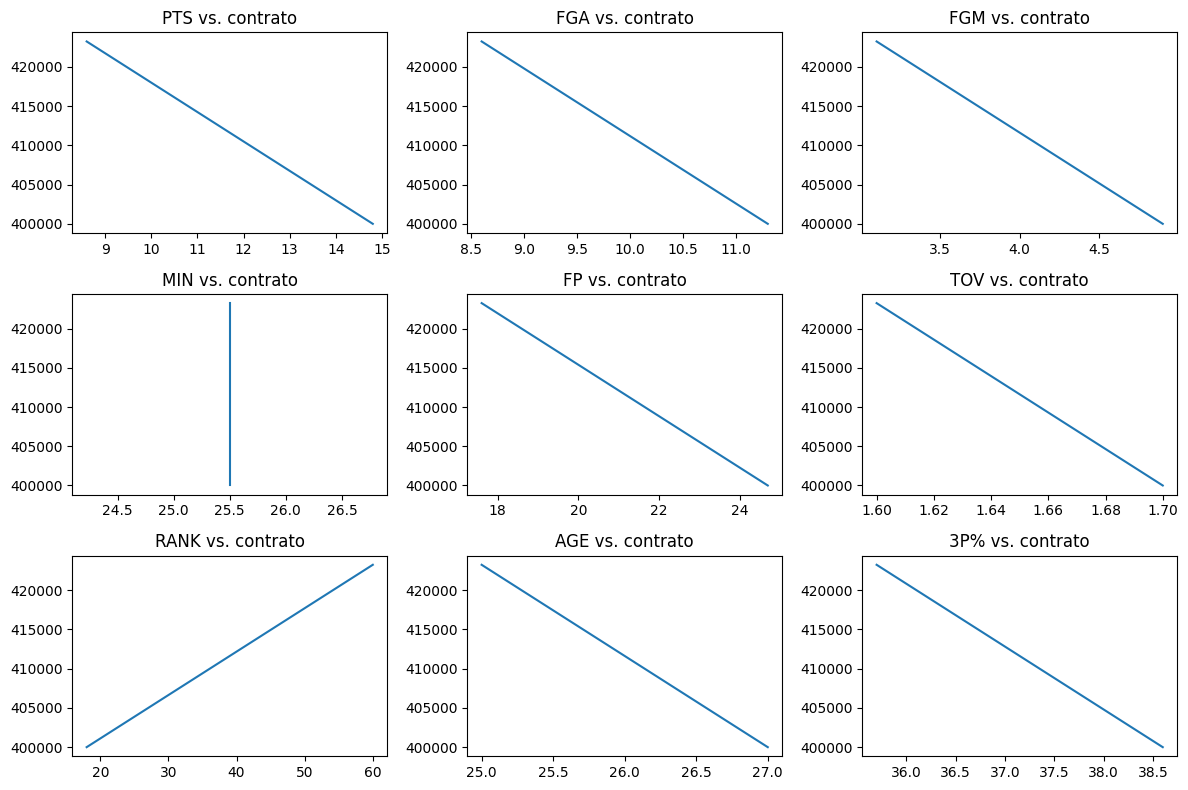

jugadora: NATASHA CLOUD
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN       

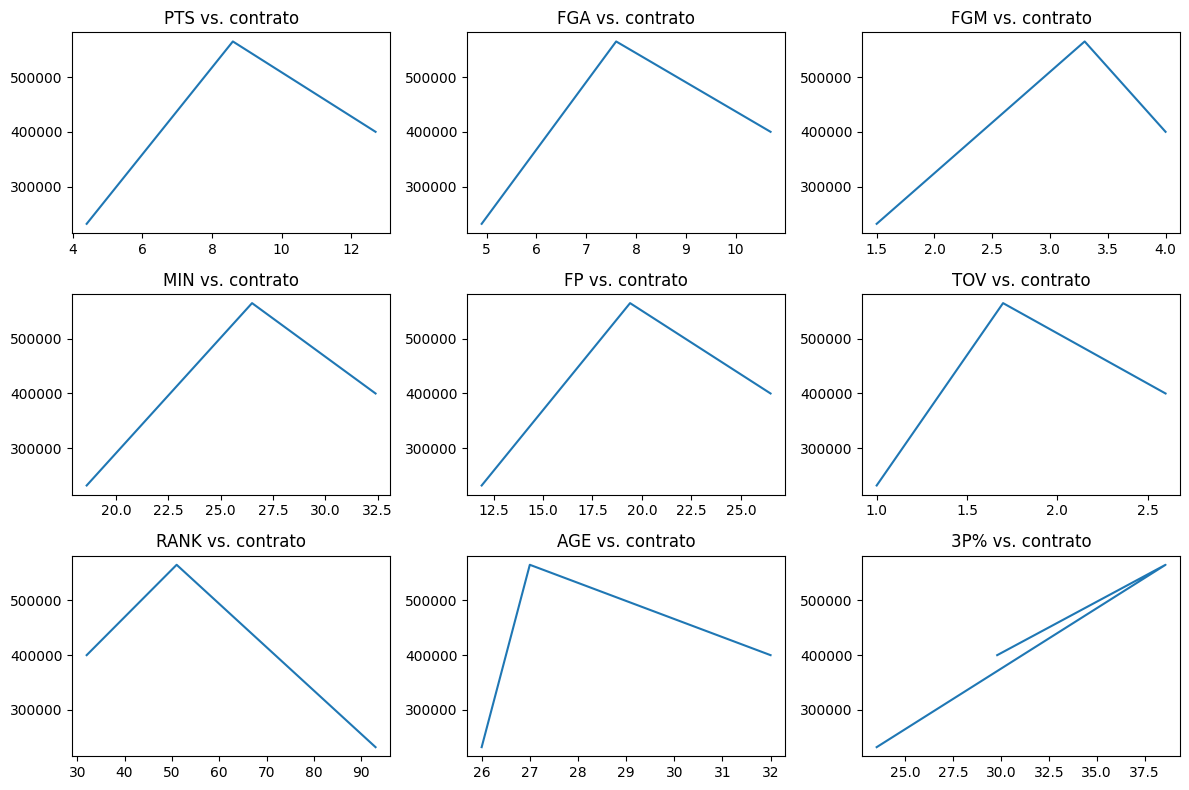

jugadora: CHELSEA GRAY
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN        

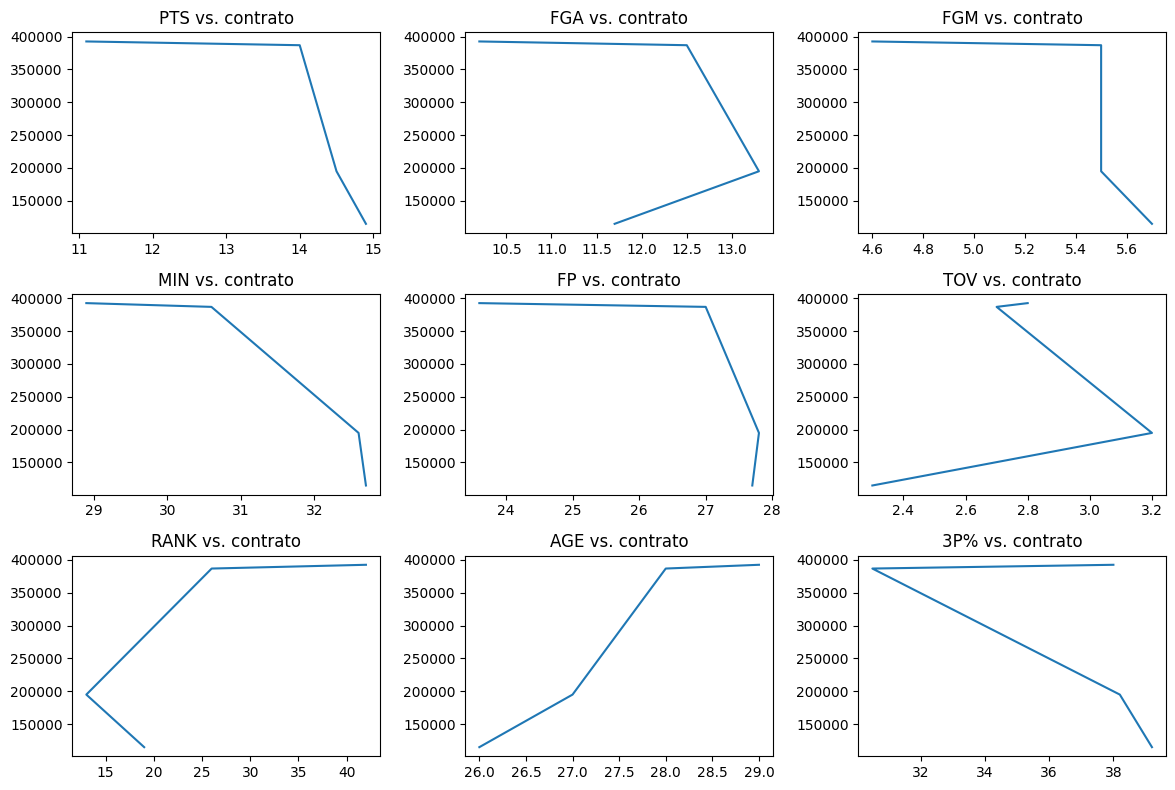

jugadora: KALANI BROWN
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN        

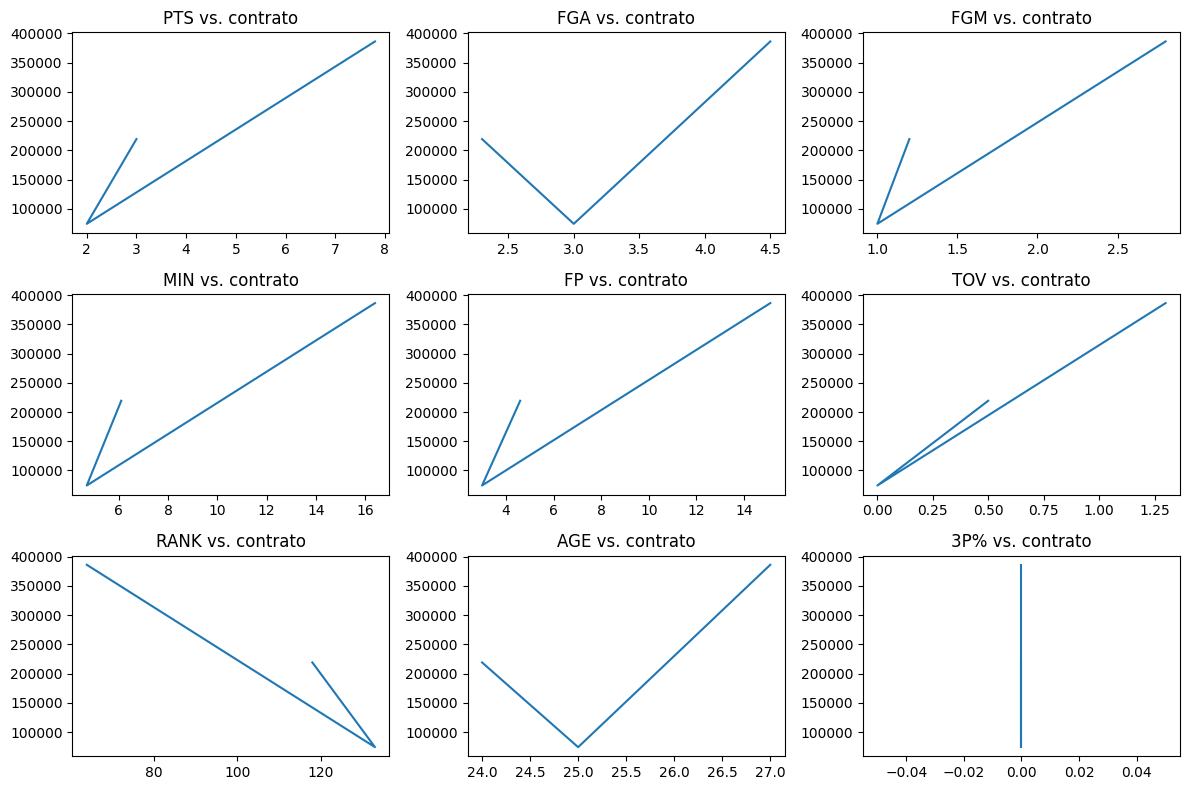

jugadora: AZURÁ STEVENS
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN       

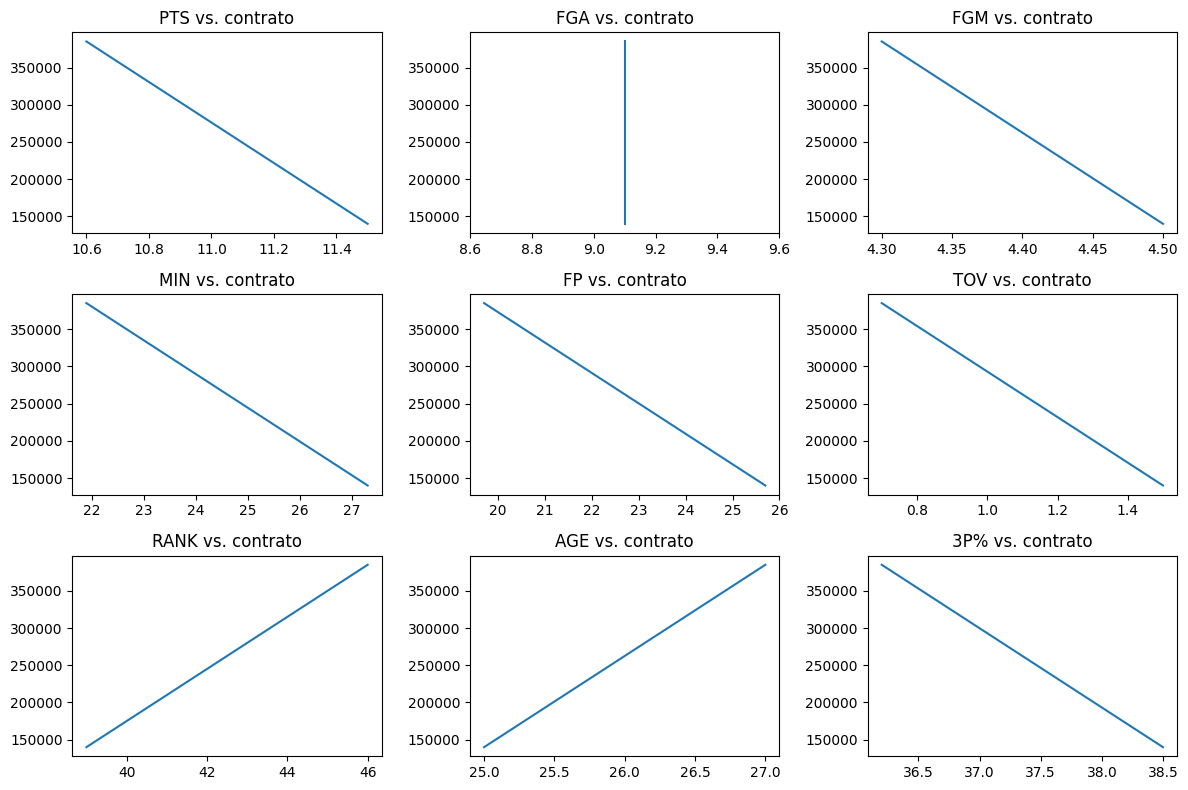

jugadora: JONQUEL JONES
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN       

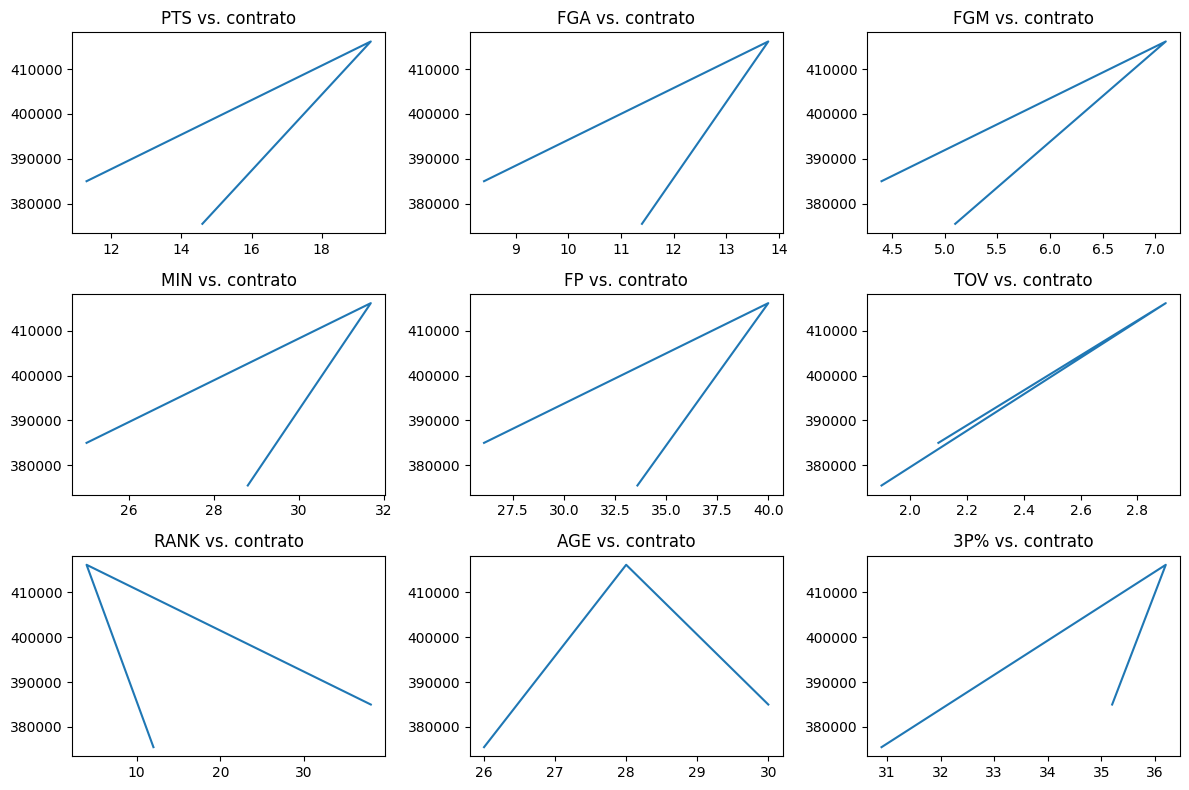

jugadora: COURTNEY VANDERSLOOT
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN

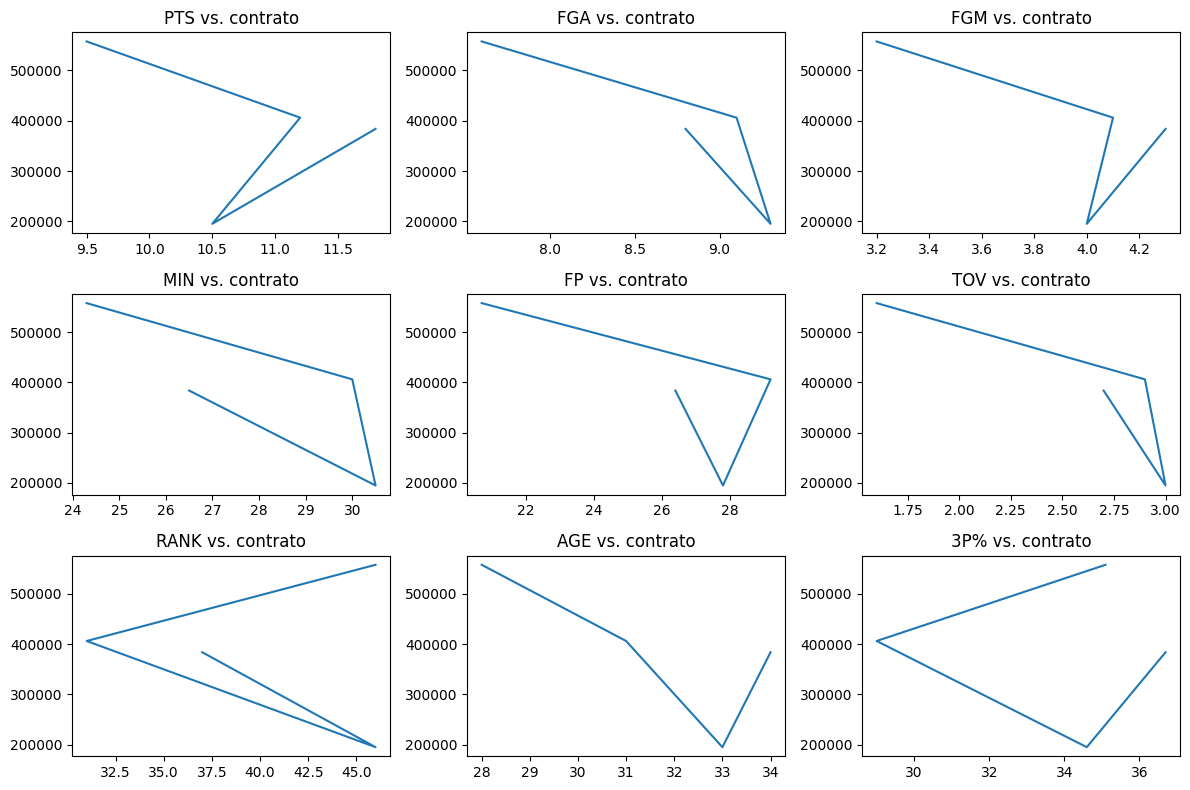

jugadora: JORDIN CANADA
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN       

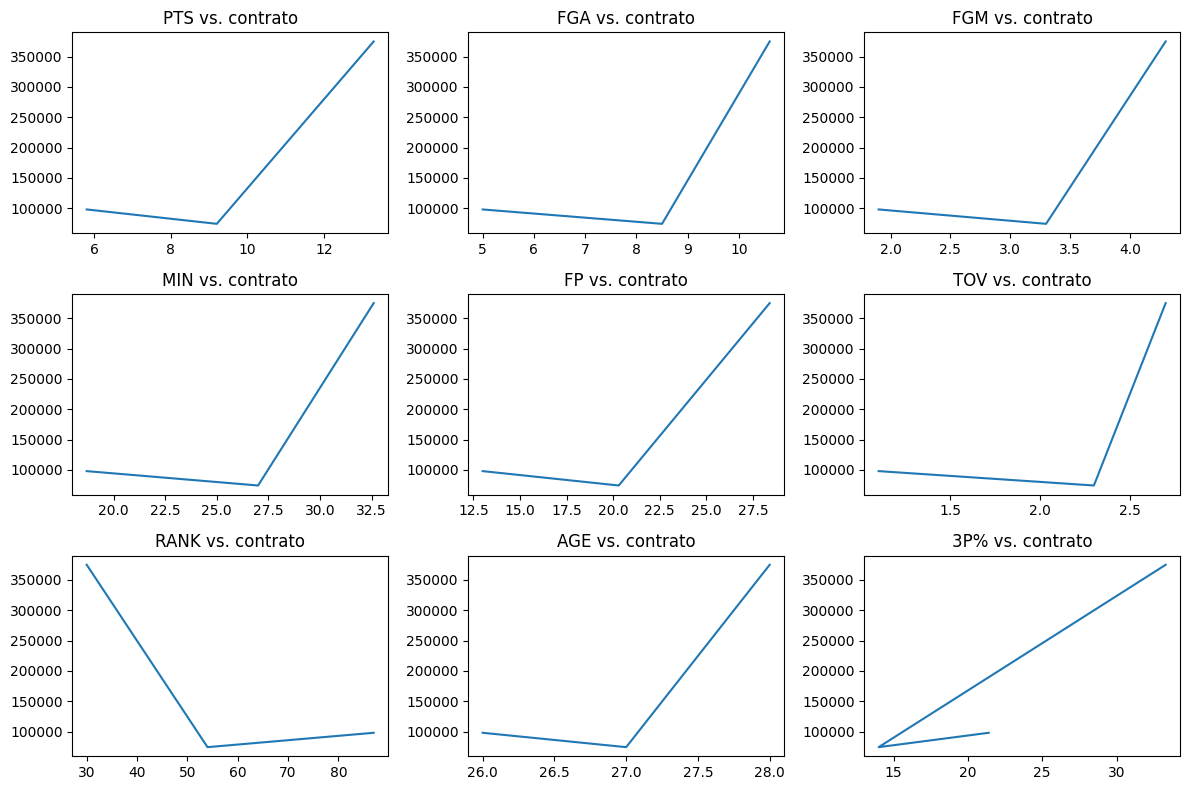

jugadora: BETNIJAH LANEY
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN      

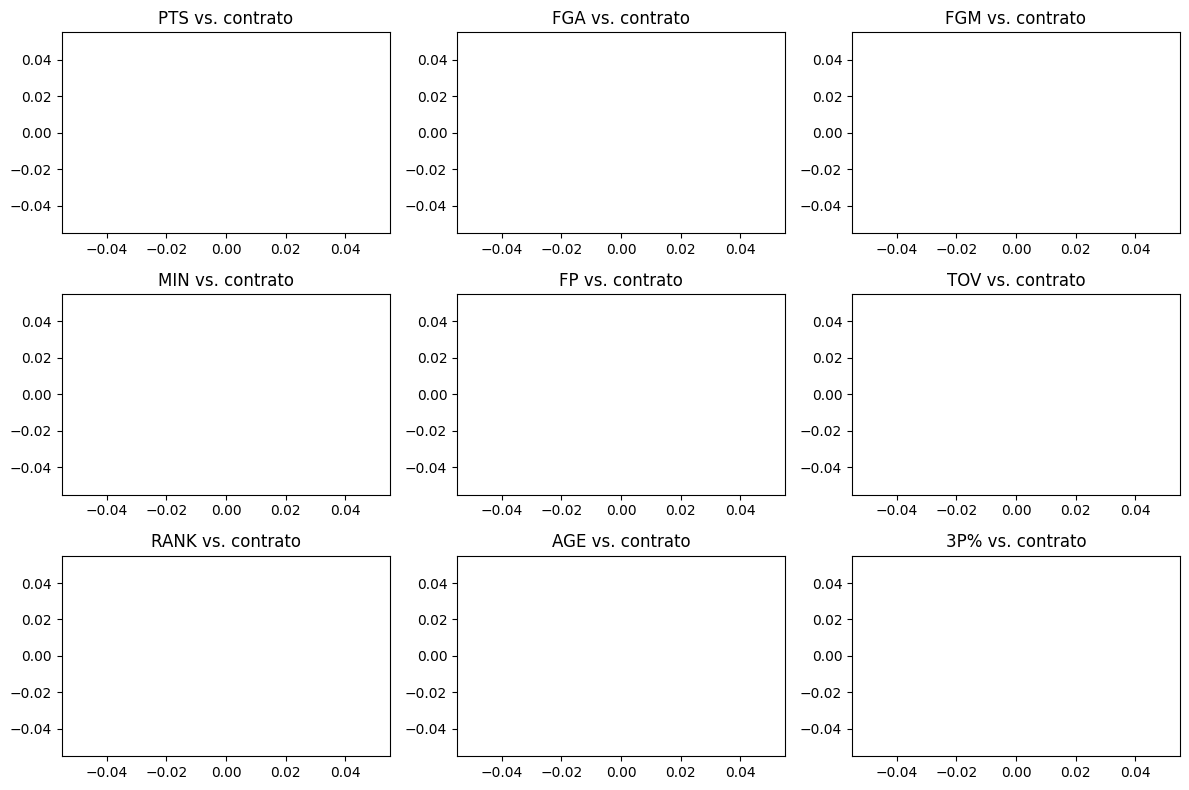

jugadora: KATIE LOU SAMUELSON
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN 

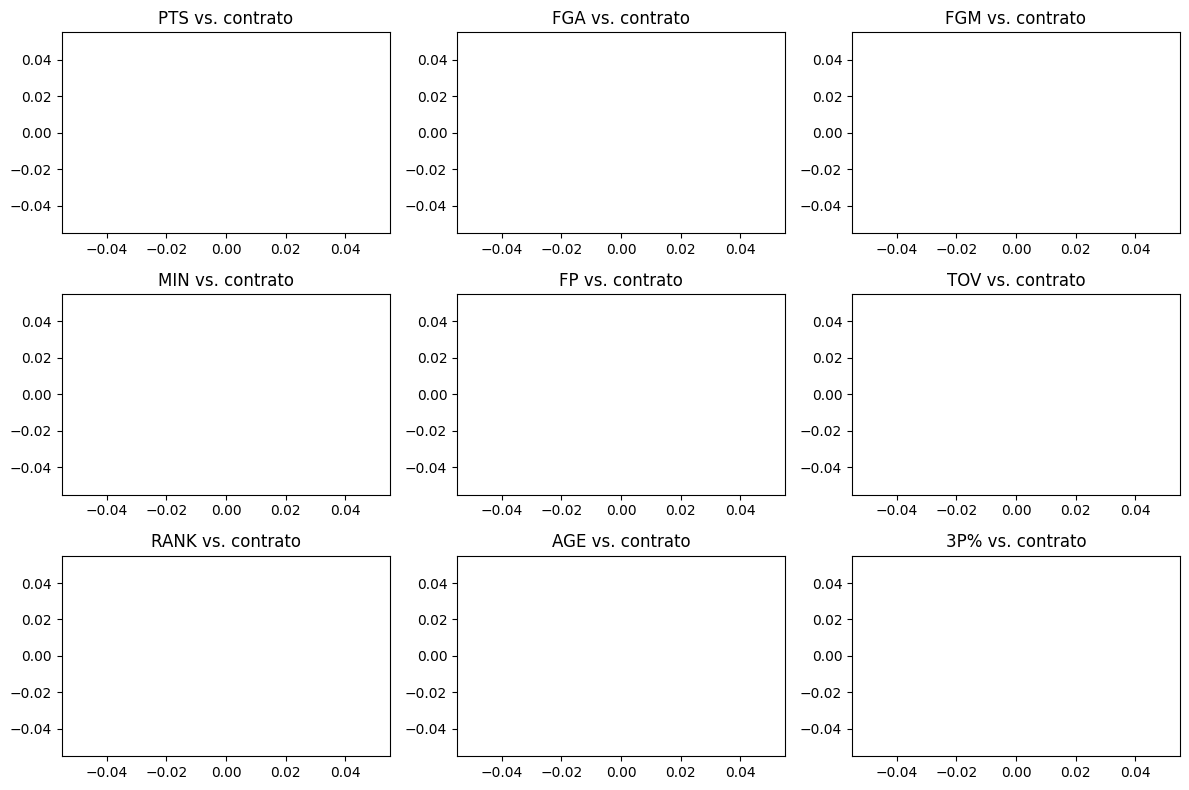

jugadora: COURTNEY WILLIAMS
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN   

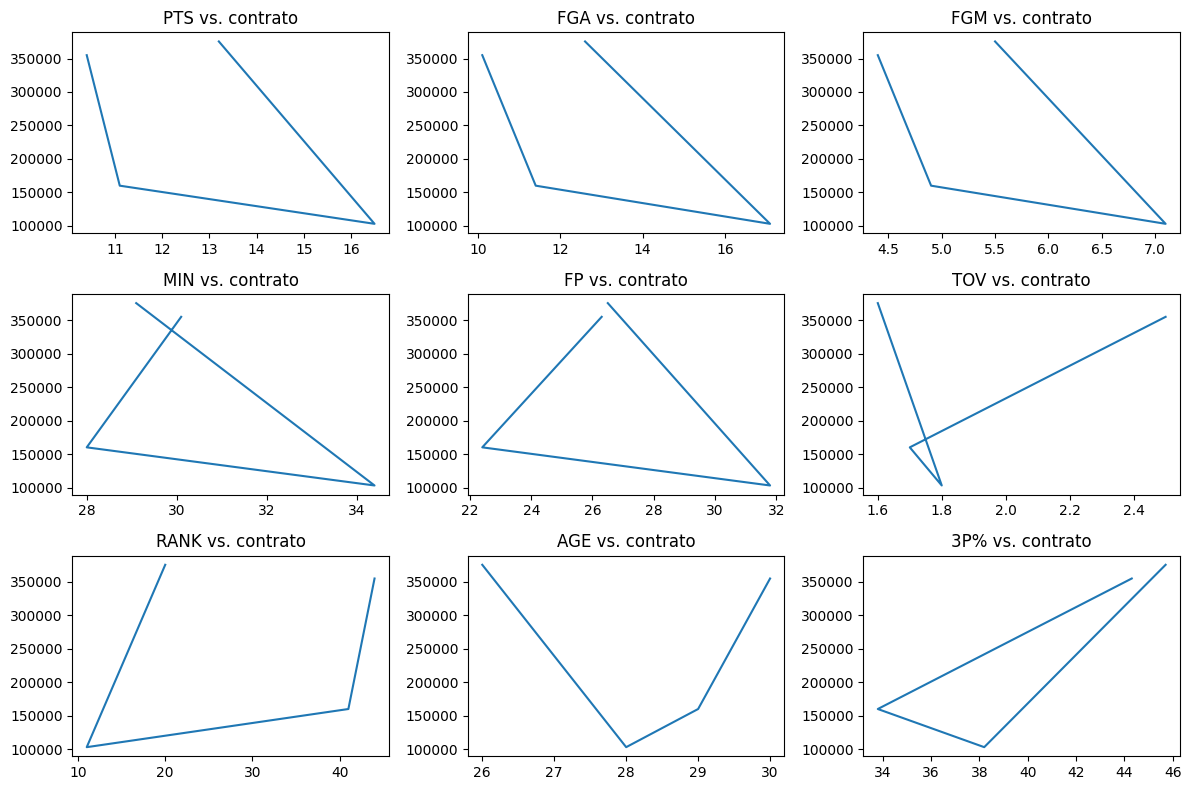

jugadora: STEFANIE DOLSON
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN     

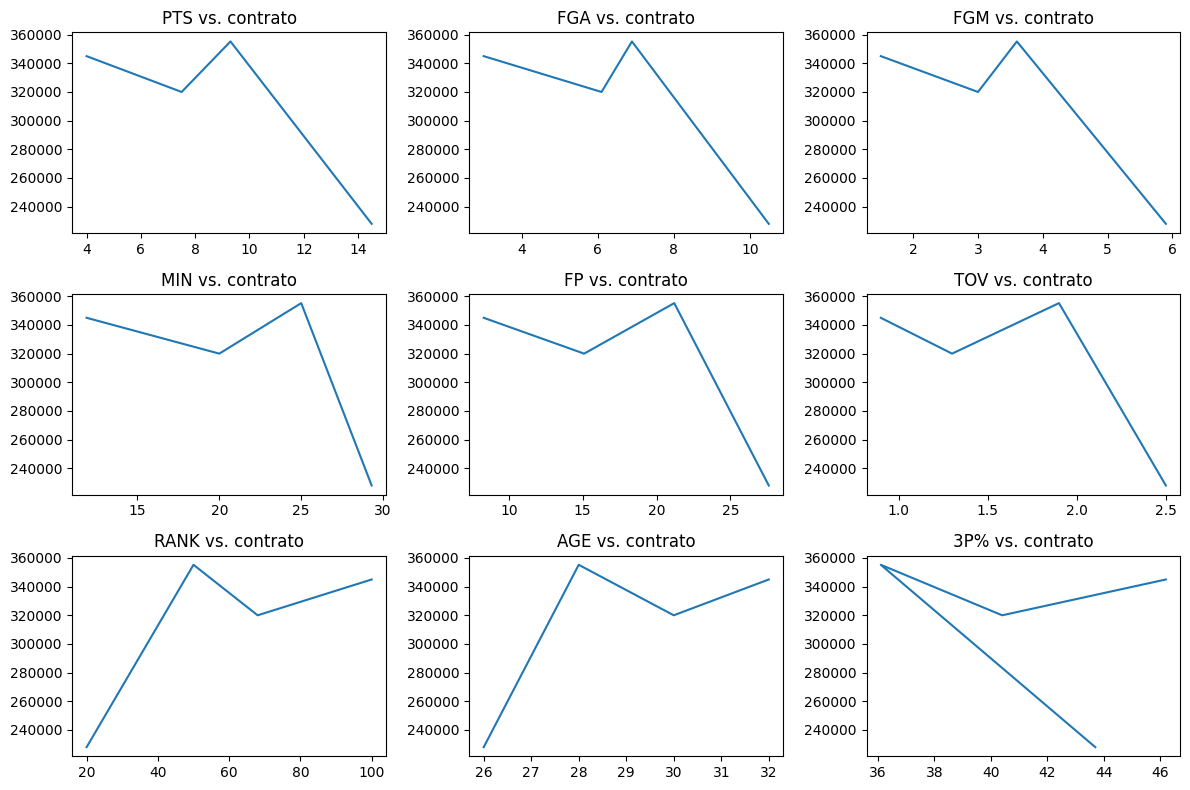

jugadora: CAITLIN CLARK
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN       

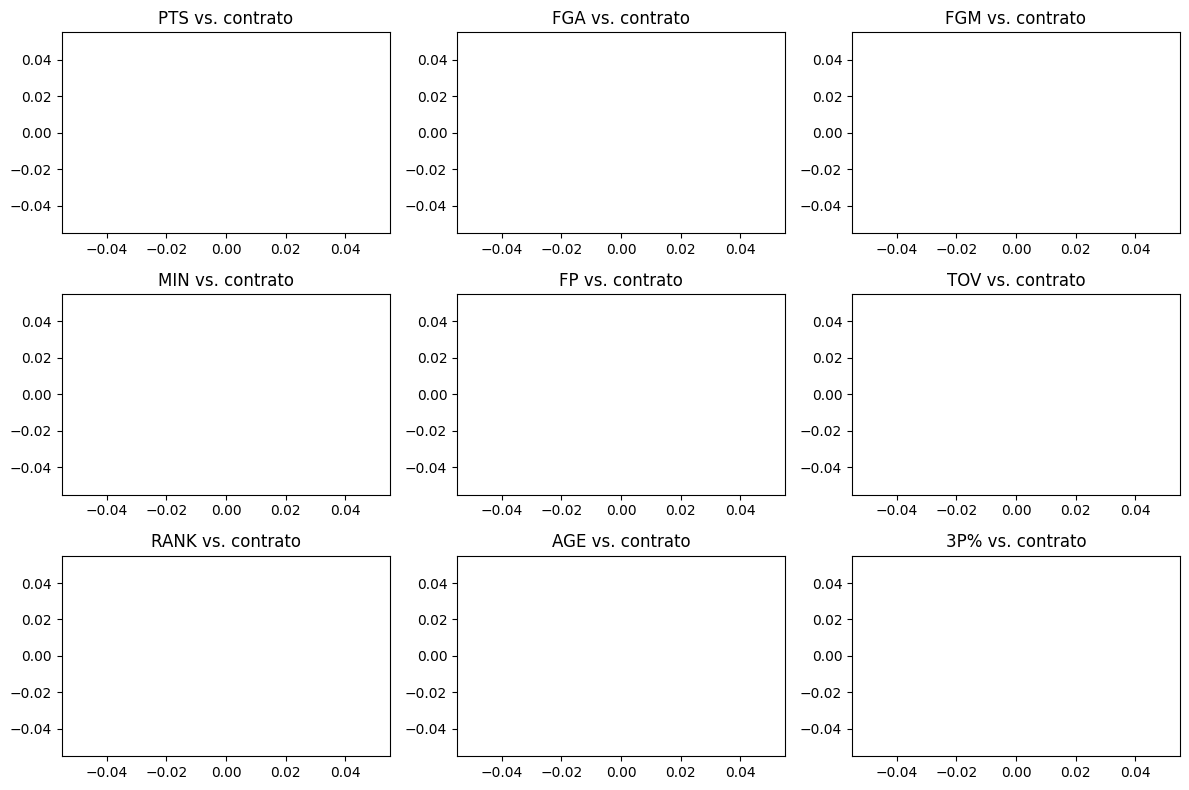

jugadora: CAMERON BRINK
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN       

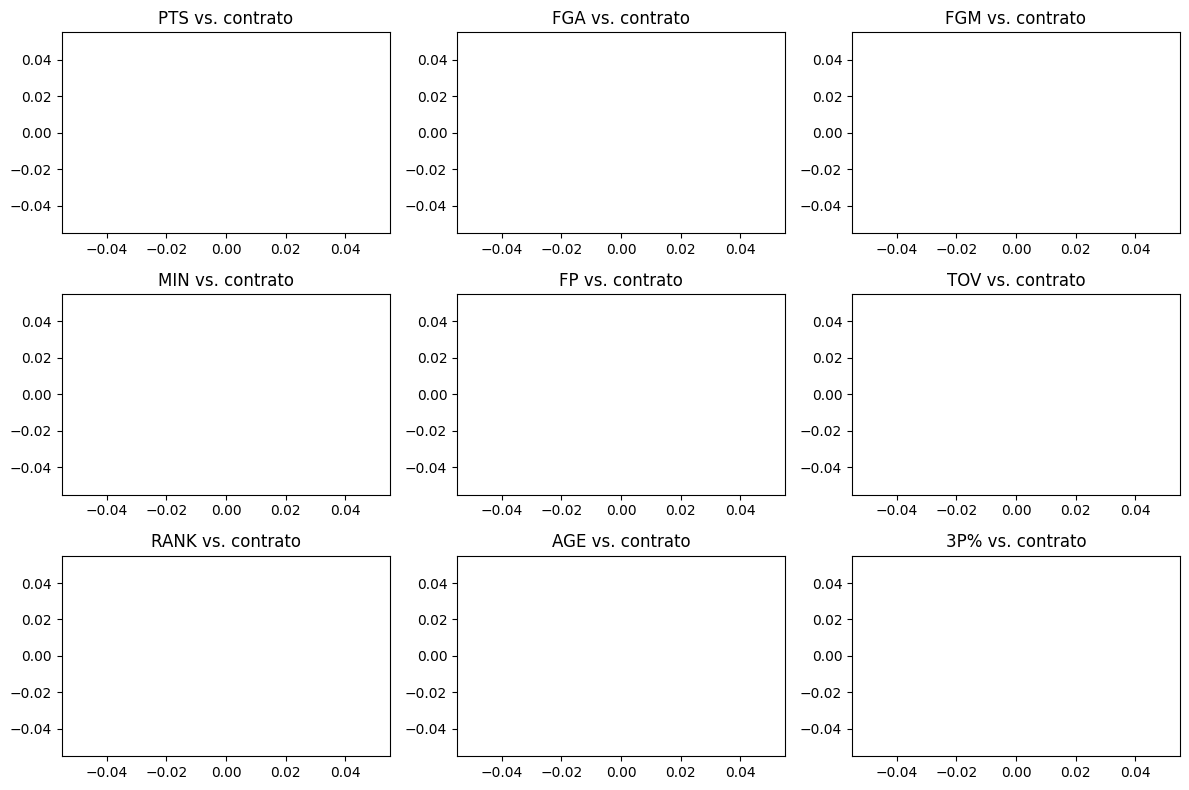

jugadora: KAMILLA CARDOSO
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN     

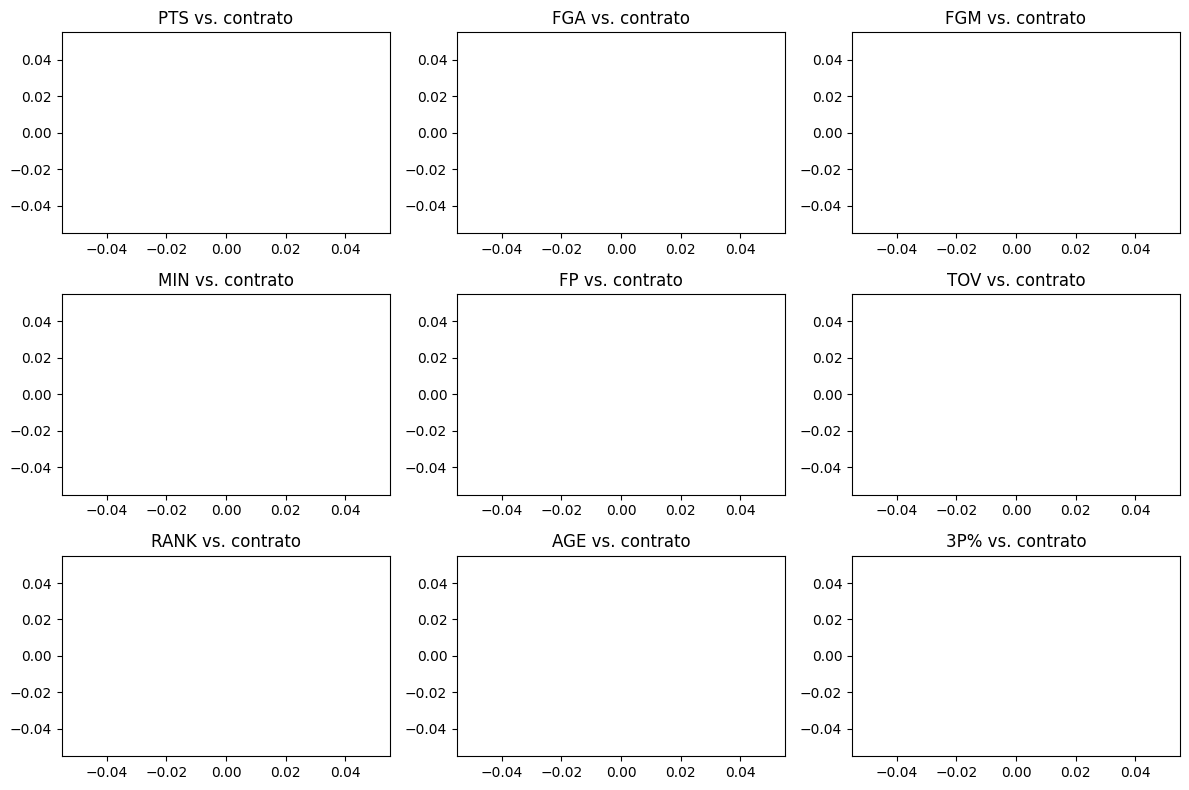

jugadora: RICKEA JACKSON
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN      

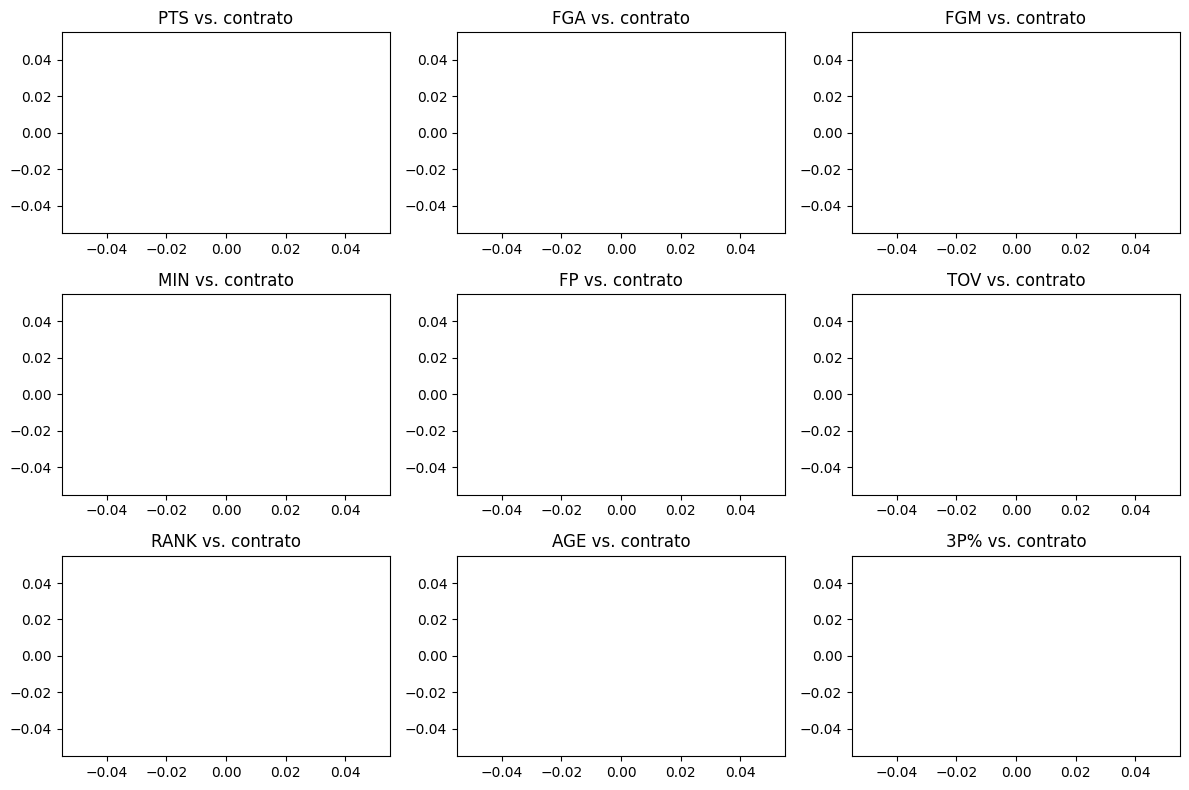

jugadora: STEPHANIE SOARES
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN    

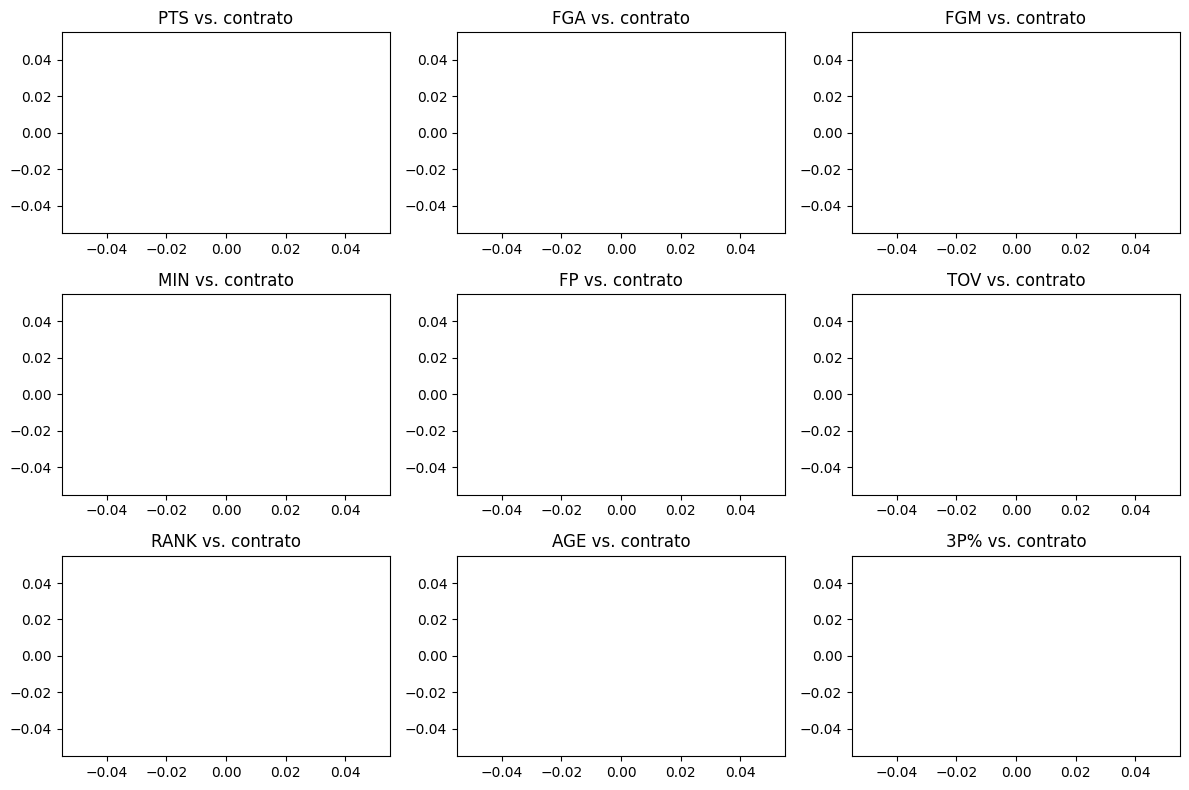

jugadora: AALIYAH EDWARDS
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN     

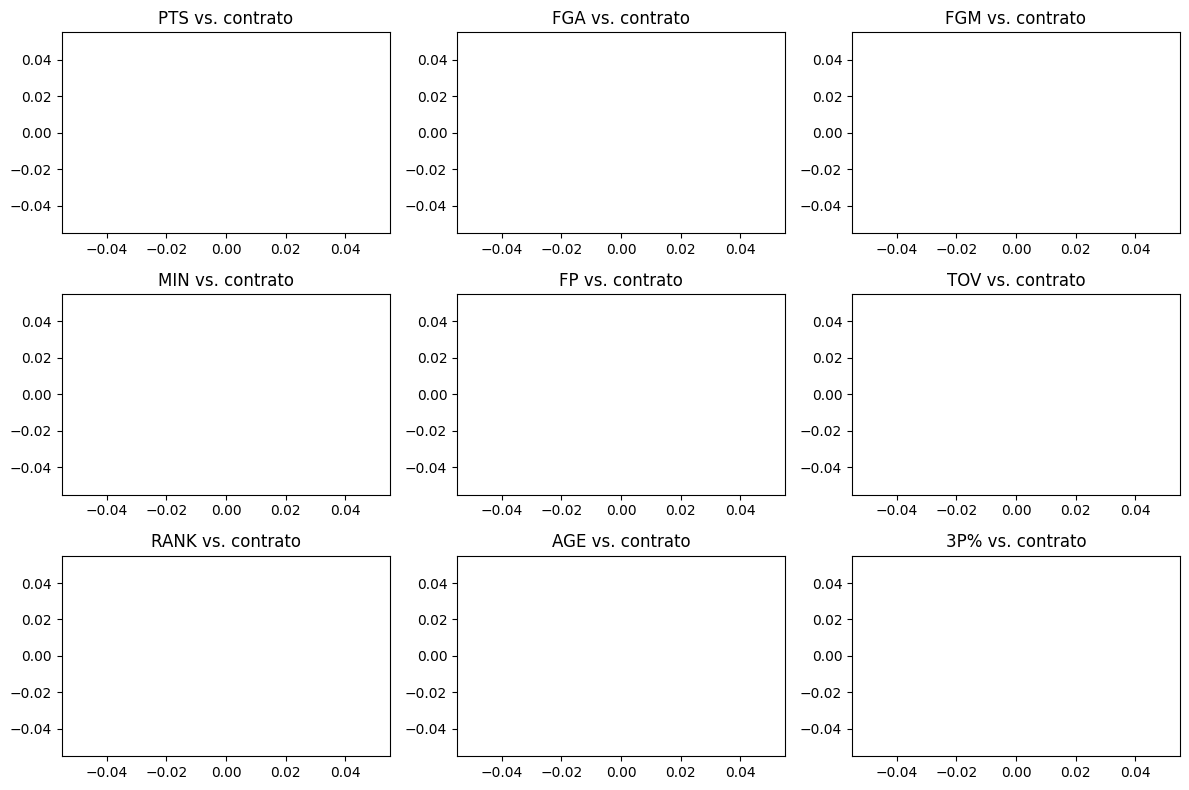

jugadora: ALISSA PILI
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN         

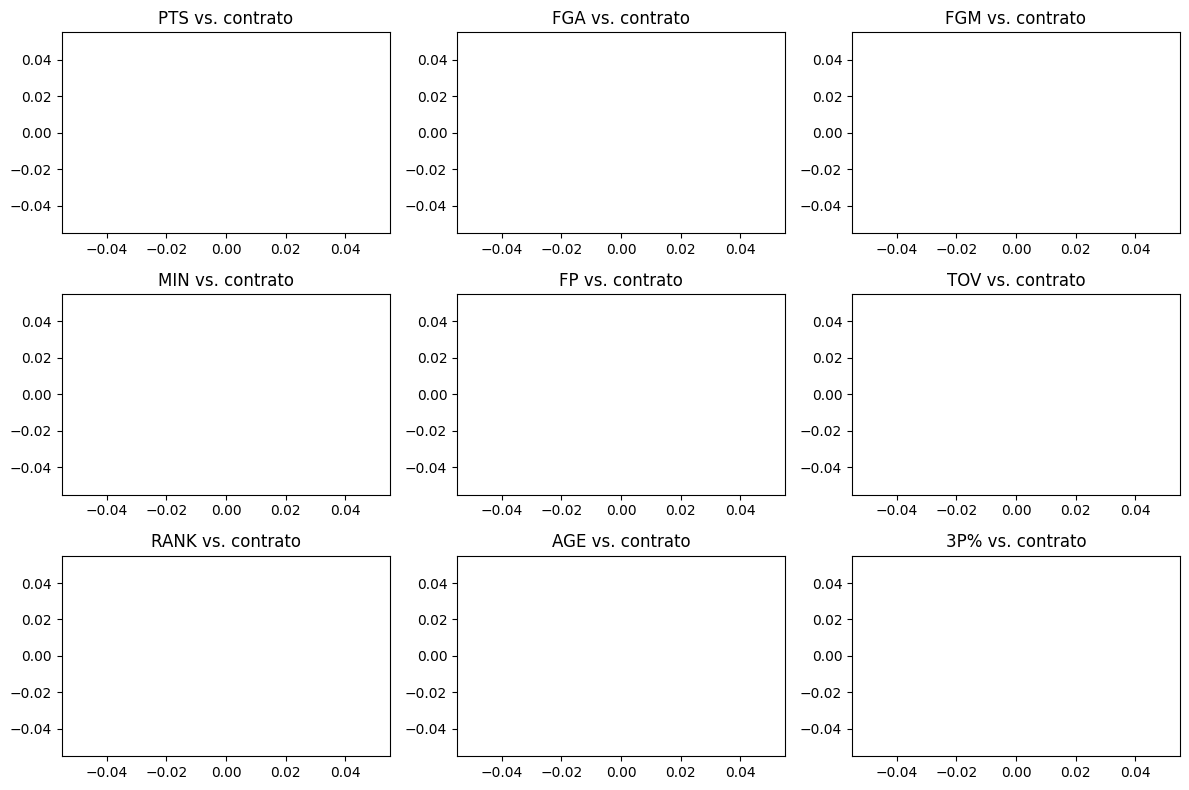

jugadora: ANGEL REESE
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN         

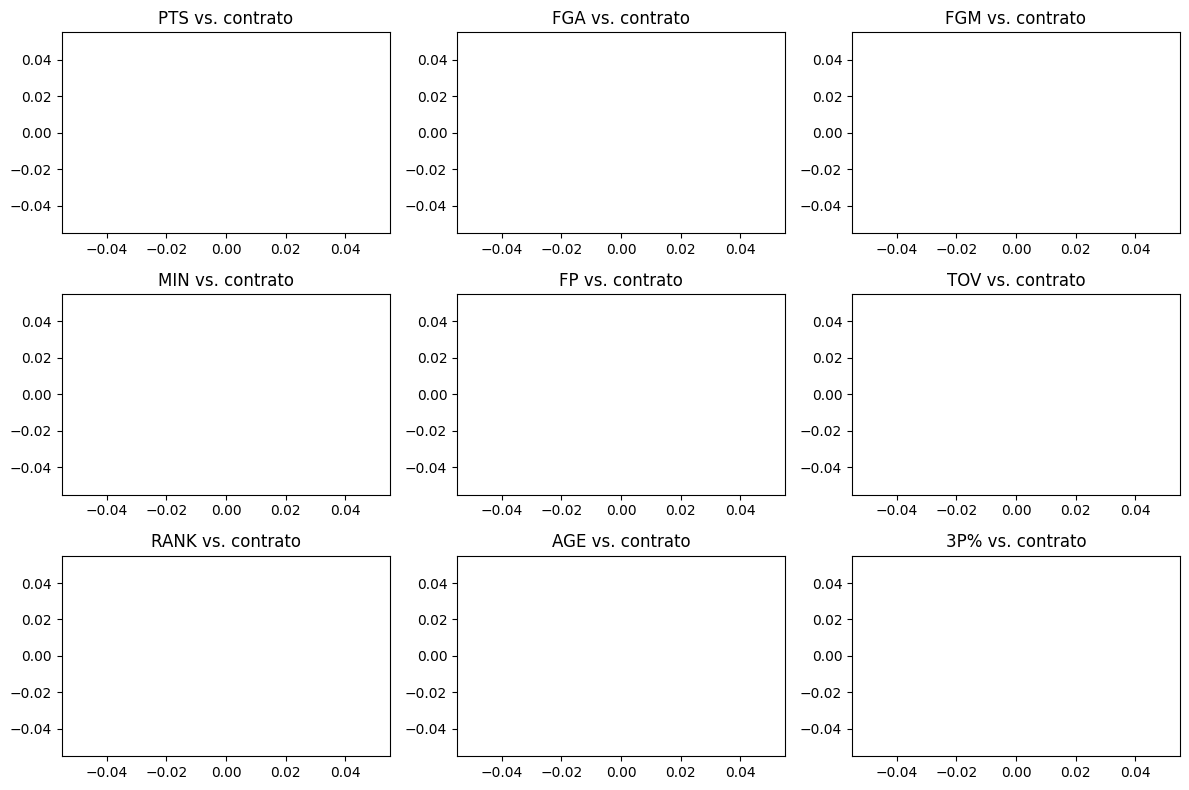

jugadora: JACY SHELDON
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN        

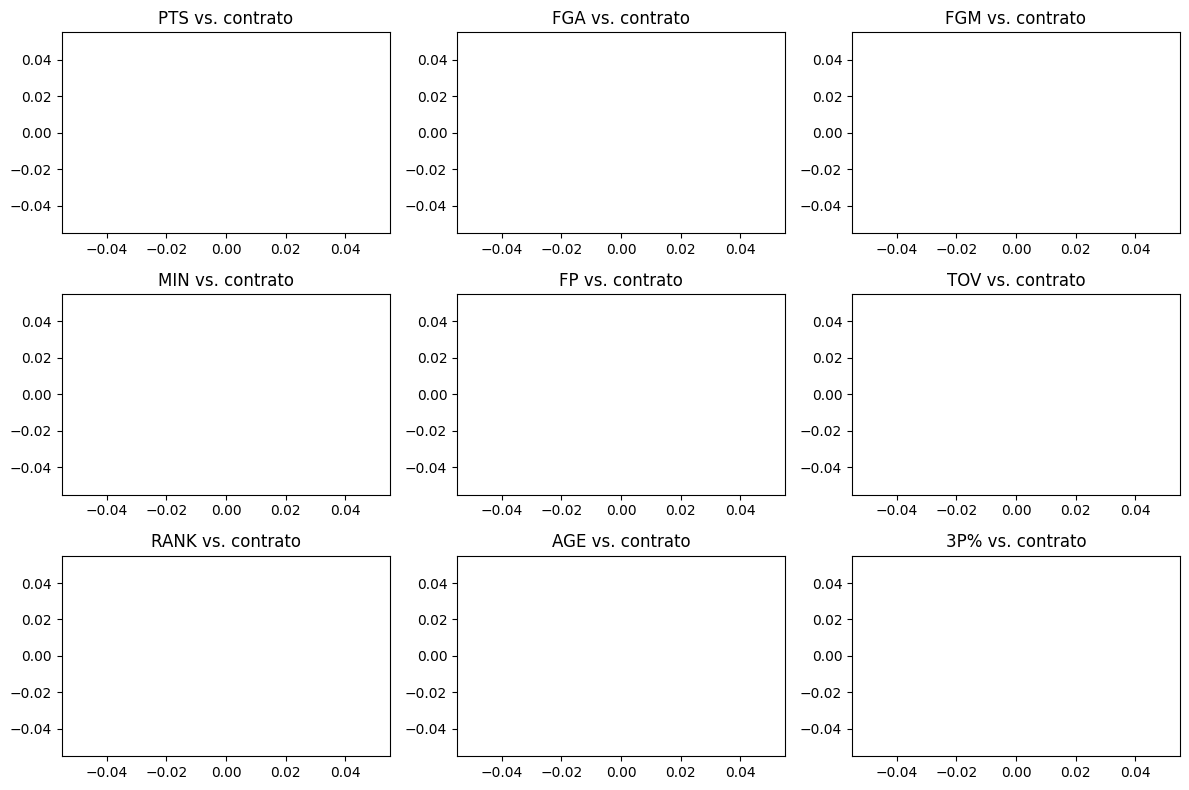

jugadora: ISABELLE HARRISON
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN   

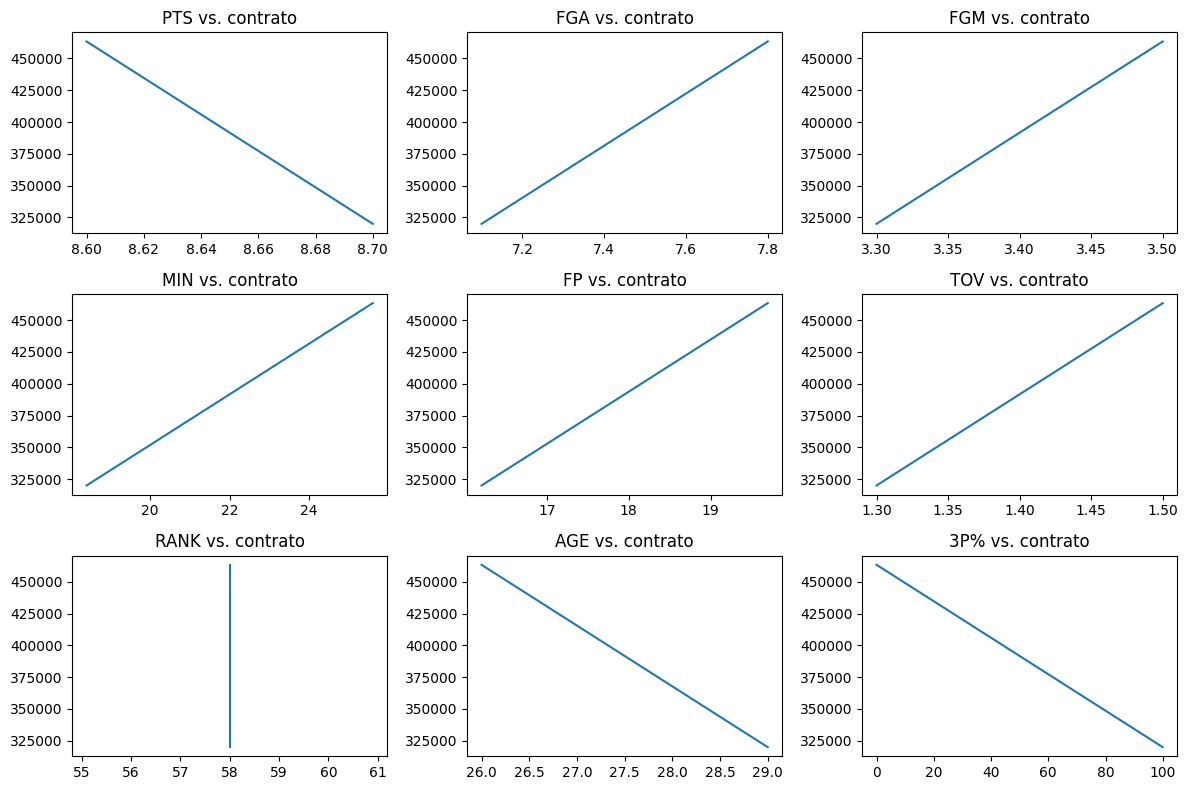

jugadora: REBECCA ALLEN
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN       

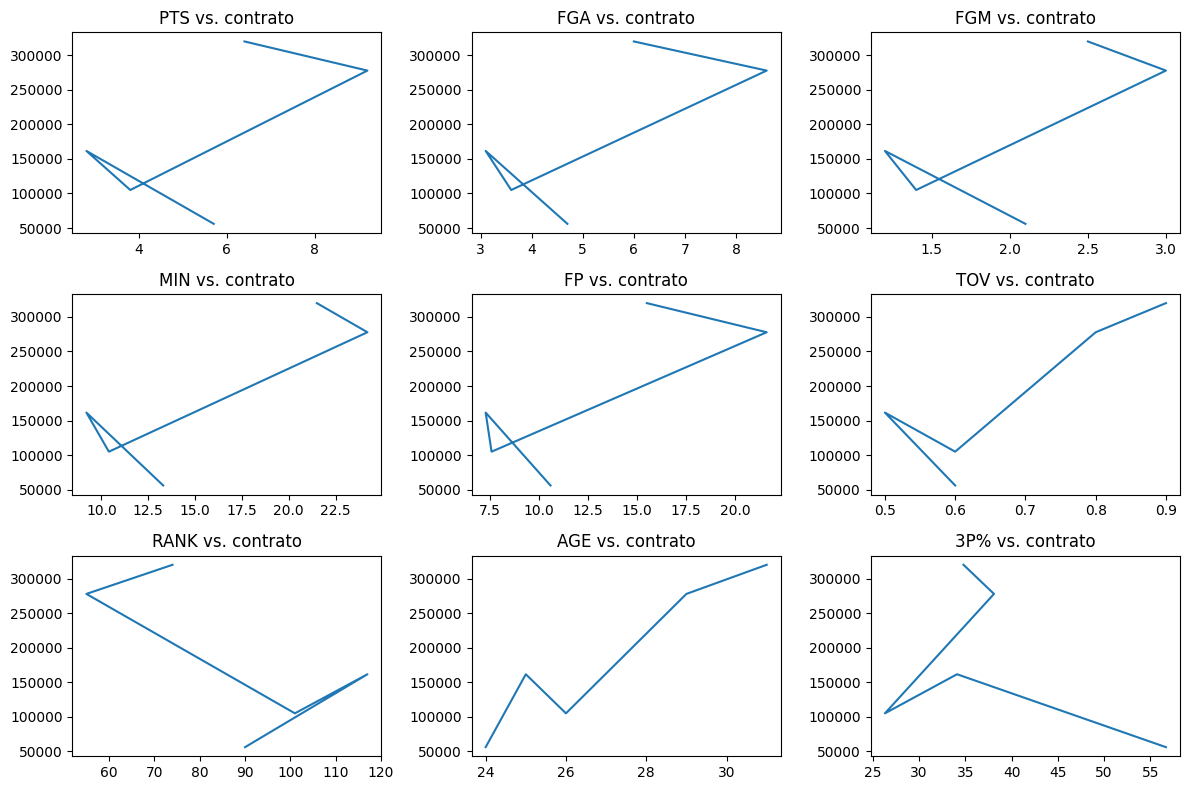

jugadora: EZI MAGBEGOR
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN        

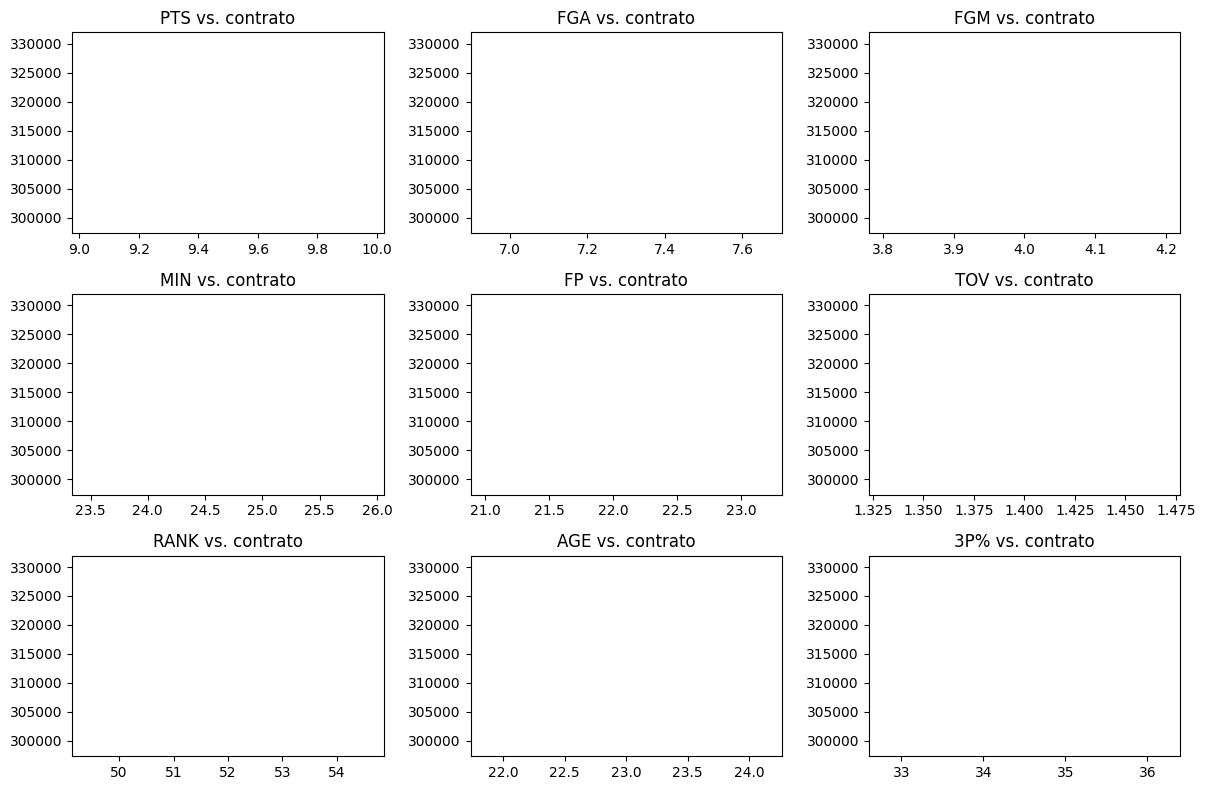

jugadora: MARQUESHA DAVIS
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN     

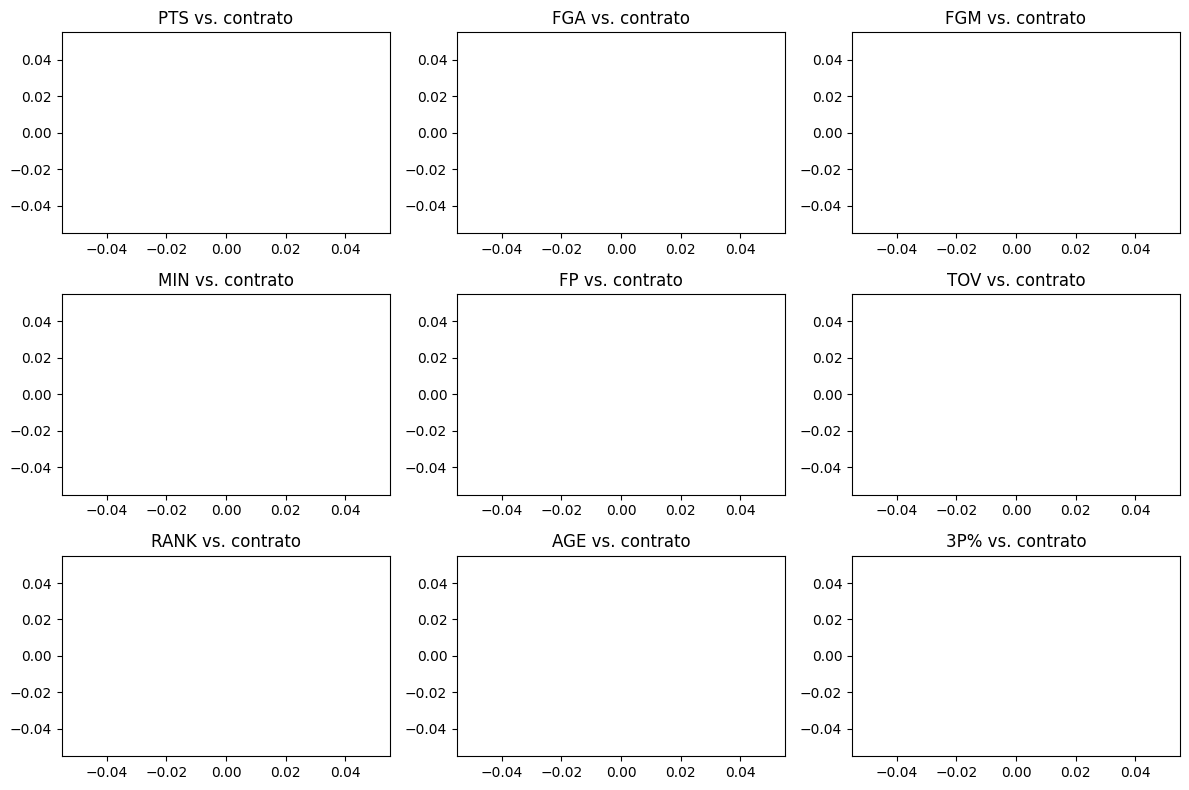

jugadora: SOPHIE CUNNINGHAM
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN   

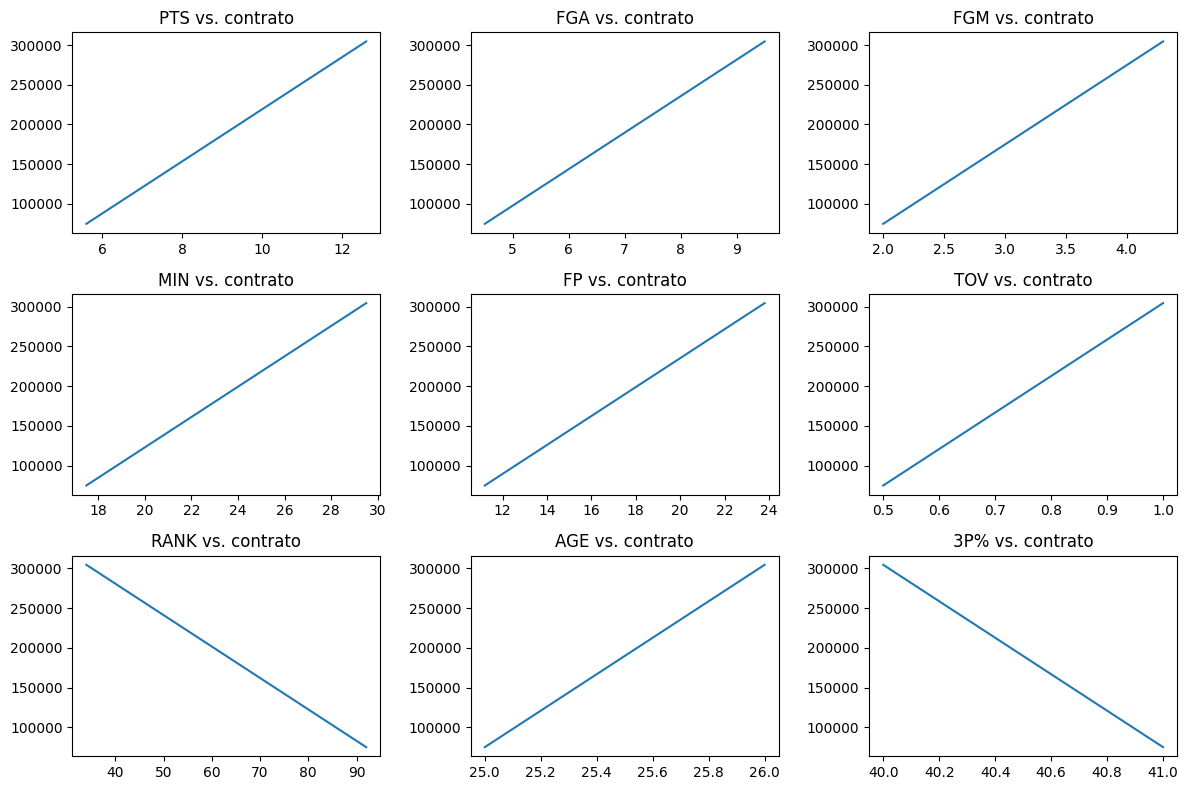

jugadora: ALANNA SMITH
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN        

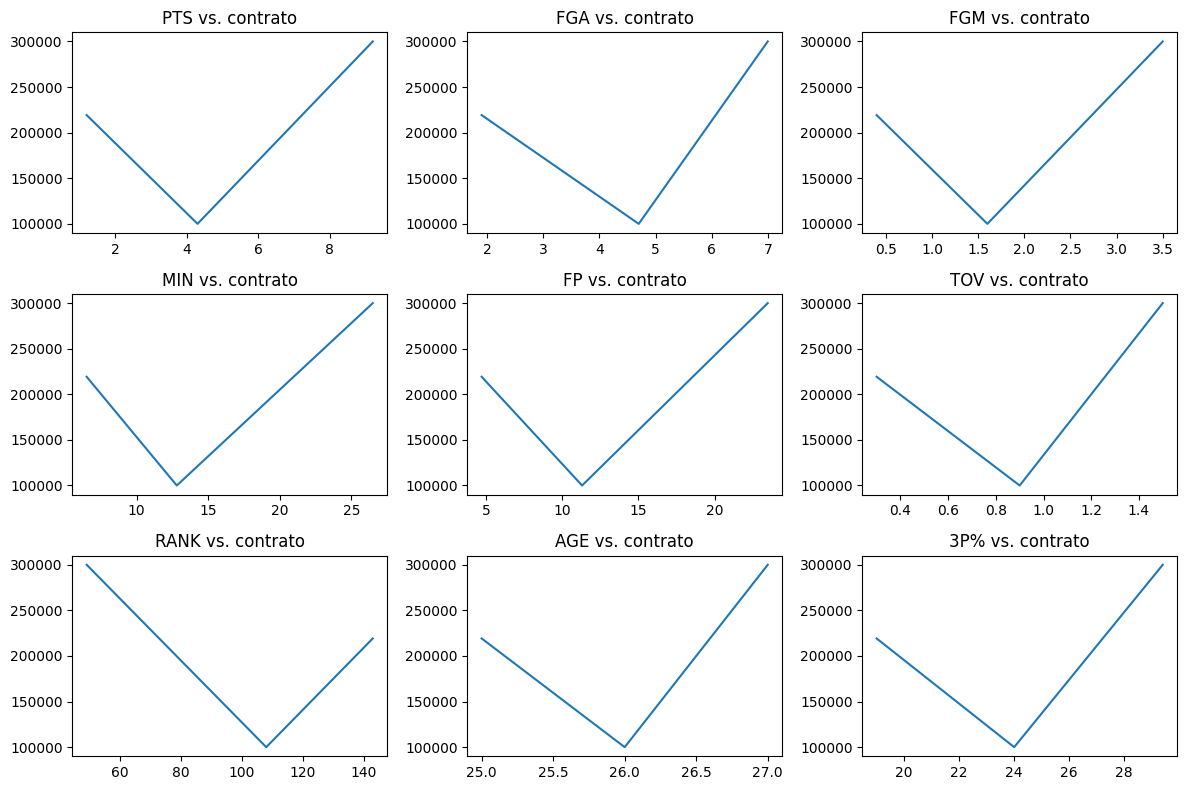

jugadora: BRIANNA TURNER
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN      

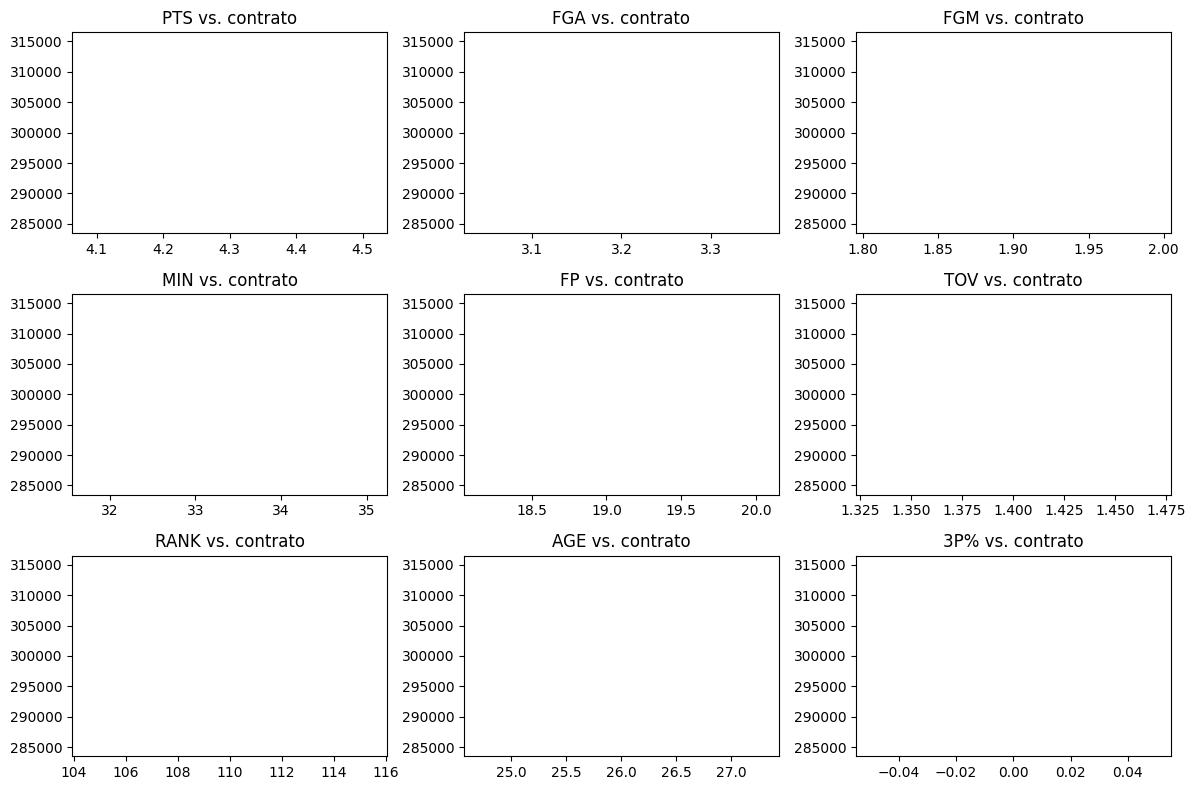

jugadora: NIA COFFEY
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN         N

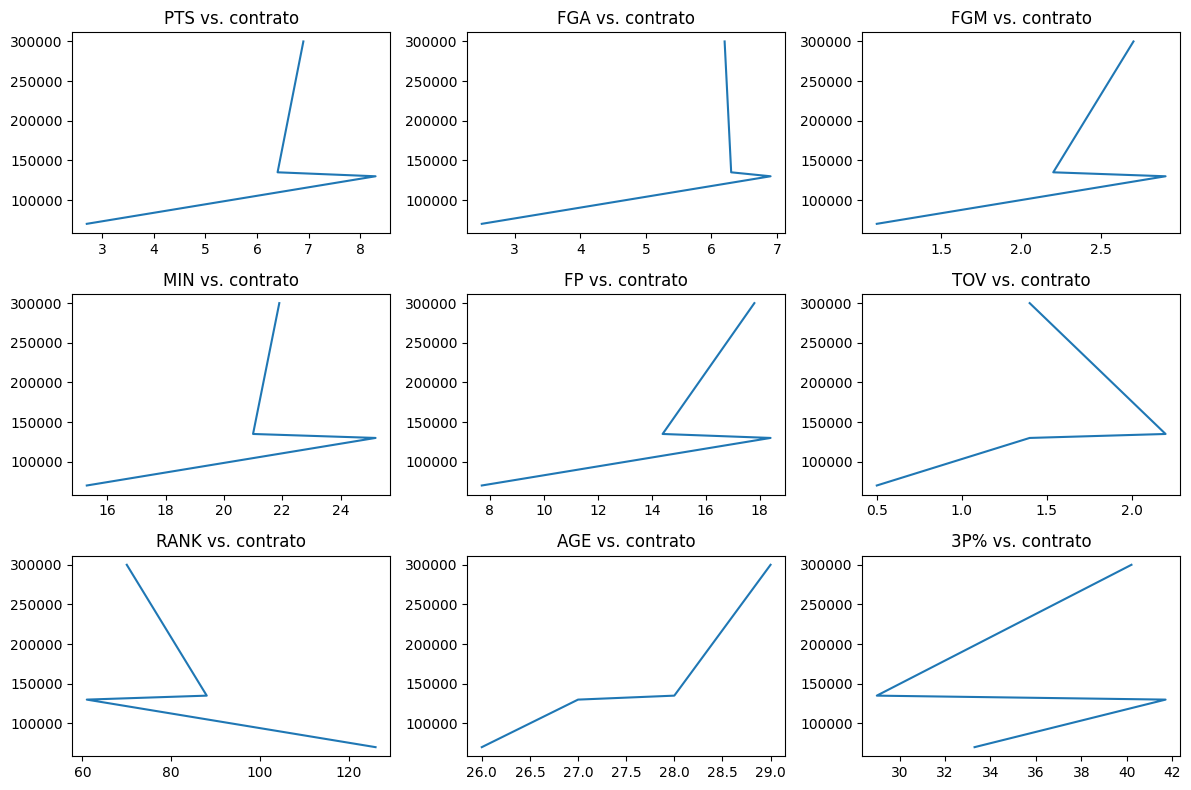

jugadora: KATE MARTIN
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN         

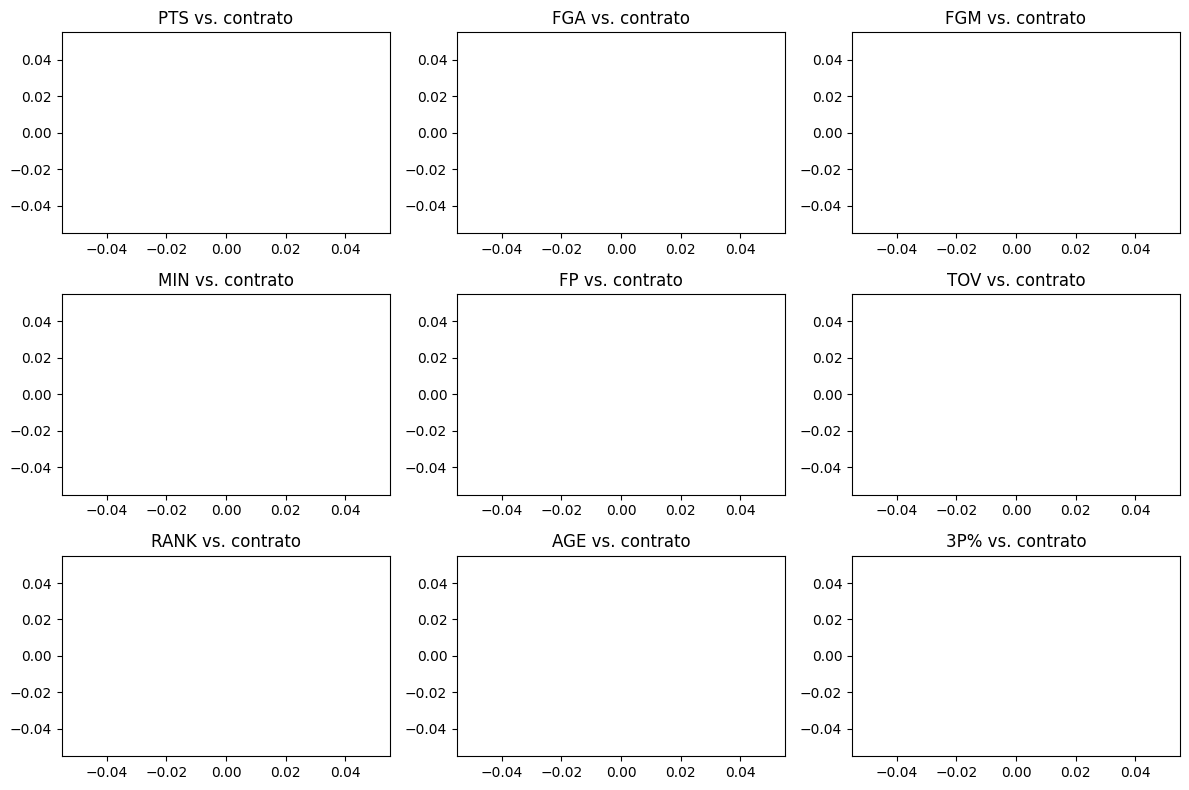

jugadora: LEONIE FIEBICH
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN      

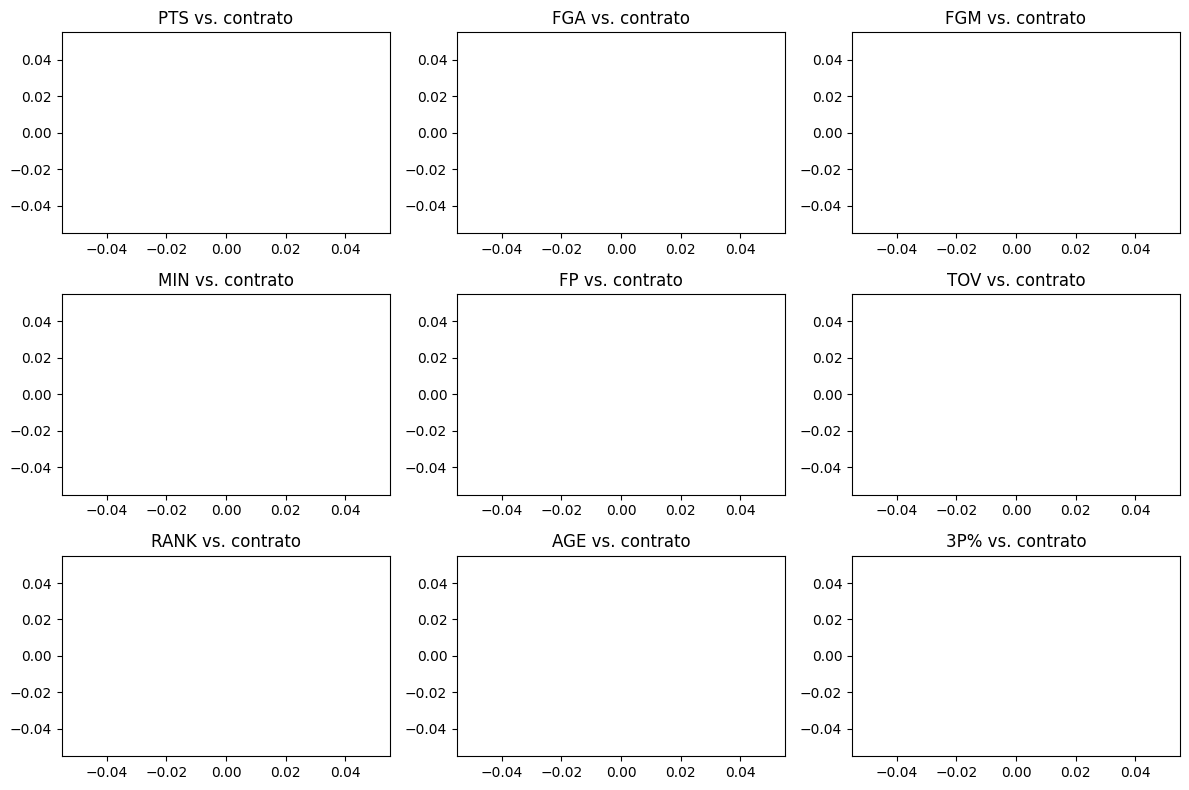

jugadora: NIKA MÜHL
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN         Na

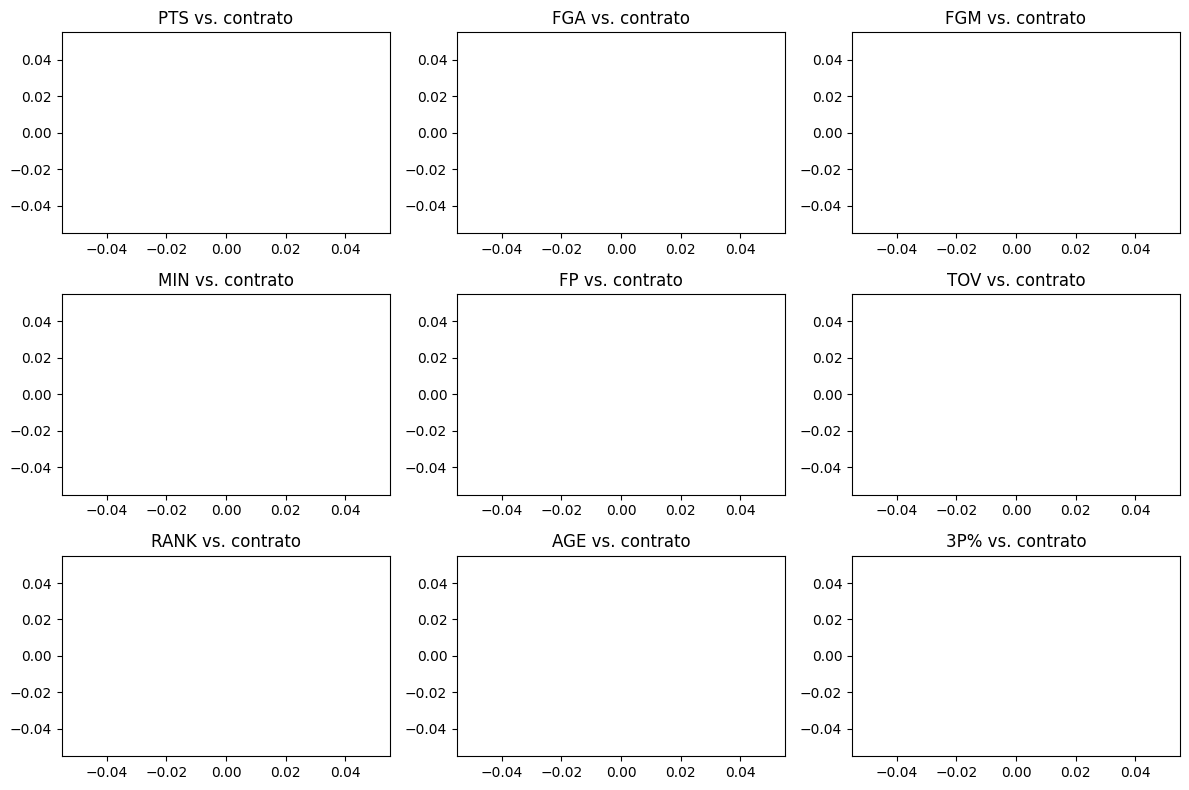

jugadora: SAMI WHITCOMB
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN       

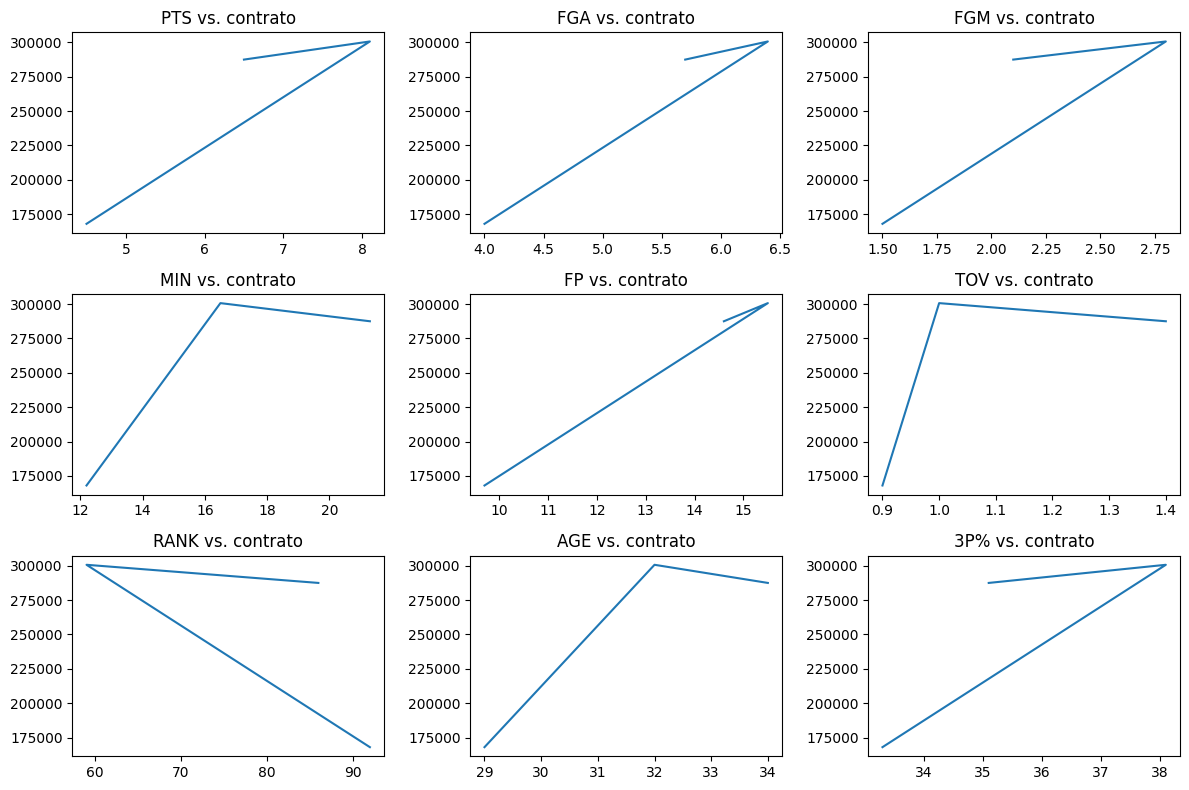

jugadora: KIA NURSE
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN         Na

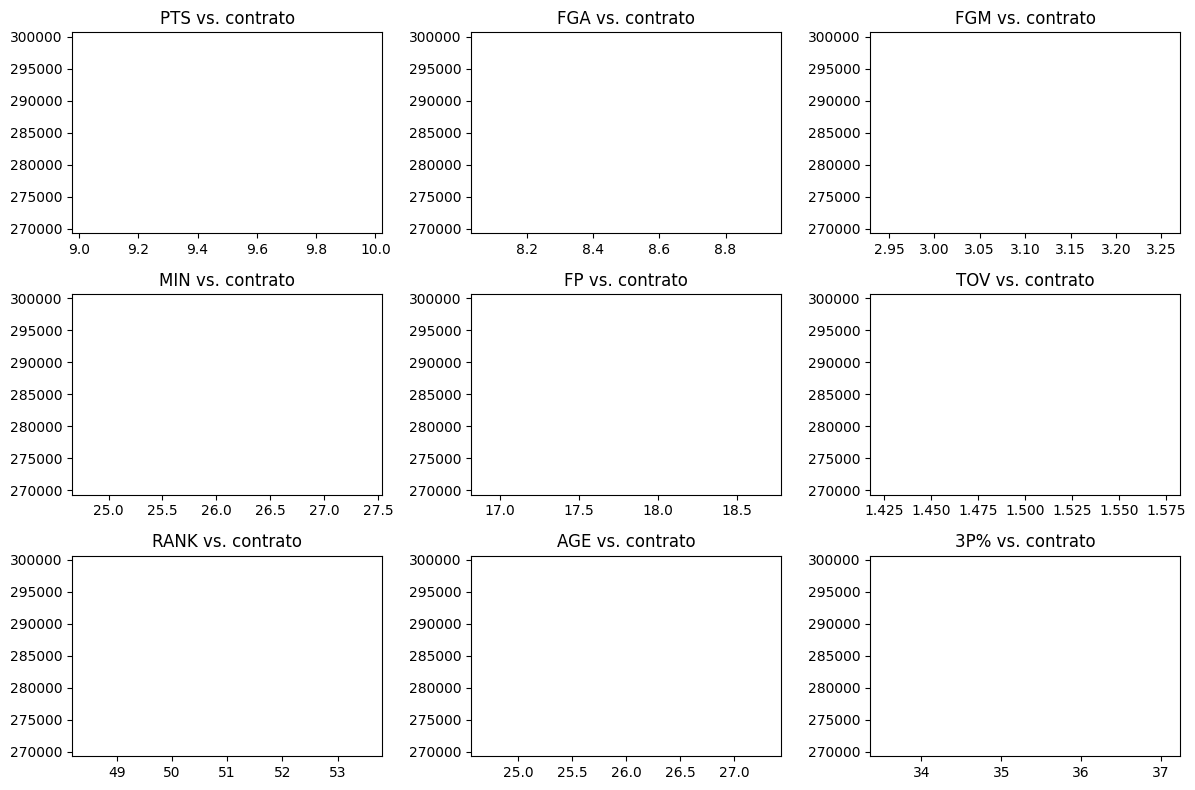

jugadora: TIFFANY MITCHELL
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN    

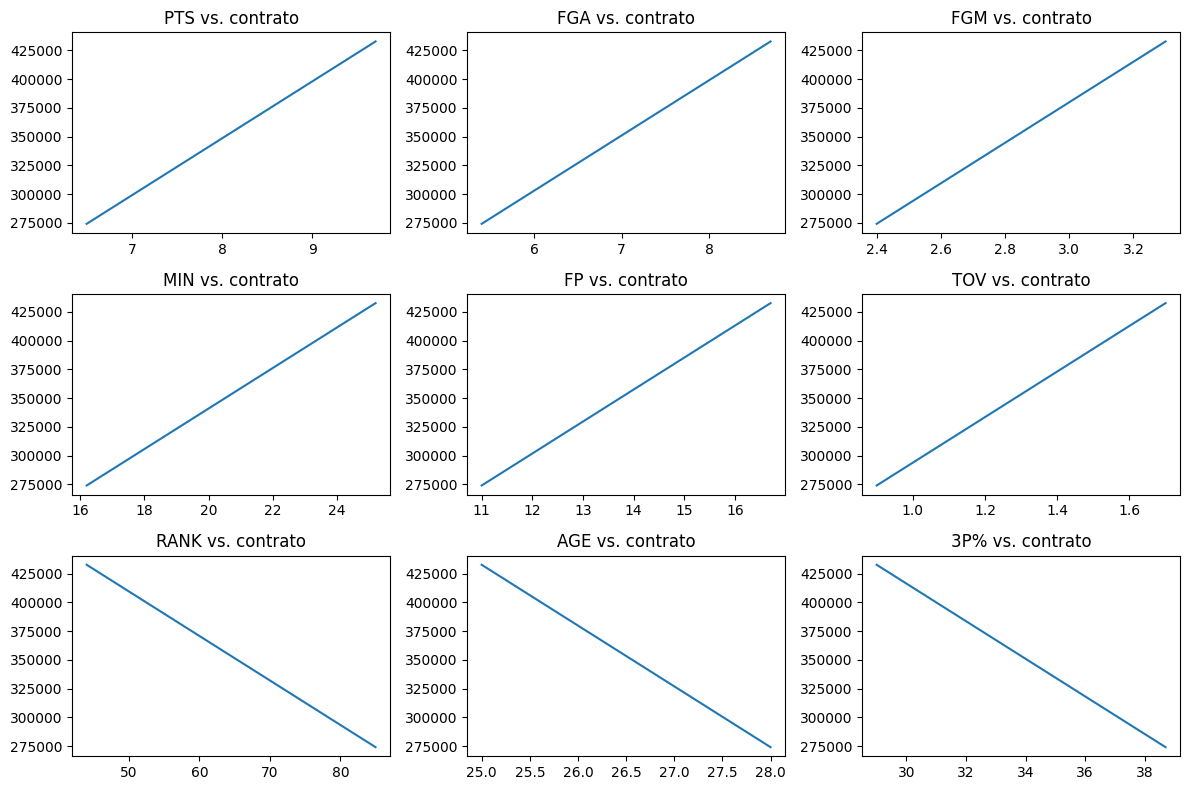

jugadora: ELIZABETH WILLIAMS
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN  

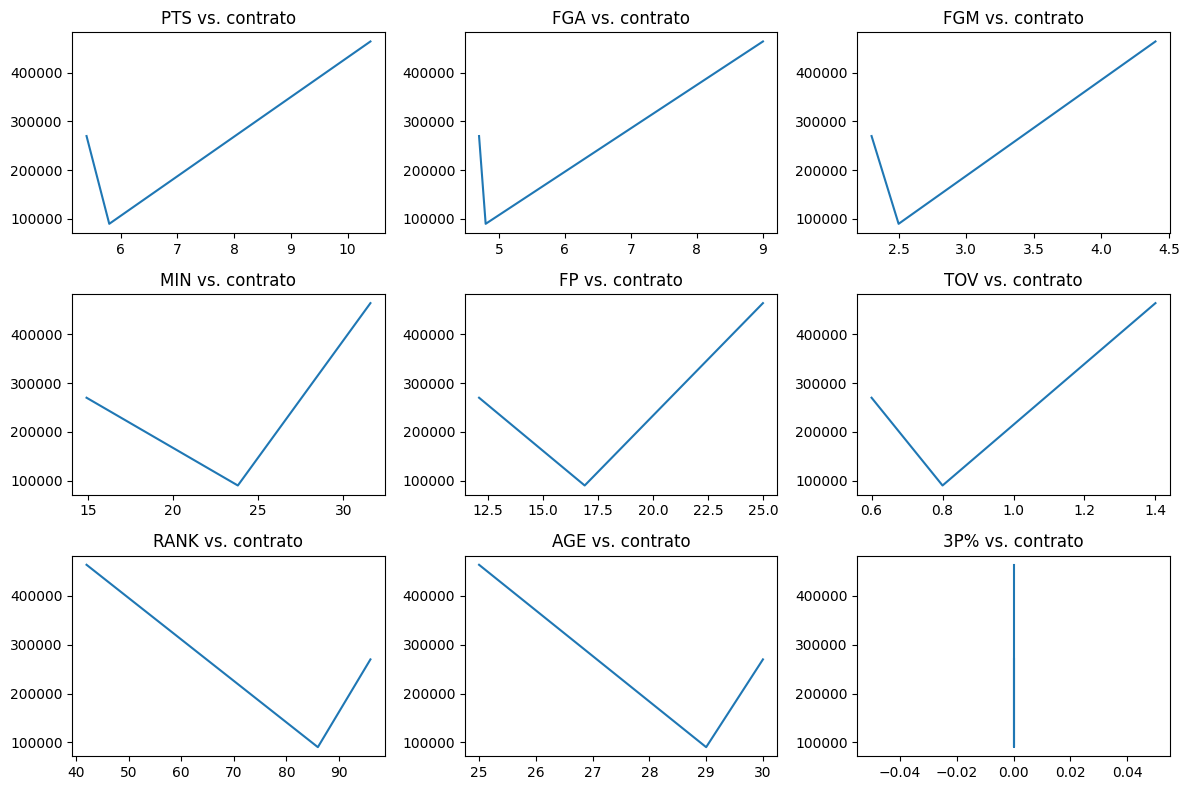

jugadora: JADE MELBOURNE
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN      

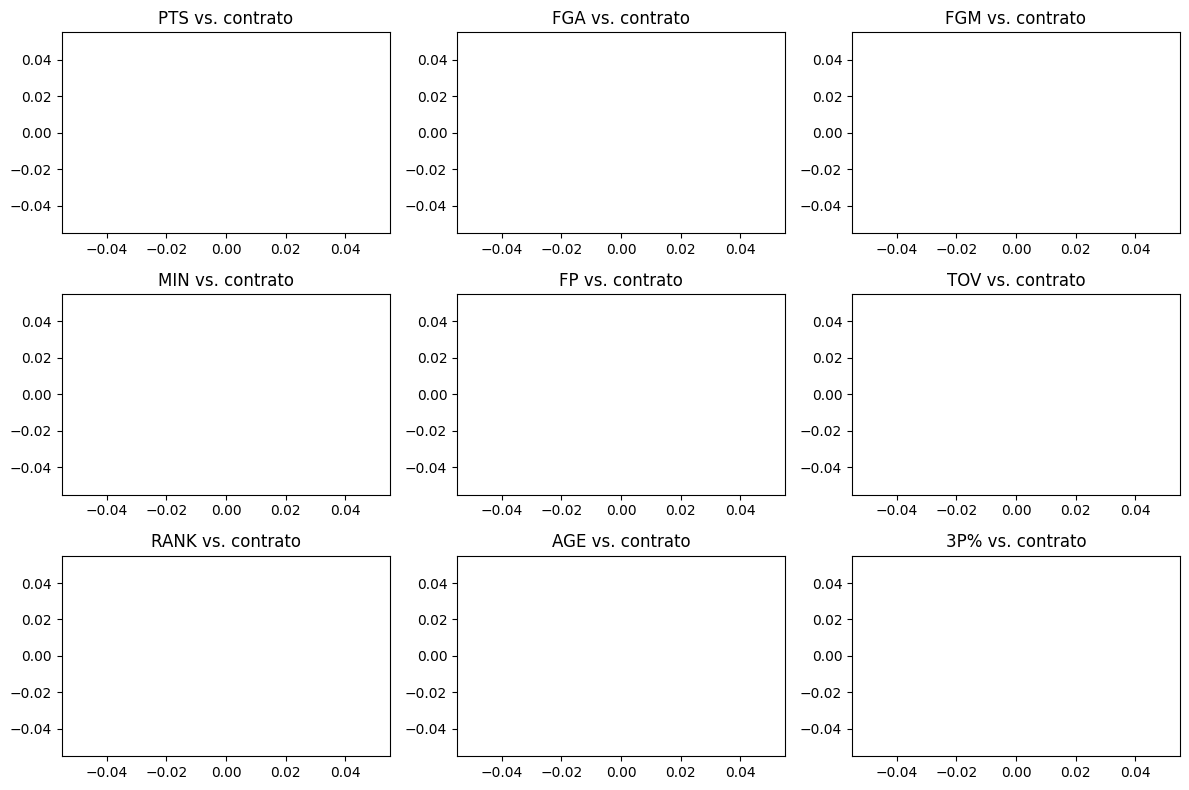

jugadora: BRIDGET CARLETON
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN    

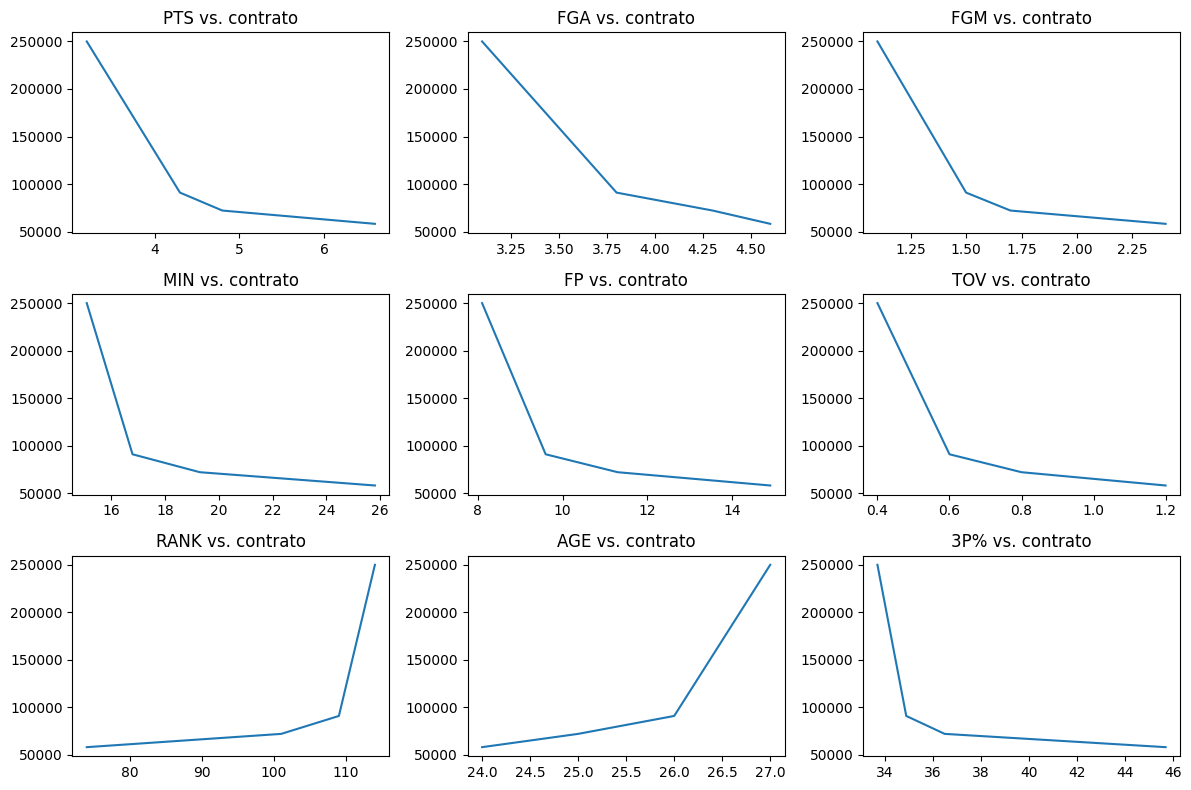

jugadora: RAE BURRELL
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN         

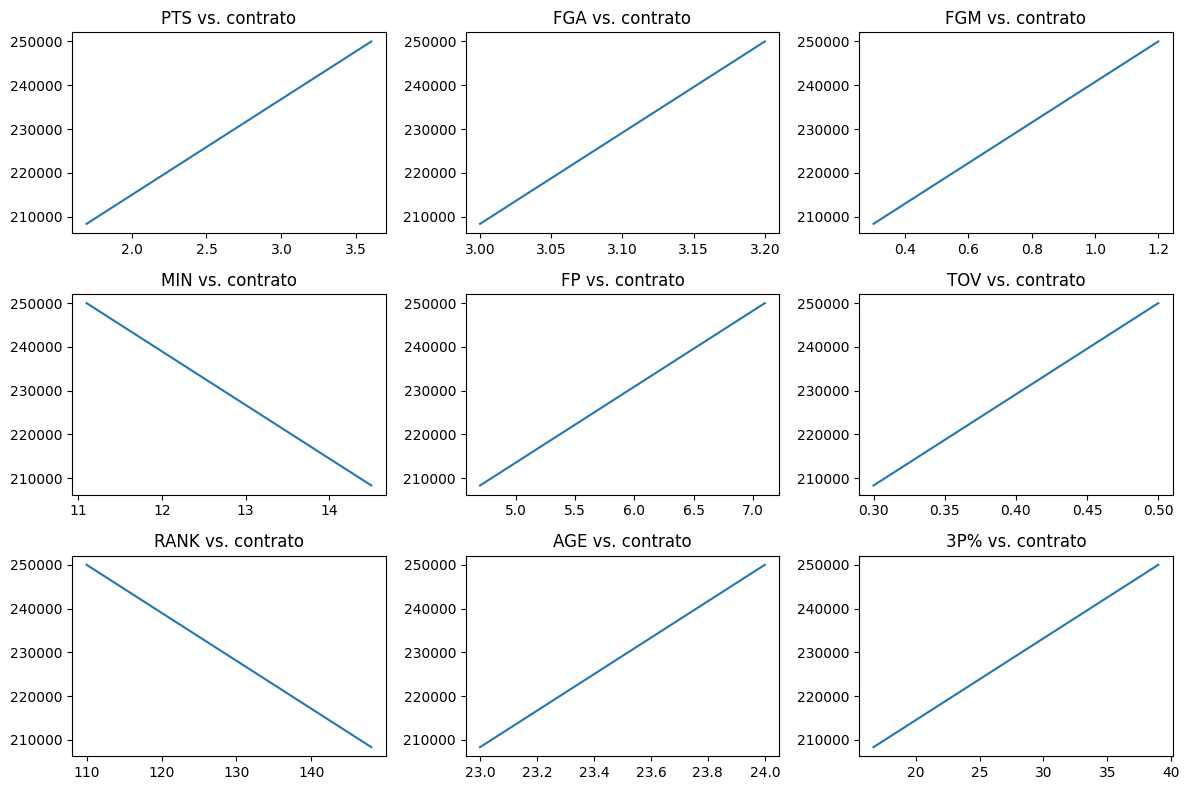

jugadora: JESSICA SHEPARD
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN     

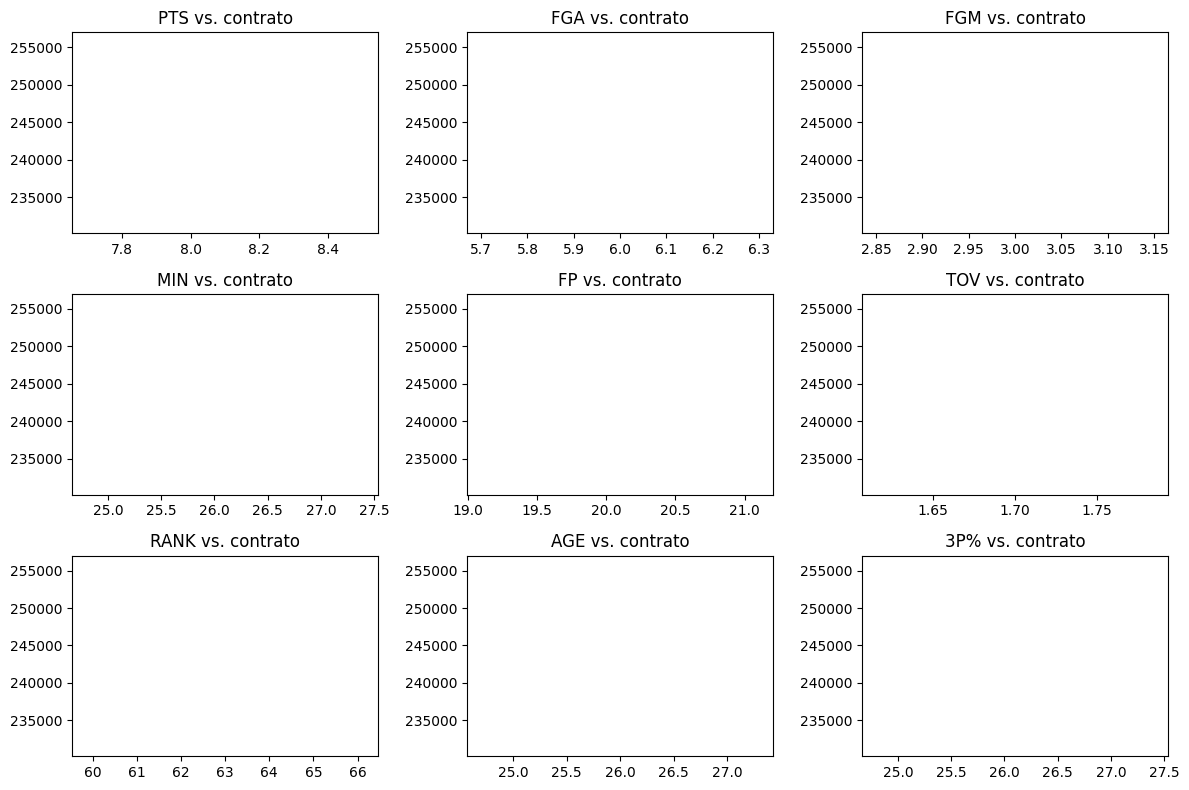

jugadora: NATISHA HIEDEMAN
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN    

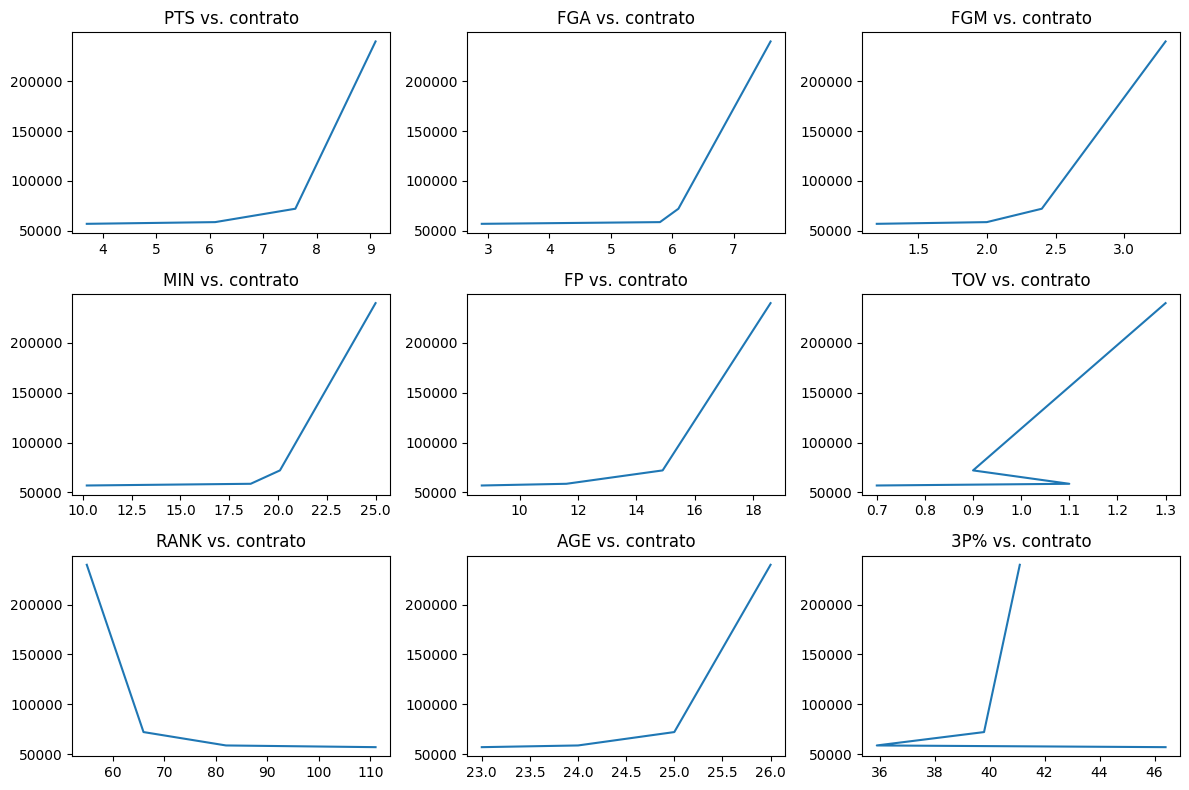

jugadora: ALIYAH BOSTON
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN       

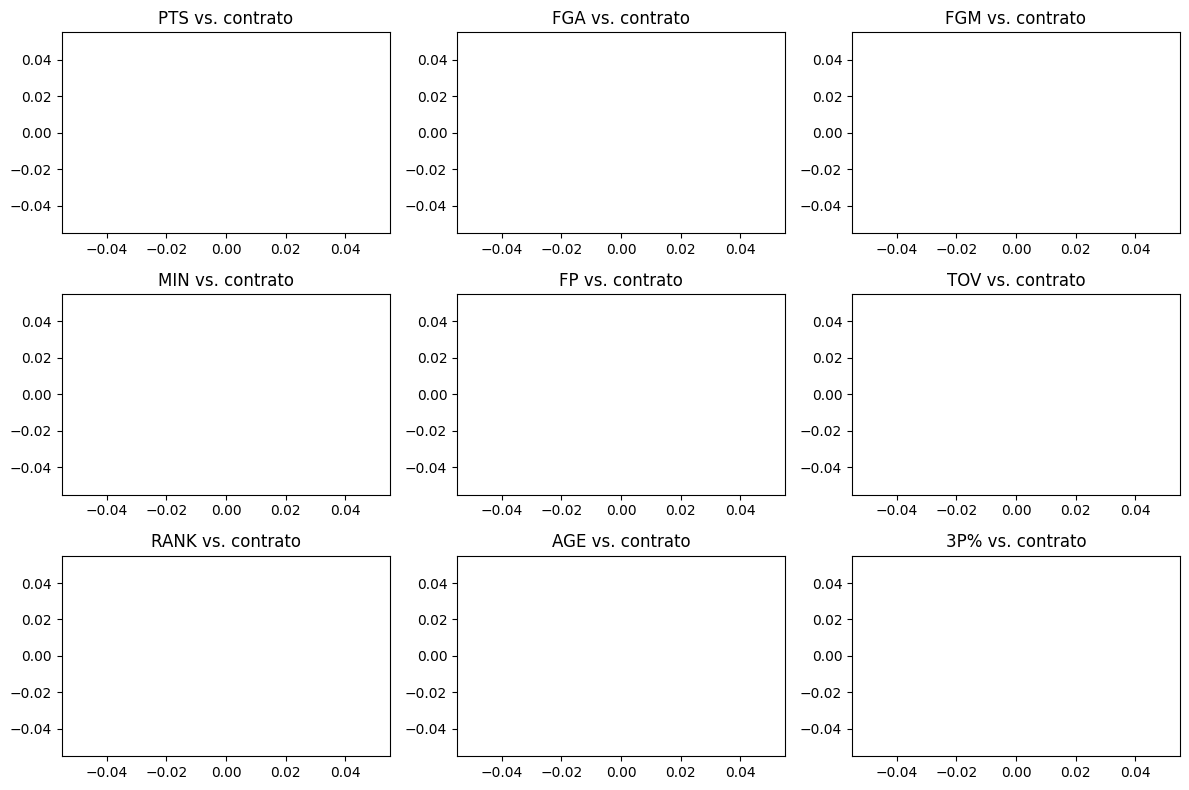

jugadora: DIAMOND MILLER
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN      

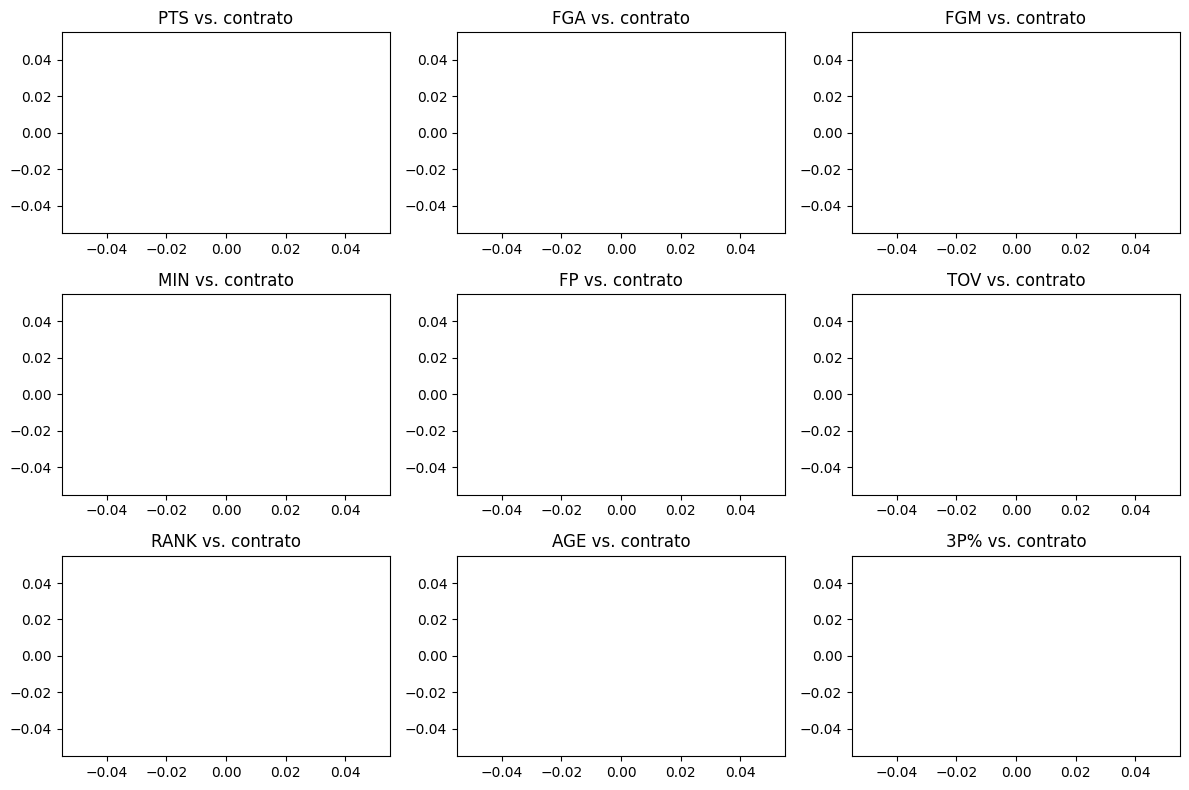

jugadora: MADDY SIEGRIST
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN      

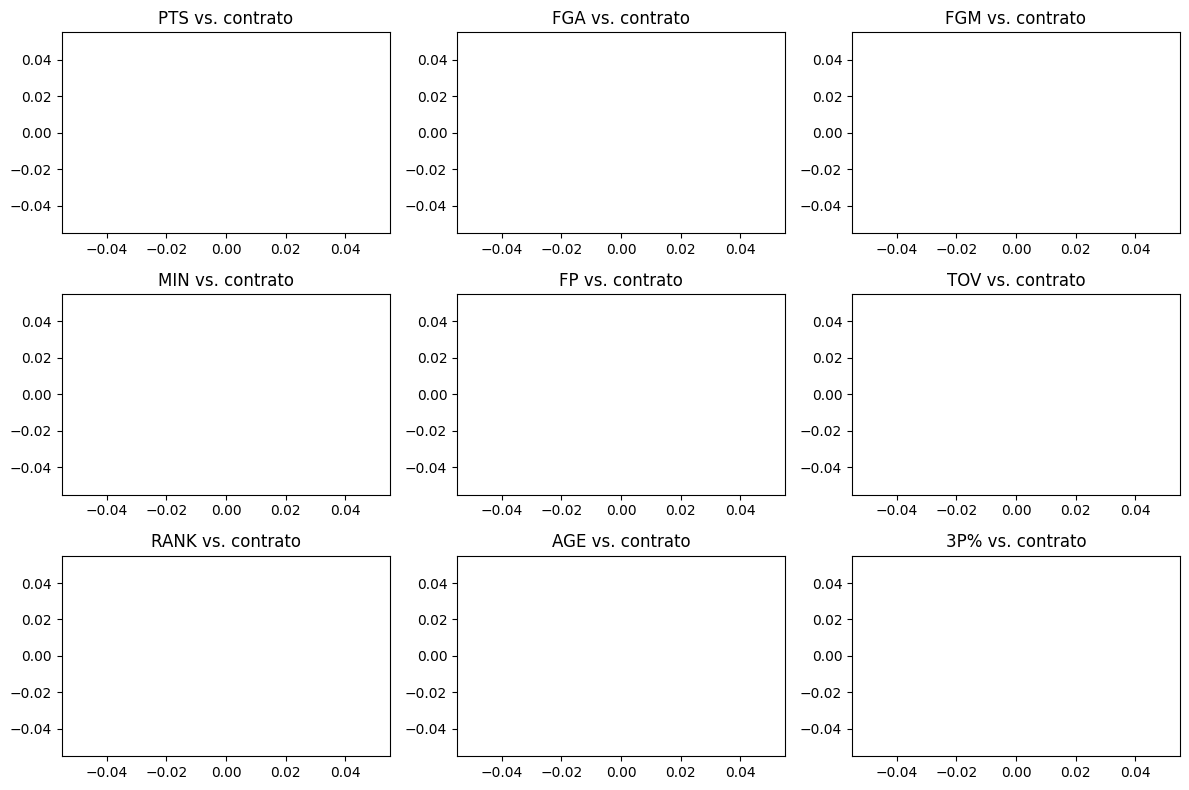

jugadora: KARLIE SAMUELSON
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN    

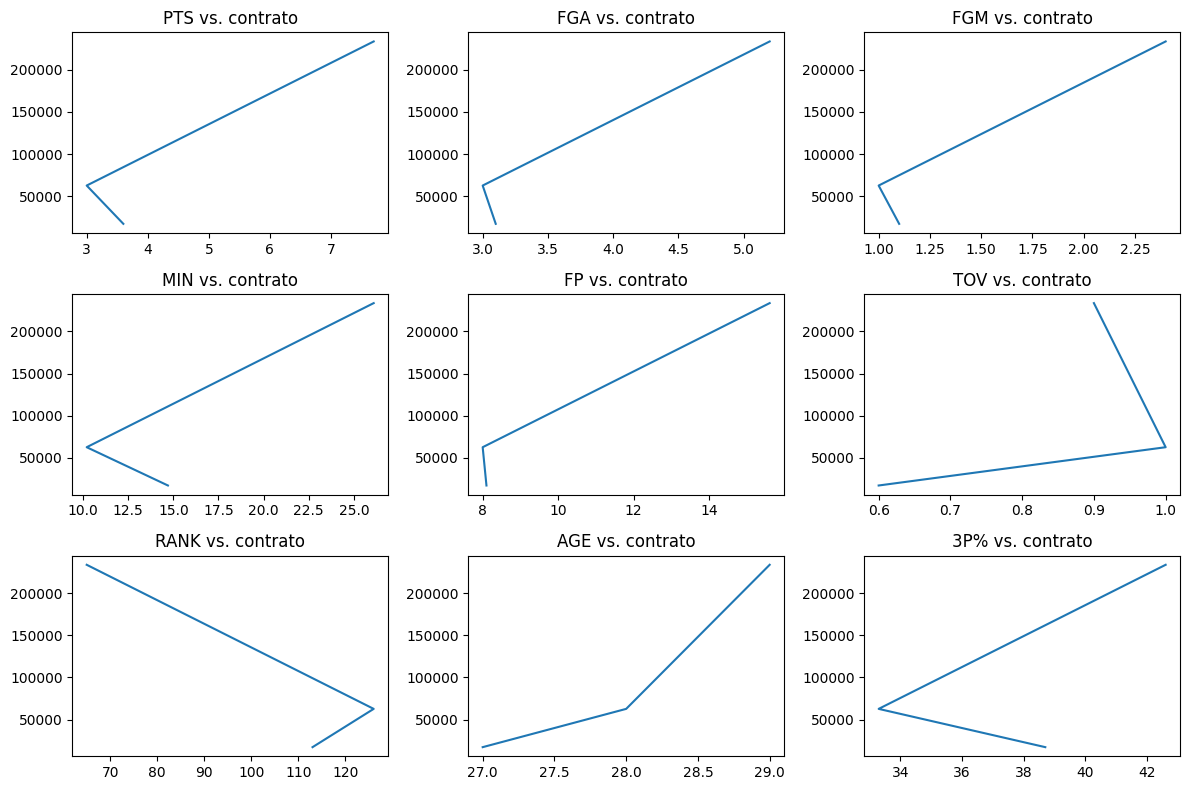

jugadora: STEPHANIE TALBOT
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN    

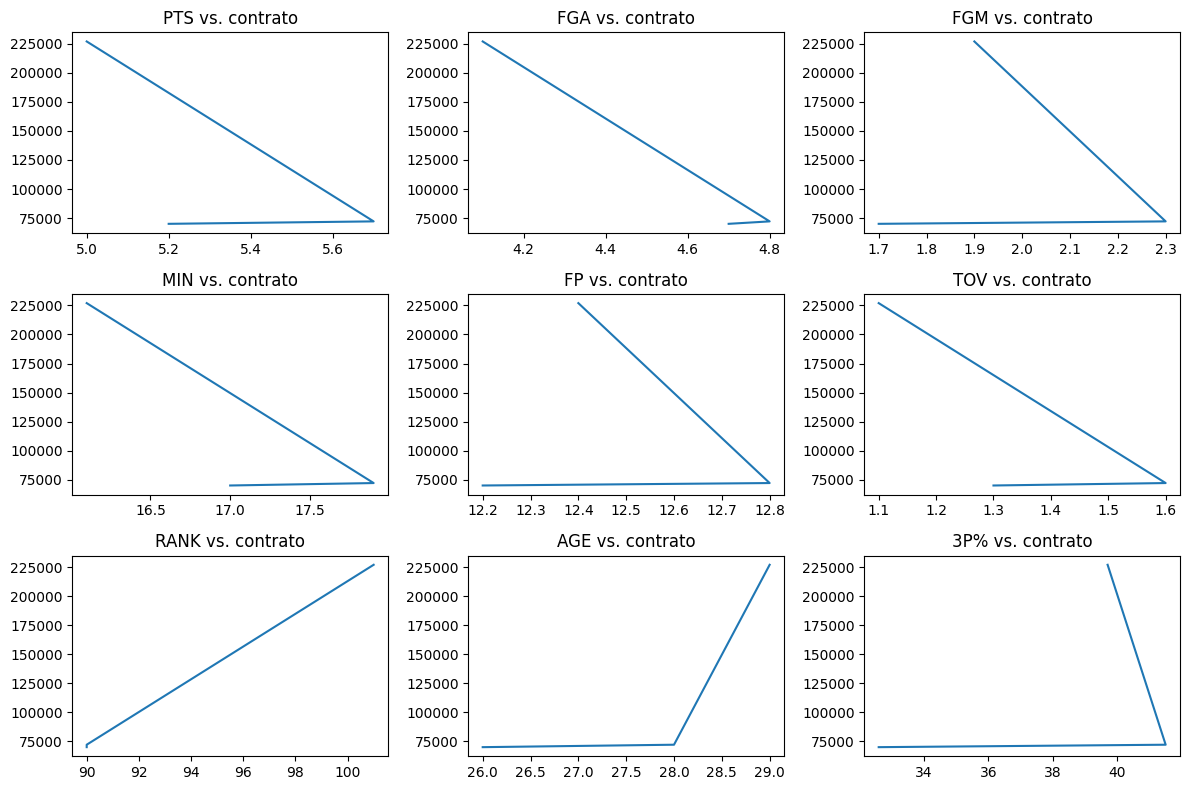

jugadora: NALYSSA SMITH
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN       

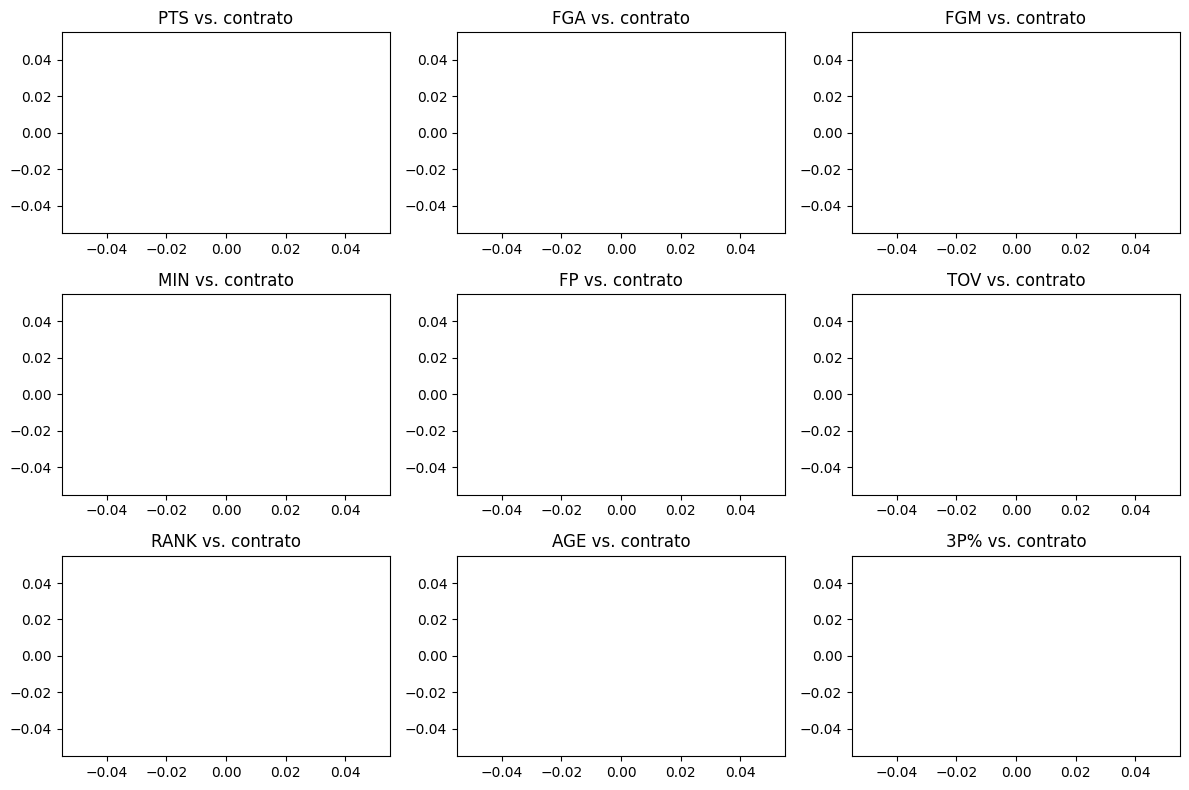

jugadora: RHYNE HOWARD
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN        

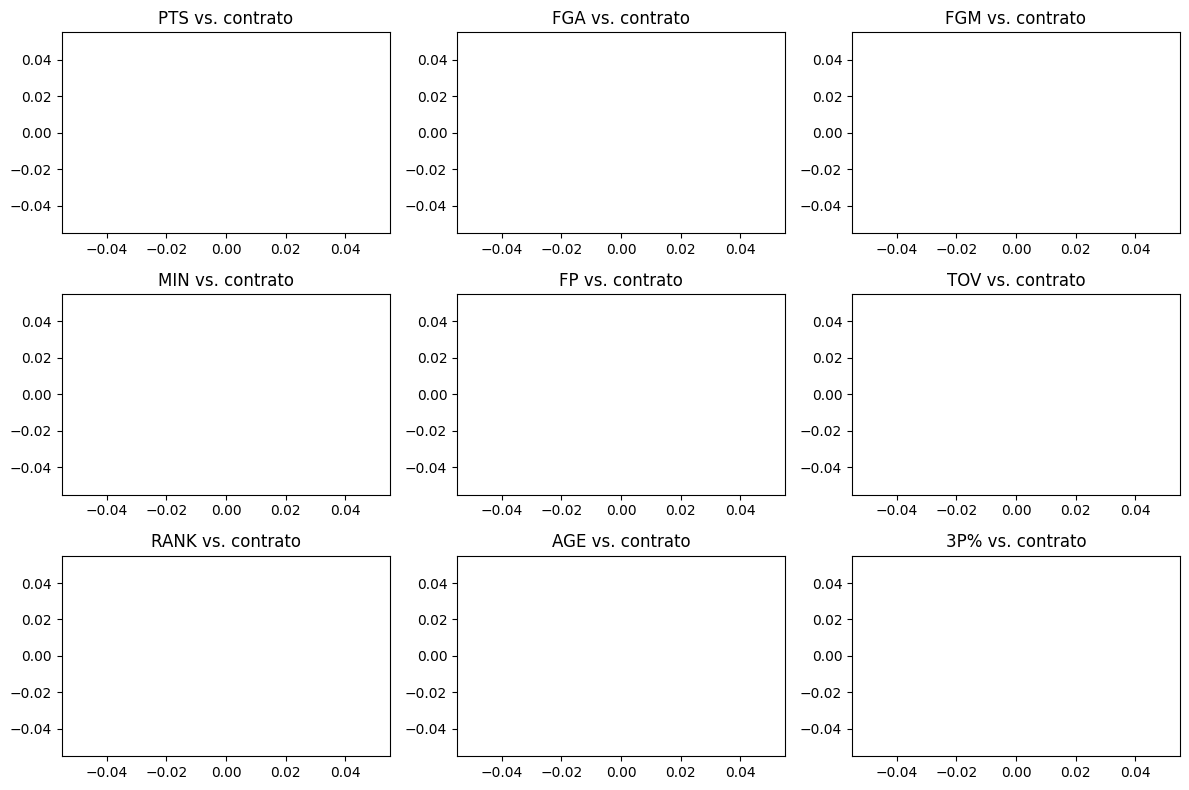

jugadora: SHAKIRA AUSTIN
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN      

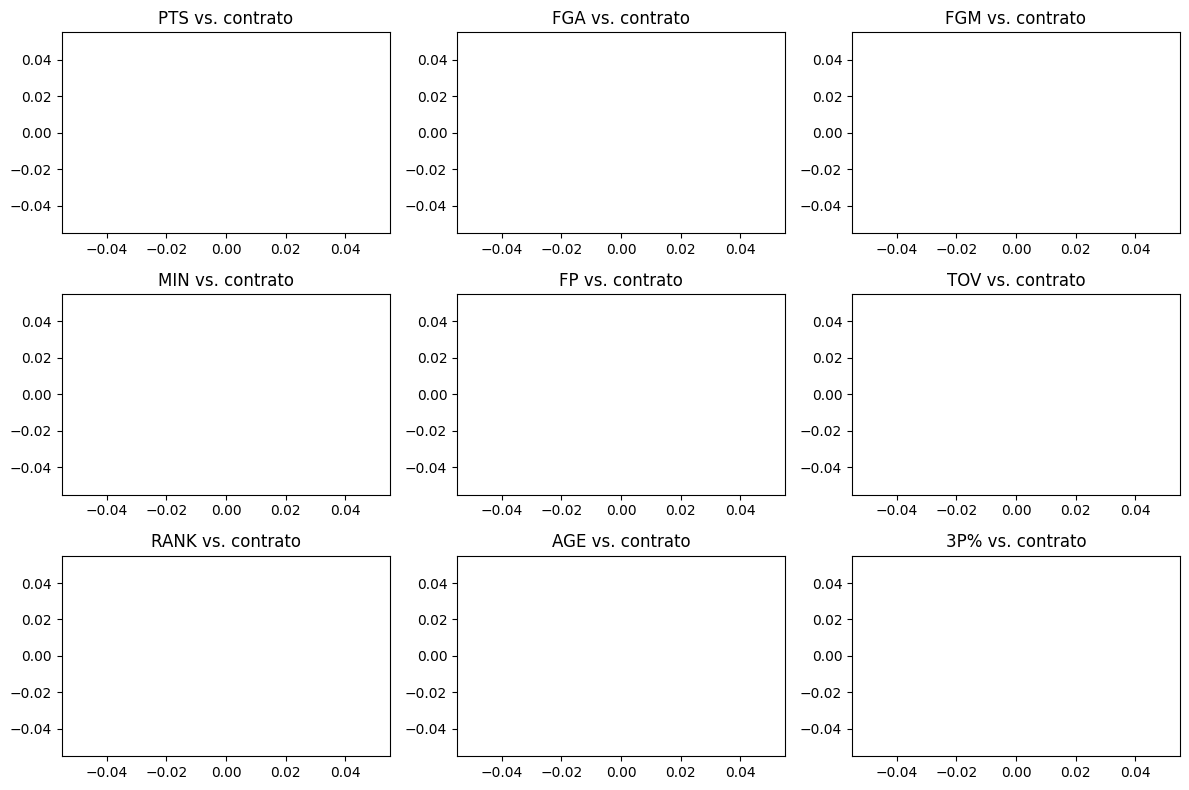

jugadora: GRACE BERGER
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN        

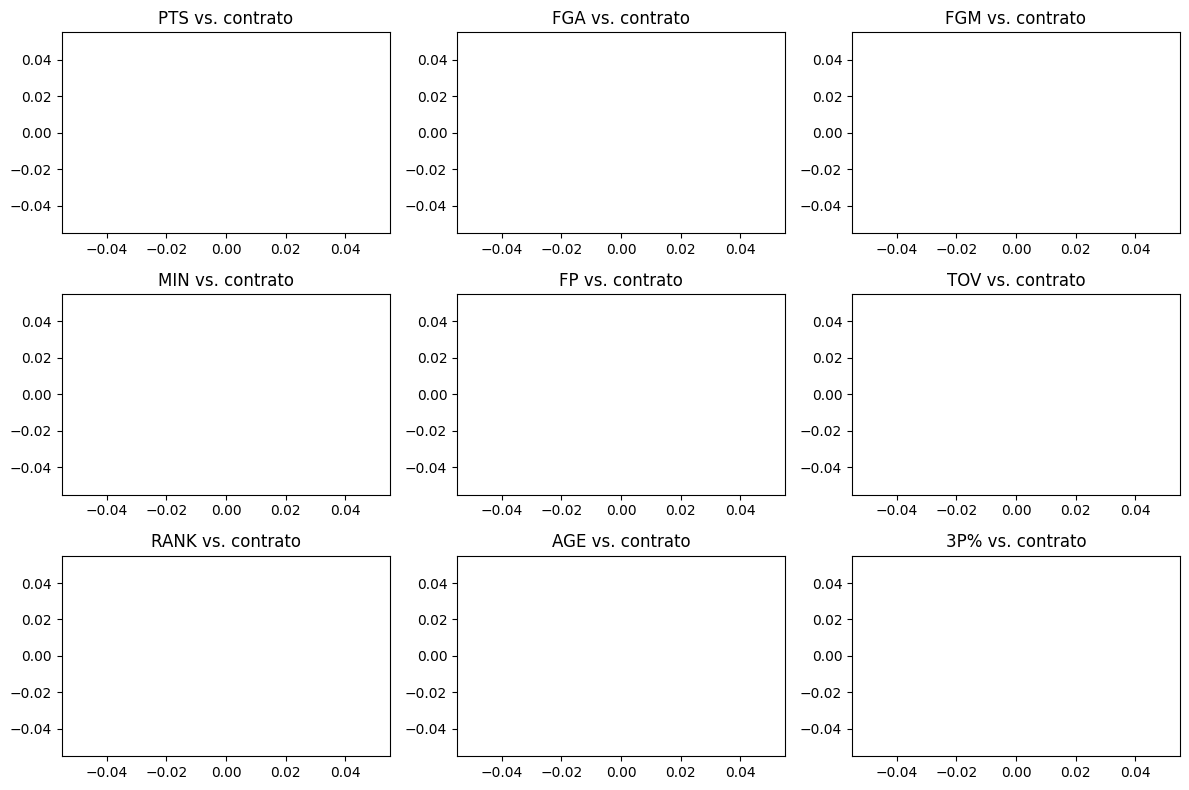

jugadora: HALEY JONES
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN         

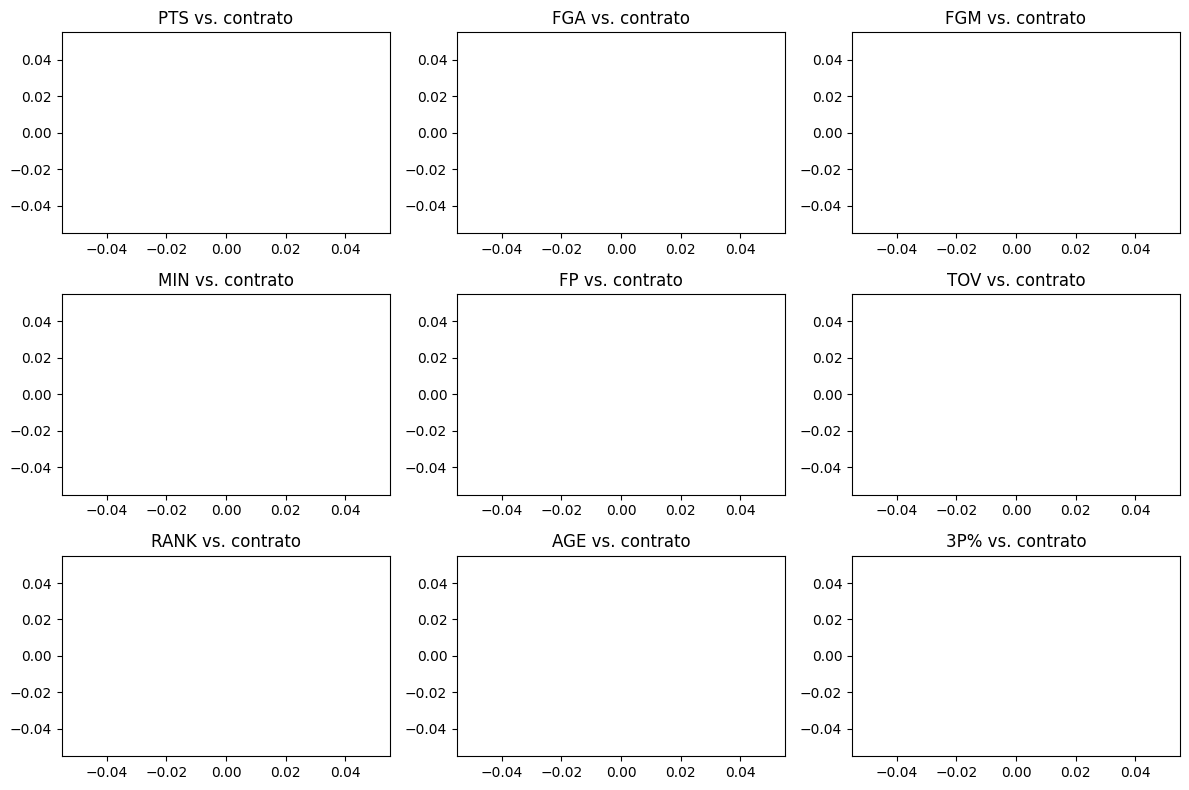

jugadora: LAETICIA AMIHERE
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN    

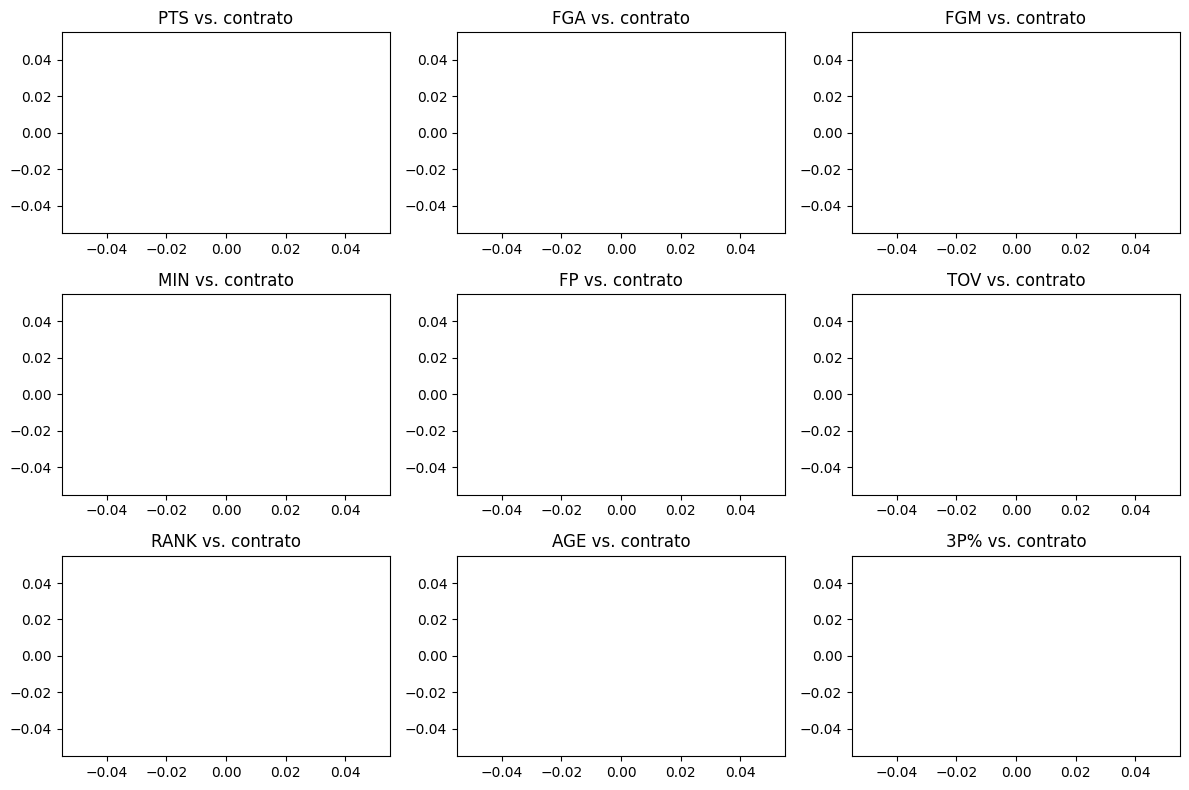

jugadora: LOU LOPEZ-SENECHAL
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN  

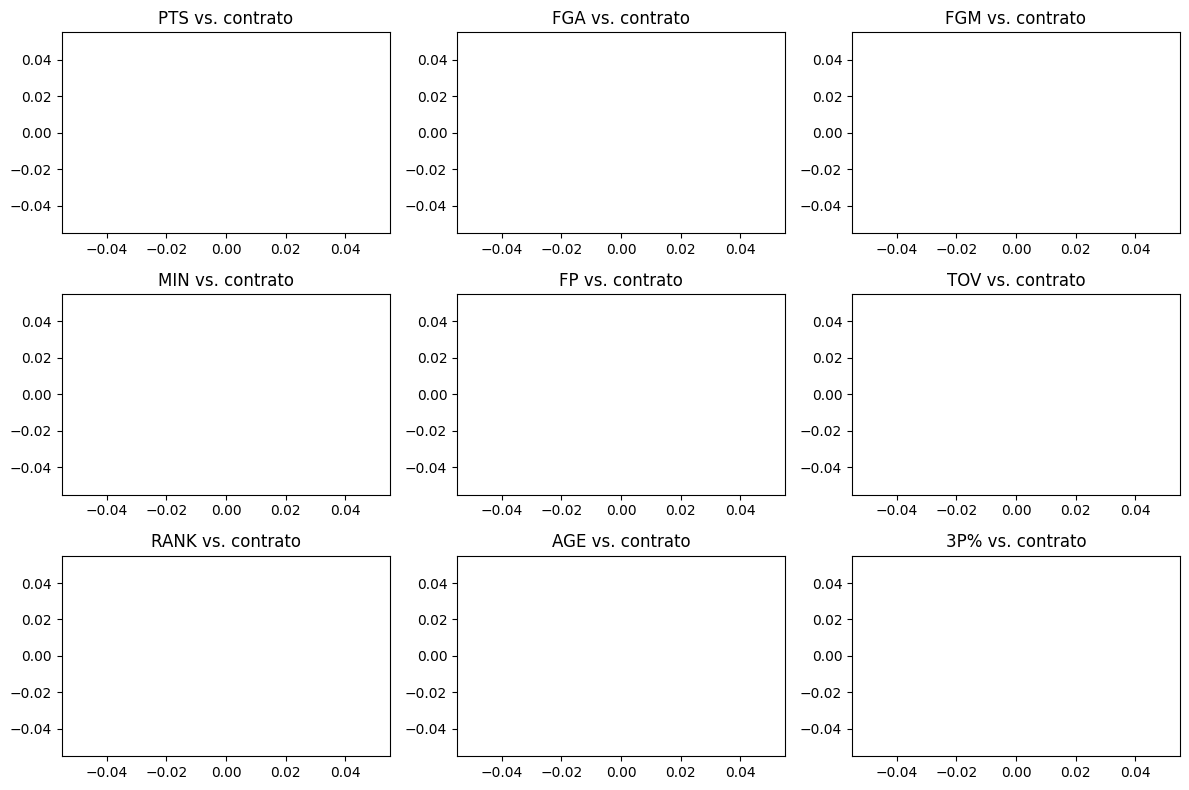

jugadora: KAYLA THORNTON
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN      

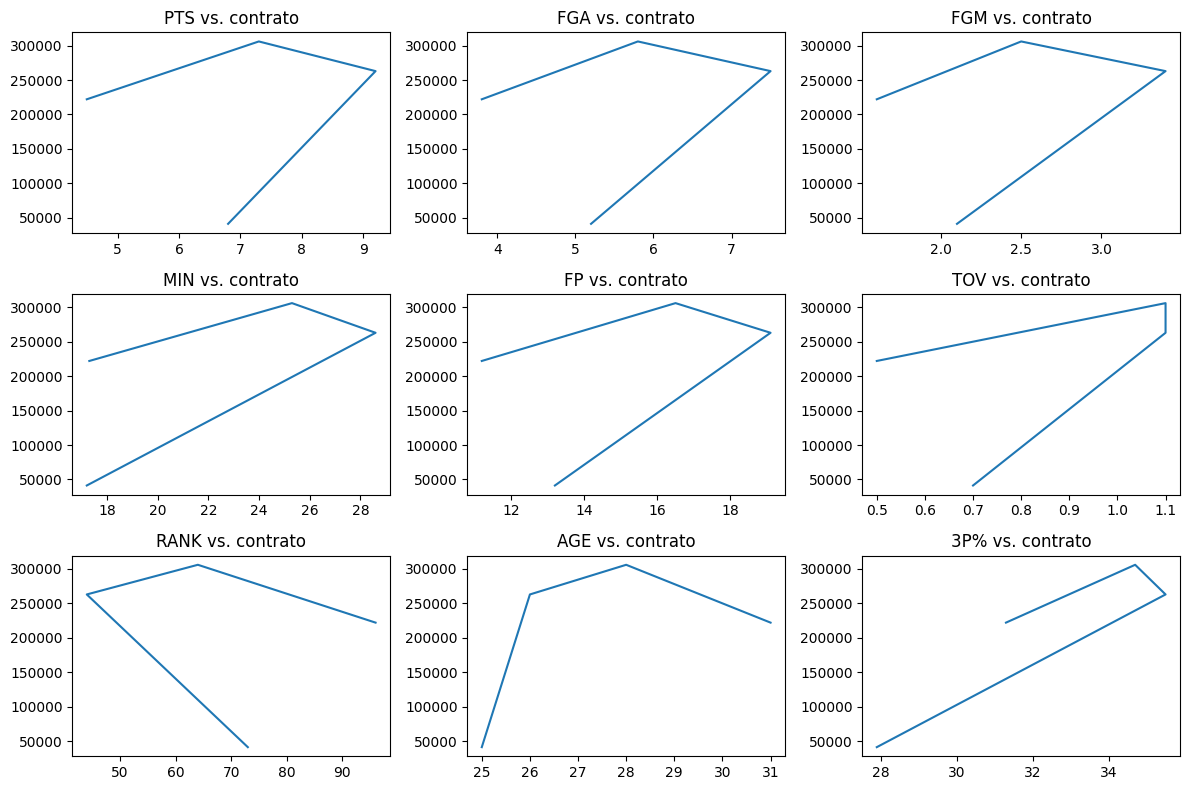

jugadora: AARI MCDONALD
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN       

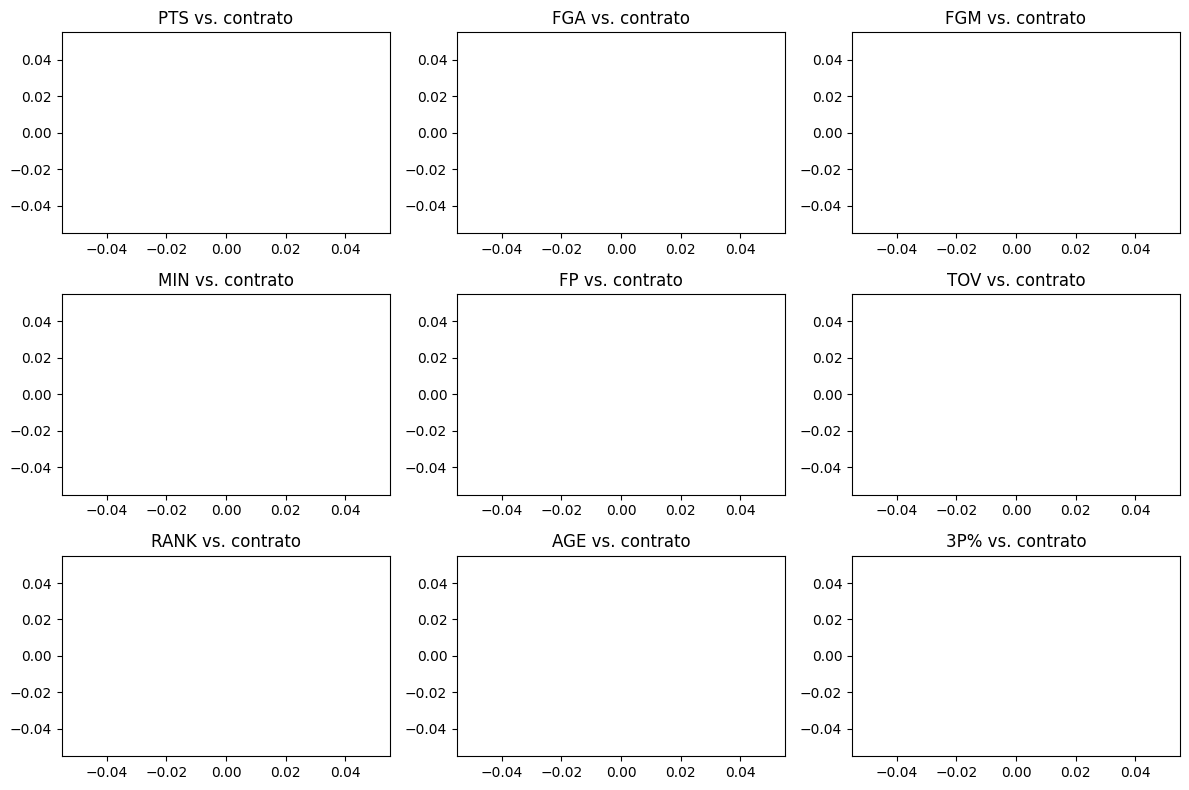

jugadora: AWAK KUIER
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%']                Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
0      NATASHA HOWARD            NaN         DAL            NaN         DAL   
1       ALYSSA THOMAS            NaN         CON            NaN         CON   
2    ARIKE OGUNBOWALE            NaN         DAL       725952.0         DAL   
3       MARINA MABREY            NaN         CON       620000.0         CHI   
4     KELSEY MITCHELL            NaN         IND            NaN         IND   
..                ...            ...         ...            ...         ...   
291  REBEKKAH BRUNSON            NaN         NaN            NaN         NaN   
292    MONIQUE CURRIE            NaN         NaN            NaN         NaN   
293      NOELLE QUINN            NaN         NaN            NaN         NaN   
294    LETICIA ROMERO            NaN         NaN            NaN         NaN   
295     LINNAE HARPER            NaN         N

In [ ]:
import numpy as np

def Analisis_individual(jugadora):
  jugadora_a_consultar  = str(jugadora)
  df_jugadora_a_graficar = df.loc[df['Nombre'] == jugadora_a_consultar]
  df_jugadora_contratos = df_jugadora_a_graficar.filter(like= 'Contrato').drop(columns = 'Contrato 2016').stack().reset_index(drop=True)
  df_jugadora_pts = df_jugadora_a_graficar.filter(like= 'PTS').drop(columns = 'PTS 2024').stack().reset_index(drop=True)

  # Obtenemos la longitud del indice existente para df_jugadora_contratos
  index_len = len(df_jugadora_contratos.index)

  # Creamos una lista de años con la duración correcta
  años = list(range(2023, 2023 - index_len, -1)) #[2023, 2022, 2021, 2020]

  # Ahora asignamos el nuevo índice de forma correcta para evitar errores de dimensiones
  df_jugadora_contratos.index = años

  # Si df_jugadora_pts tiene una longitud diferente, ajuste en consecuencia
  if len(df_jugadora_pts.index) != index_len:
    # Ajuste la lista de años para df_jugadora_pts si es necesario
    pts_años = list(range(2023, 2023 - len(df_jugadora_pts.index), -1)) 
    df_jugadora_pts.index = pts_años
  else:
    df_jugadora_pts.index = años

  #print(df_jugadora_pts,df_jugadora_contratos)   #esto es para visualizar la informacion de los pts y los contratos

  #Graficar
  fig, ax1 = plt.subplots()  # Crea la figura y el primer eje
  ax1.plot(df_jugadora_pts, label='PTS')  # Grafica la primera curva en el primer eje
  ax1.set_xlabel('Año')  # Etiqueta del eje x
  ax1.set_ylabel('PTS', color='blue')  # Etiqueta del eje y primario (color azul)
  ax1.tick_params('y', labelcolor='blue') # Color de las etiqeutas del eje y primario

  ax2 = ax1.twinx()  # Crea un segundo eje (comparte el mismo eje)
  ax2.plot(df_jugadora_contratos, color='red', label='Contrato')  # Grafica la segunda curva en el segundo eje (color rojo)
  ax2.set_ylabel('Contrato', color='red')  # Etiqueta del eje y secundario (color rojo)
  ax2.tick_params('y', labelcolor='red')  # Color de las etiquetas del eje y secundario

  fig.tight_layout()  # Ajusta la gráfica
  plt.title(f'PTS vs. Contrato de {jugadora_a_consultar}') # Añade un título
  plt.legend() # Añade una leyenda
  plt.show()  # Muestra la gráfica

def graficar_individual_linea(datos_interes, df, player):
  print(datos_interes,player)
  fig, axes = plt.subplots(3, 3, figsize=(12, 8))
  df_player = df.loc[df['Nombre'] == player]
  y = df_player.filter(like= 'Contrato').drop(columns = 'Contrato 2016').stack().reset_index(drop=True)
  for i in range(len(datos_interes)):
    #x, y = seleccionar_todos_dispersion(datos_graficar[i], df_contratos_diferentes)
    x = df_player.filter(like= datos_interes[i]).drop(columns = '{} 2024'.format(datos_interes[i])).stack().reset_index(drop=True)
    #print(x)
    #print(y)
    # Ensure x and y have the same length
    min_len = min(len(x), len(y))
    x = x[:min_len]
    y = y[:min_len]
    if i < 3:
      axes[0,i].plot(x, y)
      axes[0,i].set_title('{} vs. contrato'.format(datos_graficar[i]))
    elif i >= 3 and i < 6:
      axes[1,i - 3].plot(x, y)
      axes[1,i - 3].set_title('{} vs. contrato'.format(datos_graficar[i]))
    else:
      axes[2,i - 6].plot(x, y)
      axes[2,i - 6].set_title('{} vs. contrato'.format(datos_graficar[i]))
  ruta_guardado = f"C:/Users/gabog/OneDrive/Documentos/Curso de samsumg/ProyectoPowerRangers/Analisis_Datos/GraficasIndividuales/{player.replace(' ', '_')}.png" 
  plt.savefig(ruta_guardado) # Guardar la gráfica en la ruta especificada
  plt.tight_layout()
  plt.show()

lista_de_todas_las_jugadoras = df['Nombre']

#realizar la grafica individual de cada jugadora PTS vs Contrato
#for i in lista_de_todas_las_jugadoras:
#    Analisis_individual(i)
    
  

#Se limpia los datos para solo tener los contratos que varian
datos_graficar = ['PTS', 'FGA', 'FGM', 'MIN','FP','TOV', 'RANK', 'AGE', '3P%']
nuevo_dataset = {'RANK' : [], 'AGE': [], 'GP': [], 'W': [], 'L': [], 'MIN': [], 'PTS': [], 'FGM': [], 'FGA': [], 'FG%': [], '3PM': [], '3PA': [], '3P%': [],
                  'FTM': [], 'FTA': [], 'FT%': [], 'OREB': [], 'DREB': [], 'REB': [], 'AST': [], 'TOV': [], 'STL': [], 'BLK': [], 'PF': [], 'FP': [], 'DD2': [],'TD3': [], '+/-': []}

df_contratos_diferentes = df.copy()
df_contratos = df.filter(like='Contrato')
df_contratos_colums = df_contratos.columns

for player in df['Nombre']:
    for i in range(len(años) - 2):
      if df.loc[df['Nombre'] == player, df_contratos_colums[i]].iloc[0] == df.loc[df['Nombre'] == player, df_contratos_colums[i + 1]].iloc[0]:
        df_contratos_diferentes.loc[df['Nombre'] == player, df_contratos_colums[i]] = np.nan
        for dato in nuevo_dataset.keys():
          df_contratos_diferentes.loc[df['Nombre'] == player, '{} {}'.format(dato,años[i+1])] = np.nan

df_contratos_diferentes.to_csv('datos_contratos_diferentes.csv')

for i in lista_de_todas_las_jugadoras:
    print('jugadora:', i)
    graficar_individual_linea(datos_graficar,df_contratos_diferentes, i)

2023    21.2
2022    19.7
2021    18.7
2020    22.8
2019    19.1
dtype: float64 2023    725952.0
2022    725952.0
2021    220235.0
2020    220235.0
2019    220235.0
2018    220235.0
dtype: float64


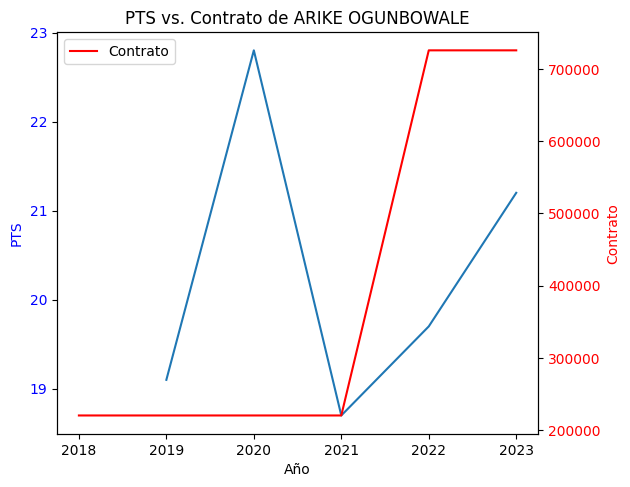

In [ ]:
def Analisis_individual(jugadora):
  jugadora_a_consultar  = str(jugadora)
  df_jugadora_a_graficar = df.loc[df['Nombre'] == jugadora_a_consultar]
  df_jugadora_contratos = df_jugadora_a_graficar.filter(like= 'Contrato').drop(columns = 'Contrato 2016').stack().reset_index(drop=True)
  df_jugadora_pts = df_jugadora_a_graficar.filter(like= 'PTS').drop(columns = 'PTS 2024').stack().reset_index(drop=True)

  # Obtenemos la longitud del indice existente para df_jugadora_contratos
  index_len = len(df_jugadora_contratos.index)

  # Creamos una lista de años con la duración correcta
  años = list(range(2023, 2023 - index_len, -1)) #[2023, 2022, 2021, 2020]

  # Ahora asignamos el nuevo índice de forma correcta para evitar errores de dimensiones
  df_jugadora_contratos.index = años

  # Si df_jugadora_pts tiene una longitud diferente, ajuste en consecuencia
  if len(df_jugadora_pts.index) != index_len:
    # Ajuste la lista de años para df_jugadora_pts si es necesario
    pts_años = list(range(2023, 2023 - len(df_jugadora_pts.index), -1)) 
    df_jugadora_pts.index = pts_años
  else:
    df_jugadora_pts.index = años

  print(df_jugadora_pts,df_jugadora_contratos)

  #Graficar
  fig, ax1 = plt.subplots()  # Crea la figura y el primer eje
  ax1.plot(df_jugadora_pts, label='PTS')  # Grafica la primera curva en el primer eje
  ax1.set_xlabel('Año')  # Etiqueta del eje x
  ax1.set_ylabel('PTS', color='blue')  # Etiqueta del eje y primario (color azul)
  ax1.tick_params('y', labelcolor='blue') # Color de las etiqeutas del eje y primario

  ax2 = ax1.twinx()  # Crea un segundo eje (comparte el mismo eje)
  ax2.plot(df_jugadora_contratos, color='red', label='Contrato')  # Grafica la segunda curva en el segundo eje (color rojo)
  ax2.set_ylabel('Contrato', color='red')  # Etiqueta del eje y secundario (color rojo)
  ax2.tick_params('y', labelcolor='red')  # Color de las etiquetas del eje y secundario

  fig.tight_layout()  # Ajusta la gráfica
  plt.title(f'PTS vs. Contrato de {jugadora_a_consultar}') # Añade un título
  plt.legend() # Añade una leyenda
  plt.show()  # Muestra la gráfica

jugadora_a_consultar = 'ARIKE OGUNBOWALE'
Analisis_individual(jugadora_a_consultar)

In [22]:
df_sue = df.loc[df['Nombre'] == 'SUE BIRD']
df_sue_contratos = df_sue.filter(like= 'Contrato').drop(columns = 'Contrato 2016').stack().reset_index(drop=True)
df_sue_pts = df_sue.filter(like= 'PTS').drop(columns = 'PTS 2024').stack().reset_index(drop=True)

años = [2022,2021,2020,2019,2018,2017]
df_sue_contratos.index = años
df_sue_pts.index = años
print(df_sue_pts)


2022     7.8
2021    10.0
2020     9.8
2019    10.1
2018    10.6
2017    12.8
dtype: float64


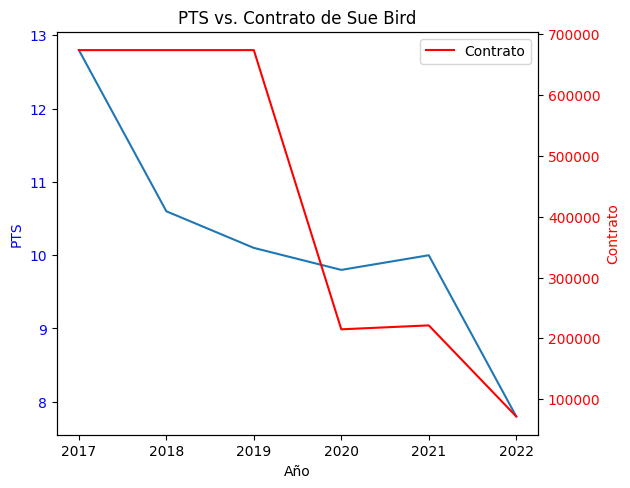

In [ ]:
fig, ax1 = plt.subplots()  # Crea la figura y el primer eje
ax1.plot(df_sue_pts, label='PTS')  # Grafica la primera curva en el primer eje
ax1.set_xlabel('Año')  # Etiqueta del eje x
ax1.set_ylabel('PTS', color='blue')  # Etiqueta del eje y primario (color azul)
ax1.tick_params('y', labelcolor='blue') # Color de las etiqeutas del eje y primario

ax2 = ax1.twinx()  # Crea un segundo eje (comparte el mismo eje)
ax2.plot(df_sue_contratos, color='red', label='Contrato')  # Grafica la segunda curva en el segundo eje (color rojo)
ax2.set_ylabel('Contrato', color='red')  # Etiqueta del eje y secundario (color rojo)
ax2.tick_params('y', labelcolor='red')  # Color de las etiquetas del eje y secundario

fig.tight_layout()  # Ajusta la gráfica
plt.title('PTS vs. Contrato de Sue Bird') # Añade un título
plt.legend() # Añade una leyenda
plt.show()  # Muestra la gráfica

Ahora se procede a ver todos los datos pero filtrados los contratos dobles

In [ ]:
import numpy as np

#Se limpia los datos para solo tener los contratos que varian

nuevo_dataset = {'RANK' : [], 'AGE': [], 'GP': [], 'W': [], 'L': [], 'MIN': [], 'PTS': [], 'FGM': [], 'FGA': [], 'FG%': [], '3PM': [], '3PA': [], '3P%': [],
                  'FTM': [], 'FTA': [], 'FT%': [], 'OREB': [], 'DREB': [], 'REB': [], 'AST': [], 'TOV': [], 'STL': [], 'BLK': [], 'PF': [], 'FP': [], 'DD2': [],'TD3': [], '+/-': []}

df_contratos_diferentes = df.copy()
df_contratos = df.filter(like='Contrato')
df_contratos_colums = df_contratos.columns

for player in df['Nombre']:
    for i in range(len(años) - 2):
      if df.loc[df['Nombre'] == player, df_contratos_colums[i]].iloc[0] == df.loc[df['Nombre'] == player, df_contratos_colums[i + 1]].iloc[0]:
        df_contratos_diferentes.loc[df['Nombre'] == player, df_contratos_colums[i]] = np.nan
        for dato in nuevo_dataset.keys():
          df_contratos_diferentes.loc[df['Nombre'] == player, '{} {}'.format(dato,años[i+1])] = np.nan

df_contratos_diferentes.to_csv('datos_contratos_diferentes.csv')

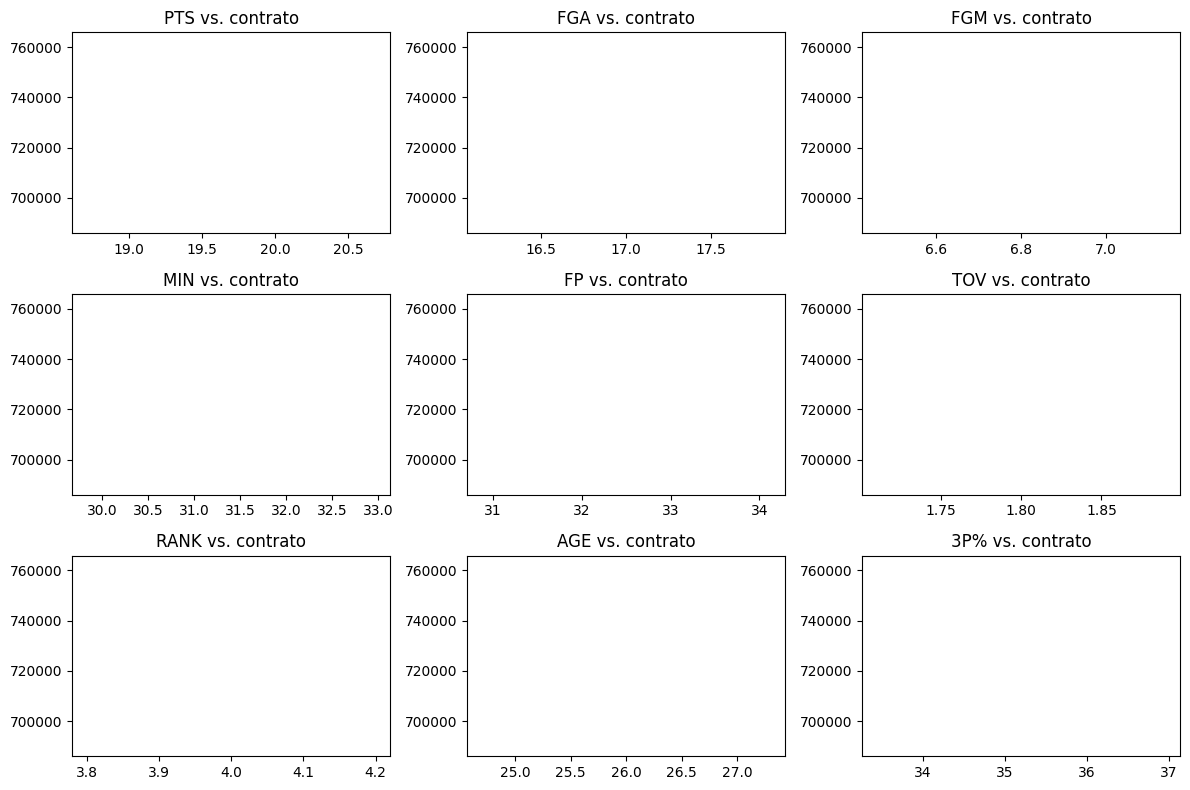

In [5]:
graficar_individual_linea(datos_graficar,df_contratos_diferentes,'ARIKE OGUNBOWALE')